___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

# PART- 1 Data Cleaning

### Importing Libraries

In [1]:
# import lineer algebra and data analysis library
import numpy as np
import pandas as pd

# import visualisation library
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

# import warning library to suppress warnings
import warnings

C:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Settings

In [2]:
# Suppressing a warning 
warnings.filterwarnings("ignore")

# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid")

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 100)

In [3]:
params = {
'figure.figsize':(14,7),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'w',
'boxplot.meanprops.markersize': 10.1,
}
# print(plt.style.library)
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.rcParams['figure.figsize'])

## Reading scout_car.json file as a dataframe named df

In [4]:
df = pd.read_csv("filled_scout.csv")

### Creating a copy from df named df_copy

In [5]:
df_copy = df.copy()

## Checking the dataframe with head, tail and sample

In [6]:
# Checking the head of df

df.head()

make_model body_type    price       km  prev_owner  type body_color  \
0    Audi A1    Sedans  15770.0  56013.0         2.0  Used      Black   
1    Audi A1    Sedans  14500.0  80000.0         1.0  Used        Red   
2    Audi A1    Sedans  14640.0  83450.0         1.0  Used      Black   
3    Audi A1    Sedans  14500.0  73000.0         1.0  Used      Brown   
4    Audi A1    Sedans  16790.0  16200.0         1.0  Used      Black   

  paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
0   Metallic          5.0          5.0    Automatic           1400.0   
1   Metallic          3.0          4.0    Automatic           1800.0   
2   Metallic          4.0          4.0    Automatic           1600.0   
3   Metallic          3.0          4.0    Automatic           1400.0   
4   Metallic          5.0          5.0    Automatic           1400.0   

   cylinders drive_chain     fuel  co_2_emission emission_class  \
0        3.0       front   Diesel           99.0         Euro 6   
1        4.0       front  Benzine          129.0         Euro 6   
2        4.0       front   Diesel           99.0         Euro 6   
3        3.0       front   Diesel           99.0         Euro 6   
4        3.0       front   Diesel          109.0         Euro 6   

                                 comfort_convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 entertainment_media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     safety_security  gears  hp_kw  \
0  ABS,Central door lock,Daytime running lights,D...    7.0   66.0   
1  ABS,Central door lock,Central door lock with r...    7.0  141.0   
2  ABS,Central door lock,Daytime running lights,D...    7.0   85.0   
3  ABS,Alarm system,Central door lock with remote...    6.0   66.0   
4  ABS,Central door lock,Driver-side airbag,Elect...    7.0   66.0   

  upholstery_type upholstery_color  weight_kg  consumption_comb  age  
0           Cloth            Black     1220.0               3.8  3.0  
1           Cloth             Grey     1255.0               5.6  2.0  
2           Cloth            Black     1135.0               3.8  3.0  
3           Cloth            Black     1195.0               3.8  3.0  
4           Cloth            Black     1135.0               4.1  3.0

In [7]:
# Checking the tail of df

df.tail()

make_model body_type    price      km  prev_owner            type  \
15037  Renault Espace       Van  39950.0    10.0         0.0             New   
15038  Renault Espace       Van  39885.0  9900.0         1.0            Used   
15039  Renault Espace       Van  39875.0    15.0         1.0  Pre-registered   
15040  Renault Espace       Van  39700.0    10.0         1.0  Pre-registered   
15041  Renault Espace       Van  40999.0  2900.0         1.0   Demonstration   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
15037       Grey   Metallic          5.0          5.0    Automatic   
15038       Grey   Metallic          5.0          5.0    Automatic   
15039      White   Metallic          5.0          7.0    Automatic   
15040       Grey   Metallic          5.0          7.0    Automatic   
15041       Grey   Metallic          5.0          5.0    Automatic   

       displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
15037           2000.0        4.0       front   Diesel          139.0   
15038           1800.0        4.0       front  Benzine          168.0   
15039           2000.0        4.0       front   Diesel          139.0   
15040           2000.0        4.0       front   Diesel          139.0   
15041           1800.0        4.0         4WD  Benzine          153.0   

      emission_class                                comfort_convenience  \
15037         Euro 6  Air conditioning,Automatic climate control,Cru...   
15038         Euro 6  Air conditioning,Automatic climate control,Cru...   
15039   Euro 6d-TEMP  Air conditioning,Armrest,Automatic climate con...   
15040         Euro 6  Air conditioning,Automatic climate control,Cru...   
15041         Euro 6  Air conditioning,Automatic climate control,Cru...   

                                     entertainment_media  \
15037  Bluetooth,Digital radio,Hands-free equipment,O...   
15038  Bluetooth,Digital radio,Hands-free equipment,R...   
15039  Bluetooth,Hands-free equipment,On-board comput...   
15040                  Bluetooth,Digital radio,Radio,USB   
15041                                                USB   

                                        extras  \
15037                Alloy wheels,Touch screen   
15038  Alloy wheels,Touch screen,Voice Control   
15039                             Alloy wheels   
15040                Alloy wheels,Touch screen   
15041                Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
15037  ABS,Central door lock,Central door lock with r...    6.0  147.0   
15038  ABS,Adaptive Cruise Control,Blind spot monitor...    7.0  165.0   
15039  ABS,Adaptive Cruise Control,Blind spot monitor...    6.0  146.0   
15040  ABS,Blind spot monitor,Driver-side airbag,Elec...    6.0  147.0   
15041  ABS,Blind spot monitor,Daytime running lights,...    6.0  165.0   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
15037    Full leather            Brown     1758.0               5.3  0.0  
15038           Cloth            Brown     1708.0               7.4  0.0  
15039    Full leather            Black     1734.0               5.3  0.0  
15040    Part leather            Black     1758.0               5.3  0.0  
15041    Full leather            Brown     1685.0               6.8  0.0

In [8]:
# Checking the df by taking samples

df.sample(10)

make_model body_type    price       km  prev_owner            type  \
8711       Opel Corsa     Other   8500.0  25000.0         1.0            Used   
14942  Renault Espace       Van  54205.0      1.0         0.0             New   
5667       Opel Astra     Other  13900.0  17108.0         1.0            Used   
3249          Audi A3    Sedans  21950.0  98857.0         1.0            Used   
13924    Renault Clio   Compact  11299.0     10.0         1.0  Pre-registered   
767           Audi A1   Compact  13989.0  56200.0         2.0            Used   
9584       Opel Corsa   Compact  15590.0     10.0         1.0  Pre-registered   
9670       Opel Corsa   Compact  14750.0   1000.0         1.0            Used   
50            Audi A1   Compact  11480.0  94055.0         1.0            Used   
2577          Audi A3    Sedans  17990.0  97550.0         1.0            Used   

      body_color paint_type  nr_of_doors  nr_of_seats    gearing_type  \
8711       Black   Metallic          5.0          5.0          Manual   
14942      White   Metallic          5.0          5.0       Automatic   
5667       White   Metallic          5.0          5.0       Automatic   
3249        Grey   Metallic          4.0          5.0  Semi-automatic   
13924        Red   Metallic          4.0          5.0          Manual   
767          Red   Metallic          5.0          4.0          Manual   
9584        Blue   Metallic          3.0          5.0       Automatic   
9670      Silver   Metallic          5.0          5.0       Automatic   
50         White   Metallic          4.0          4.0          Manual   
2577       Black   Metallic          5.0          5.0       Automatic   

       displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
8711            1400.0        4.0       front  Benzine          120.0   
14942           2000.0        4.0         4WD   Diesel          139.0   
5667            1000.0        3.0       front  Benzine           99.0   
3249            1400.0        4.0       front  Benzine          104.0   
13924            900.0        3.0       front  Benzine          113.0   
767             1600.0        4.0       front   Diesel           97.0   
9584            1400.0        4.0       front  Benzine          136.0   
9670            1400.0        4.0       front  Benzine          157.0   
50              1400.0        3.0       front   Diesel           97.0   
2577            2000.0        4.0       front   Diesel          116.0   

      emission_class                                comfort_convenience  \
8711          Euro 6  Air conditioning,Multi-function steering wheel...   
14942         Euro 6  Air conditioning,Armrest,Automatic climate con...   
5667          Euro 6  Air conditioning,Armrest,Cruise control,Electr...   
3249          Euro 6  Air conditioning,Cruise control,Electrical sid...   
13924         Euro 6              Electrical side mirrors,Power windows   
767           Euro 6  Air conditioning,Armrest,Automatic climate con...   
9584    Euro 6d-TEMP  Air conditioning,Cruise control,Electrically h...   
9670    Euro 6d-TEMP  Air conditioning,Cruise control,Electrical sid...   
50            Euro 6  Air conditioning,Automatic climate control,Ele...   
2577          Euro 6  Air conditioning,Automatic climate control,Mul...   

                                     entertainment_media  \
8711      Bluetooth,CD player,Hands-free equipment,Radio   
14942  Bluetooth,Digital radio,Hands-free equipment,O...   
5667                           MP3,On-board computer,USB   
3249                   CD player,On-board computer,Radio   
13924                     Bluetooth,Hands-free equipment   
767      Bluetooth,CD player,MP3,On-board computer,Radio   
9584        MP3,On-board computer,Radio,Sound system,USB   
9670    Bluetooth,Hands-free equipment,On-board computer   
50                     Bluetooth,On-board computer,Radio   
2577                             On-board computer,Radio   

                        

## Checking the summary information of df

In [9]:
# Checking the summary information of df with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15042 non-null  object 
 1   body_type            15042 non-null  object 
 2   price                15042 non-null  float64
 3   km                   15042 non-null  float64
 4   prev_owner           15042 non-null  float64
 5   type                 15042 non-null  object 
 6   body_color           15042 non-null  object 
 7   paint_type           15042 non-null  object 
 8   nr_of_doors          15042 non-null  float64
 9   nr_of_seats          15042 non-null  float64
 10  gearing_type         15042 non-null  object 
 11  displacement_cc      15042 non-null  float64
 12  cylinders            15042 non-null  float64
 13  drive_chain          15042 non-null  object 
 14  fuel                 15042 non-null  object 
 15  co_2_emission        15042 non-null 

## Checking the null values of df

In [10]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
km                     0
prev_owner             0
type                   0
body_color             0
paint_type             0
nr_of_doors            0
nr_of_seats            0
gearing_type           0
displacement_cc        0
cylinders              0
drive_chain            0
fuel                   0
co_2_emission          0
emission_class         0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
gears                  0
hp_kw                  0
upholstery_type        0
upholstery_color       0
weight_kg              0
consumption_comb       0
age                    0
dtype: int64

# PART- 2 `( Handling With Missing Values )`

This topic has been studied in the 2nd notebook

# PART- 3 `( Handling With Outliers )`

## Handling with outliers for numeric columns

In [11]:
df_numeric= df.select_dtypes(exclude=["object"])

In [12]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             15042 non-null  float64
 1   km                15042 non-null  float64
 2   prev_owner        15042 non-null  float64
 3   nr_of_doors       15042 non-null  float64
 4   nr_of_seats       15042 non-null  float64
 5   displacement_cc   15042 non-null  float64
 6   cylinders         15042 non-null  float64
 7   co_2_emission     15042 non-null  float64
 8   gears             15042 non-null  float64
 9   hp_kw             15042 non-null  float64
 10  weight_kg         15042 non-null  float64
 11  consumption_comb  15042 non-null  float64
 12  age               15042 non-null  float64
dtypes: float64(13)
memory usage: 1.5 MB


### Histplots for numeric columns

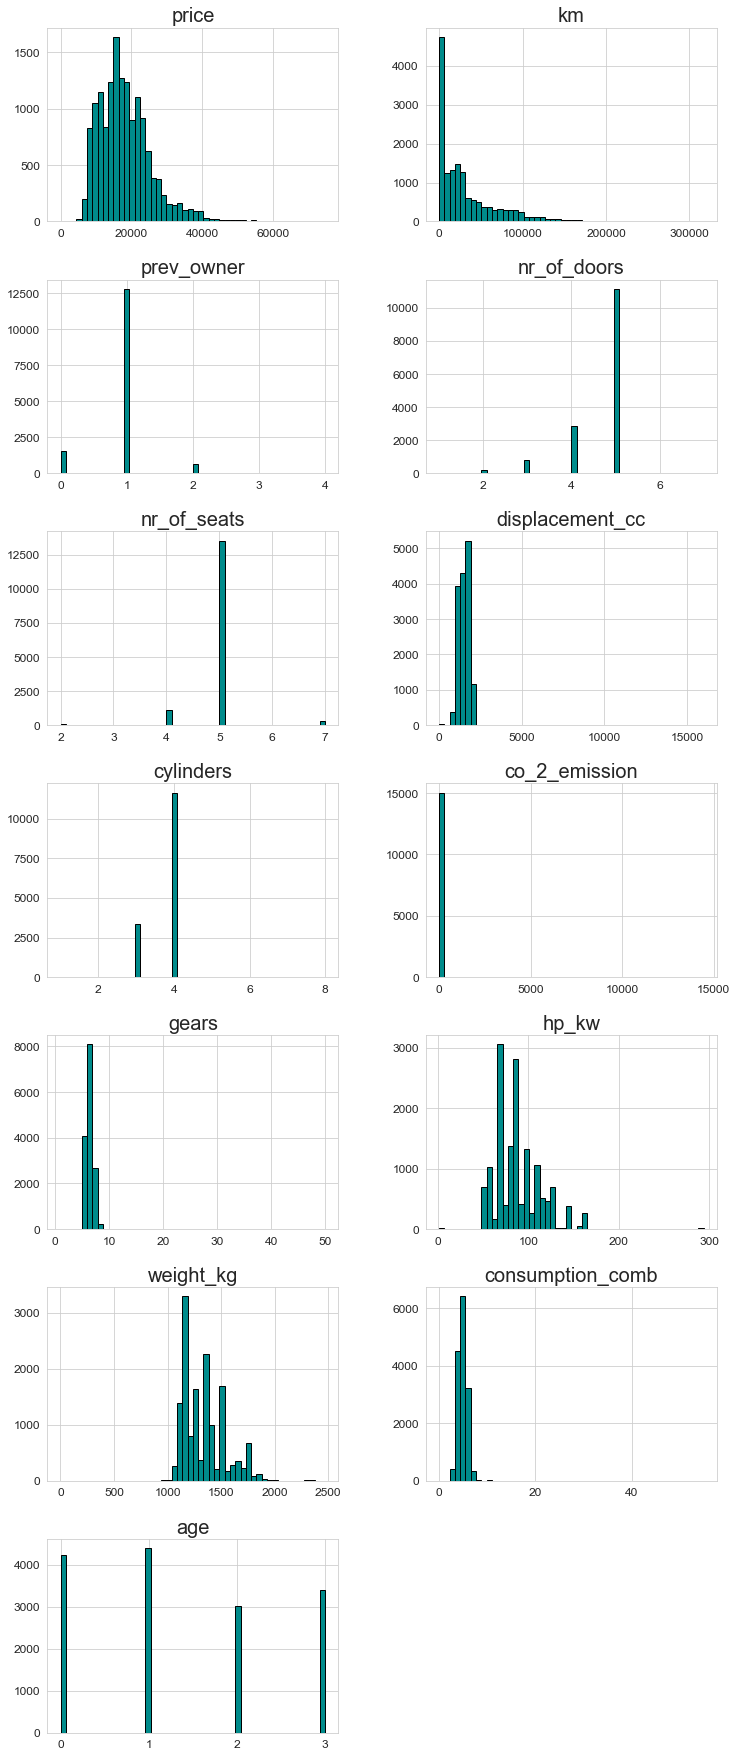

In [13]:
fig_ = df_numeric.hist(figsize=(12, 36), layout=(8,2),
                         bins=50, color="darkcyan", edgecolor="black", xlabelsize=12, ylabelsize=12)

### Box plots for numeric columns

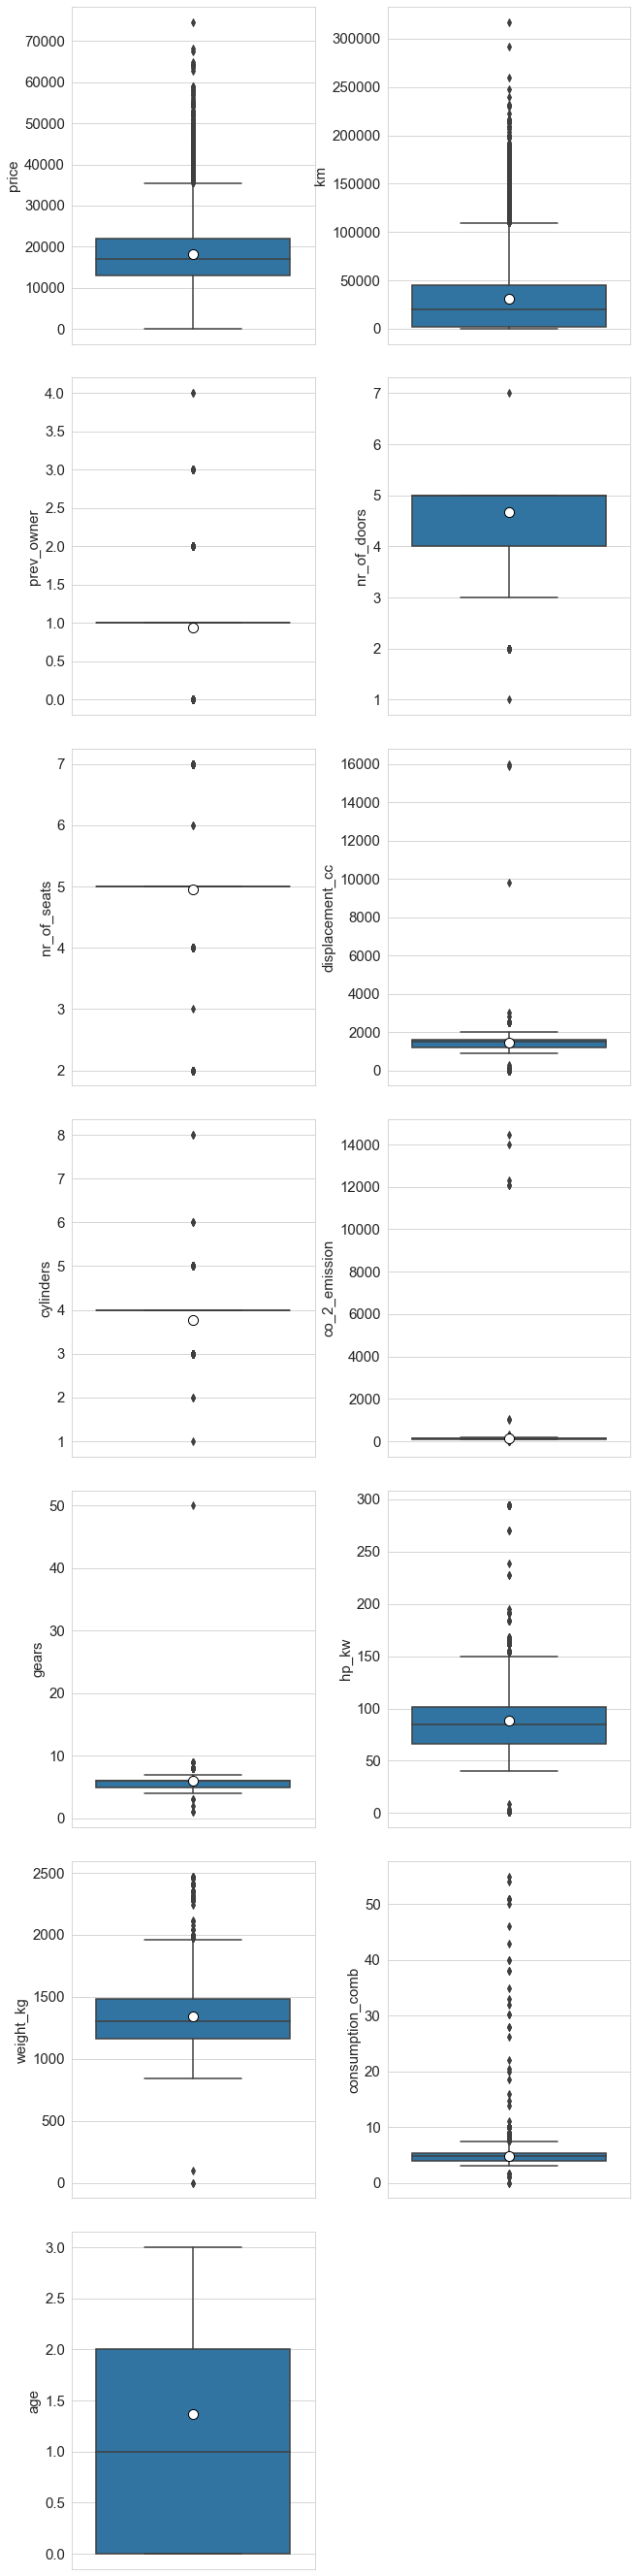

In [14]:
fig = plt.figure(figsize=(10,30))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.5,
                    wspace=0.3,
                    hspace=0.1)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(8,2,i+1)
        sns.boxplot(y=col, data=df_numeric)

### Scatter plots for numeric columns

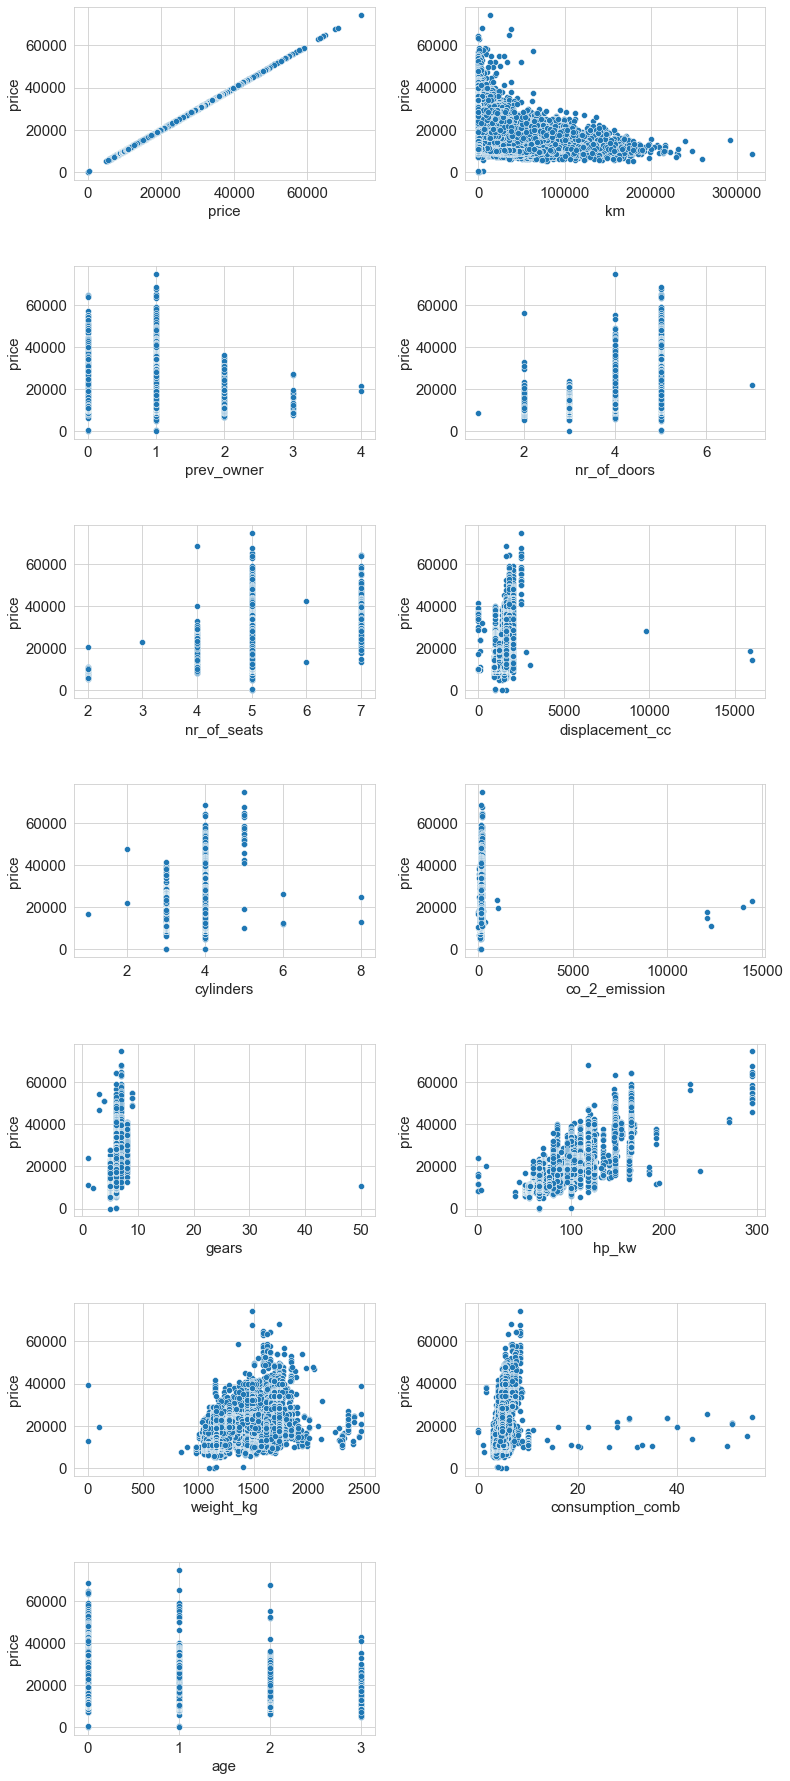

In [15]:
fig = plt.figure(figsize=(12,24))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(7,2,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

### Regplots for numeric columns

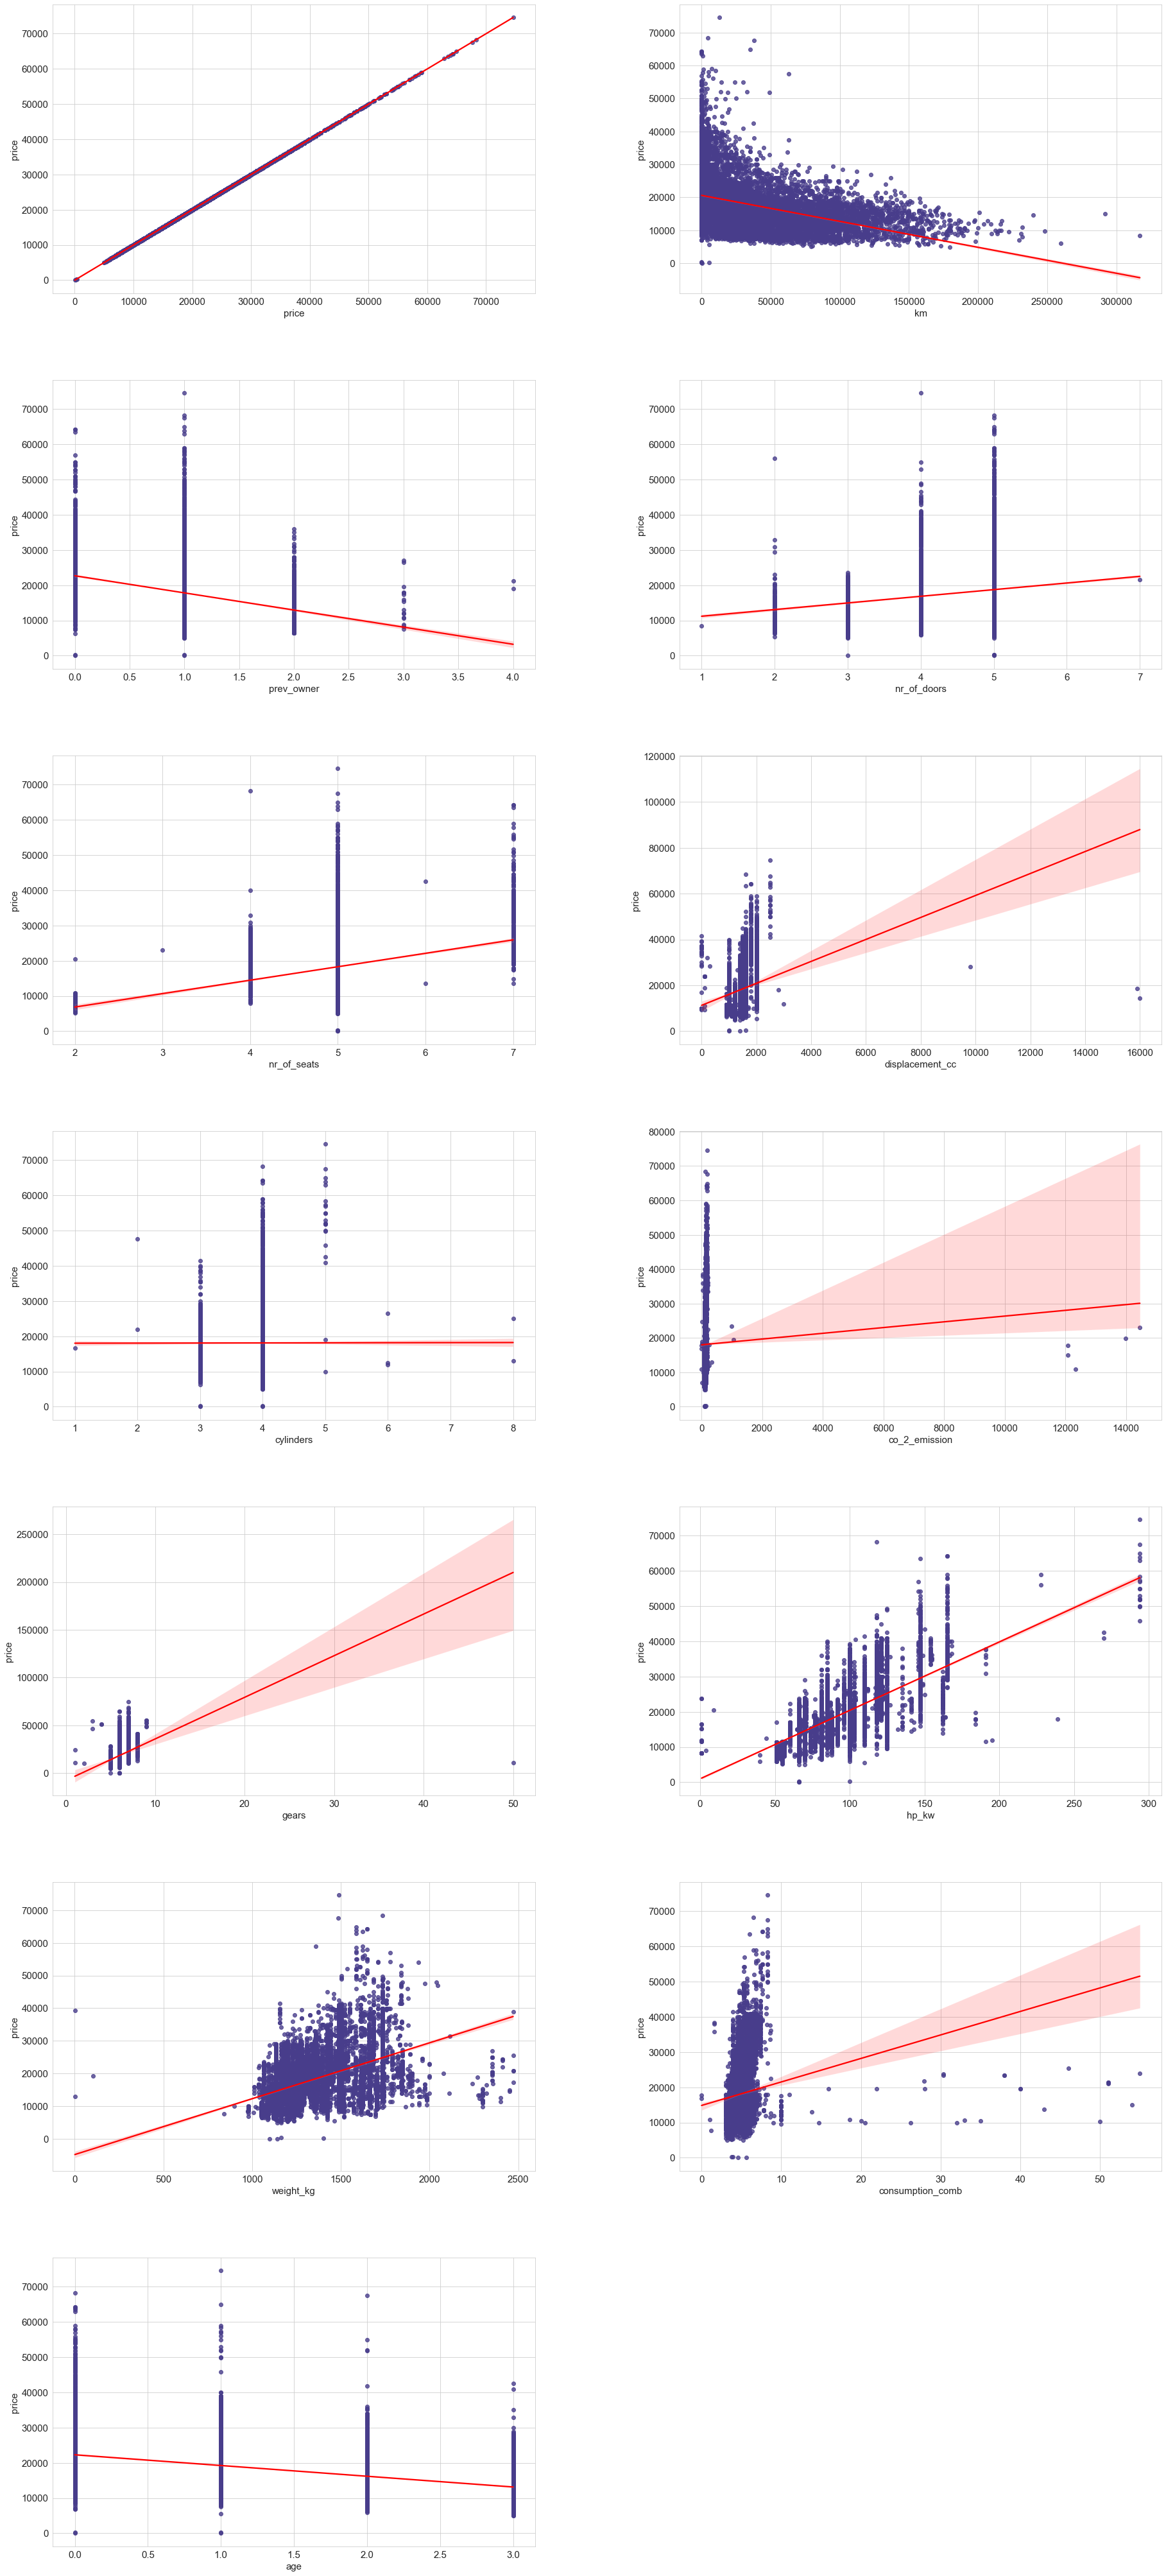

In [16]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.2,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(7,2,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

### Conclusion about plots of numeric columns

In [17]:
# # EXAMINING THE GRAPHS;
# nr_of_doors: 1-door can be an outlier.
# displacement_cc
# cylinders 1, 8
# co2 emission
# gears cannot be 50
# hp_kw
# weight_kg
# consumption_comb
#IT HAS BEEN ASSESSED THAT THE COLUMNS MAY CONTAIN OUTLIER VALUES AND IT HAS BEEN DECIDED TO DO OUTLIER WORK ON THESE COLUMNS.

### Defining a function to find iqr lower, upper  limits

In [18]:
def iqr_lower_upper (col) :
    q1 = df_numeric[col].quantile(0.25)
    q3 = df_numeric[col].quantile(0.75)
    iqr = q3 -q1
    lower = q1 -1.5*iqr
    upper = q3 + 1.5*iqr
    nr_extreme = df.loc[(df[col] < lower) | (df[col] > upper)].shape[0] 
    print(f"lower limit : {lower},\nupper limit: {upper},\nnumber of extreme values : {nr_extreme}")
    return lower, upper

### nr_of_doors column

In [19]:
iqr_lower_upper("nr_of_doors")

lower limit : 2.5,
upper limit: 6.5,
number of extreme values : 196


(2.5, 6.5)

In [20]:
df[df_numeric.nr_of_doors==1]

make_model body_type   price       km  prev_owner  type body_color  \
13057  Renault Clio   Compact  8500.0  41493.0         1.0  Used      White   

      paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
13057   Metallic          1.0          5.0       Manual           1500.0   

       cylinders drive_chain    fuel  co_2_emission emission_class  \
13057        4.0       front  Diesel           85.0         Euro 6   

                                     comfort_convenience  \
13057  Air conditioning,Cruise control,Hill Holder,Mu...   

               entertainment_media        extras  \
13057  Bluetooth,On-board computer  Alloy wheels   

                                         safety_security  gears  hp_kw  \
13057  ABS,Central door lock,Daytime running lights,D...    5.0   55.0   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
13057           Cloth            Black     1165.0               3.3  3.0

In [21]:
df[df_numeric.nr_of_doors==2]

make_model body_type    price       km  prev_owner            type  \
26       Audi A1   Compact  11444.0  84029.0         1.0            Used   
44       Audi A1    Sedans  11490.0  44120.0         1.0            Used   
48       Audi A1   Compact  11490.0  58000.0         2.0            Used   
55       Audi A1   Compact  10999.0  69500.0         1.0            Used   
56       Audi A1   Compact  10900.0  43500.0         1.0            Used   
...          ...       ...      ...      ...         ...             ...   
9816  Opel Corsa   Compact  10499.0    325.0         0.0             New   
9826  Opel Corsa   Compact   9990.0    100.0         0.0             New   
9892  Opel Corsa   Compact  11290.0     12.0         1.0  Pre-registered   
9925  Opel Corsa   Compact  11190.0     10.0         1.0  Pre-registered   
9956  Opel Corsa   Compact  10990.0     12.0         1.0  Pre-registered   

     body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
26         Blue   Metallic          2.0          4.0       Manual   
44        Black   Metallic          2.0          5.0       Manual   
48        Black   Metallic          2.0          4.0       Manual   
55        Black   Metallic          2.0          4.0       Manual   
56        White   Metallic          2.0          4.0       Manual   
...         ...        ...          ...          ...          ...   
9816        Red   Metallic          2.0          4.0       Manual   
9826       Blue   Metallic          2.0          5.0       Manual   
9892        Red   Metallic          2.0          5.0       Manual   
9925       Blue   Metallic          2.0          5.0       Manual   
9956       Blue   Metallic          2.0          5.0       Manual   

      displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
26             1000.0        3.0       front  Benzine           97.0   
44             1400.0        3.0       front   Diesel           94.0   
48             1000.0        3.0       front  Benzine          102.0   
55             1000.0        3.0       front  Benzine          102.0   
56             1000.0        3.0       front  Benzine           97.0   
...               ...        ...         ...      ...            ...   
9816           1200.0        4.0       front  Benzine          126.0   
9826           1200.0        4.0       front  Benzine          126.0   
9892           1200.0        4.0       front  Benzine          126.0   
9925           1200.0        4.0       front  Benzine          126.0   
9956           1200.0        4.0       front  Benzine          126.0   

     emission_class                                comfort_convenience  \
26           Euro 6  Air conditioning,Automatic climate control,Ele...   
44           Euro 6  Air conditioning,Cruise control,Electrical sid...   
48           Euro 6  Air conditioning,Electrical side mirrors,Leath...   
55           Euro 5  Air conditioning,Armrest,Automatic climate con...   
56           Euro 6  Air conditioning,Electrical side mirrors,Power...   
...             ...                                                ...   
9816   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   
9826   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Hill ...   
9892   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   
9925   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Hill ...   
9956   Euro 6d-TEMP  Air conditioning,Electrical side mirrors,Power...   

                                    entertainment_media  \
26    Bluetooth,CD player,Hands-free equipment,MP3,O...   
44    Bluetooth,Hands-free equipment,MP3,On-board co...   
48                                  Bluetooth,CD player   
55                                            CD player   
56                    CD player,On-board computer,Radio   
...                                                 ...   
9816                                              Radio   
9826  Bluetooth,CD player,Hands-free e

In [22]:
df[df_numeric.nr_of_doors==7]

make_model body_type    price       km  prev_owner  type  \
14372  Renault Espace       Van  21600.0  78000.0         1.0  Used   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
14372      Brown   Metallic          7.0          5.0    Automatic   

       displacement_cc  cylinders drive_chain    fuel  co_2_emission  \
14372           1600.0        4.0       front  Diesel          120.0   

      emission_class                                comfort_convenience  \
14372         Euro 6  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
14372  Bluetooth,Digital radio,MP3,On-board computer,...   

                          extras  \
14372  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
14372  ABS,Blind spot monitor,Central door lock,Dayti...    6.0  118.0   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
14372    Full leather            Brown     1734.0               4.6  3.0

In [23]:
q1 = df_numeric.nr_of_doors.quantile(0.25)
q3 = df_numeric.nr_of_doors.quantile(0.75)
iqr = q3 -q1
lower = q1 -1.5*iqr
upper = q3 + 1.5*iqr
lower, upper

(2.5, 6.5)

In [24]:
nr_doors_1 = df.loc[(df.make_model=="Renault Clio")&(df.body_type=="Compact"), "nr_of_doors"].mode()[0]

In [25]:
nr_doors_7 = df.loc[(df.make_model=="Renault Espace")&(df.body_type=="Van"), "nr_of_doors"].mode()[0]

In [26]:
df.nr_of_doors.replace(to_replace=[1,7], value=[nr_doors_1, nr_doors_7], inplace=True)

In [27]:
df.nr_of_doors.value_counts()

5.0    11153
4.0     2872
3.0      823
2.0      194
Name: nr_of_doors, dtype: int64

### nr_of_seats column

In [28]:
df[df.nr_of_seats==3]

make_model body_type    price      km  prev_owner  type body_color  \
1542    Audi A1   Compact  23090.0  9821.0         1.0  Used      Black   

     paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
1542   Metallic          2.0          3.0    Automatic           1800.0   

      cylinders drive_chain     fuel  co_2_emission emission_class  \
1542        4.0       front  Benzine          134.0         Euro 6   

                                    comfort_convenience  \
1542  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
1542  Bluetooth,CD player,Digital radio,Hands-free e...   

                                                 extras  \
1542  Alloy wheels,Catalytic Converter,Sport package...   

                                        safety_security  gears  hp_kw  \
1542  ABS,Central door lock,Daytime running lights,D...    7.0  141.0   

     upholstery_type upholstery_color  weight_kg  consumption_comb  age  
1542    Part leather            Black     1180.0               5.8  1.0

In [29]:
df[df.nr_of_seats==6]

make_model      body_type    price        km  prev_owner  type  \
524           Audi A1        Compact  13500.0  100000.0         1.0  Used   
15013  Renault Espace  Station wagon  42490.0      10.0         0.0   New   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
524        White   Metallic          5.0          6.0       Manual   
15013      Black   Metallic          5.0          6.0    Automatic   

       displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
524             1000.0        4.0       front  Benzine          102.0   
15013           2000.0        4.0       front   Diesel          168.0   

      emission_class                                comfort_convenience  \
524           Euro 6                                   Air conditioning   
15013   Euro 6d-TEMP  Air conditioning,Armrest,Automatic climate con...   

                                     entertainment_media  \
524                                    On-board computer   
15013  Bluetooth,Hands-free equipment,On-board comput...   

                          extras  \
524                 Alloy wheels   
15013  Alloy wheels,Touch screen   

                                         safety_security  gears  hp_kw  \
524                                                  ABS    5.0   70.0   
15013  ABS,Blind spot monitor,Central door lock,Dayti...    6.0  147.0   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
524             Cloth            Black     1500.0               4.3  2.0  
15013           Cloth            Other     1840.0               5.7  0.0

In [30]:
df[df.make_model=="Renault Espace"].head(50)

make_model      body_type    price        km  prev_owner  \
14131  Renault Espace            Van  17500.0  141000.0         1.0   
14132  Renault Espace  Station wagon  17950.0   99950.0         1.0   
14133  Renault Espace    Transporter  17950.0   99950.0         1.0   
14134  Renault Espace            Van  17990.0  109745.0         1.0   
14135  Renault Espace            Van  22600.0  100000.0         1.0   
14136  Renault Espace    Transporter  22500.0   84000.0         1.0   
14137  Renault Espace            Van  22690.0   68021.0         1.0   
14138  Renault Espace            Van  22500.0   32559.0         1.0   
14139  Renault Espace       Off-Road  22500.0   70000.0         1.0   
14140  Renault Espace            Van  22990.0   76950.0         1.0   
14141  Renault Espace            Van  23690.0   53447.0         1.0   
14142  Renault Espace    Transporter  24900.0   19377.0         1.0   
14143  Renault Espace            Van  24999.0   10613.0         1.0   
14144  Renault Espace            Van  24999.0   10890.0         1.0   
14145  Renault Espace            Van  24590.0   16163.0         1.0   
14146  Renault Espace            Van  24999.0   18000.0         1.0   
14147  Renault Espace            Van  25490.0   49606.0         2.0   
14148  Renault Espace    Transporter  24900.0   21790.0         1.0   
14149  Renault Espace            Van  26900.0    2748.0         1.0   
14150  Renault Espace            Van  26895.0   50544.0         1.0   
14151  Renault Espace    Transporter  26900.0  122518.0         1.0   
14152  Renault Espace            Van  26900.0      20.0         1.0   
14153  Renault Espace  Station wagon  26890.0    7300.0         2.0   
14154  Renault Espace         Sedans  25995.0   14478.0         1.0   
14155  Renault Espace            Van  25990.0   34987.0         1.0   
14156  Renault Espace         Sedans  25995.0   16247.0         1.0   
14157  Renault Espace            Van  27790.0   22220.0         1.0   
14158  Renault Espace            Van  27600.0   43000.0         1.0   
14159  Renault Espace            Van  27590.0   26800.0         1.0   
14160  Renault Espace            Van  27500.0   25836.0         1.0   
14161  Renault Espace            Van  25990.0   15888.0         1.0   
14162  Renault Espace          Other  25990.0   33500.0         1.0   
14163  Renault Espace            Van  25990.0   45000.0         1.0   
14164  Renault Espace            Van  25990.0   16613.0         1.0   
14165  Renault Espace  Station wagon  25990.0   64000.0         1.0   
14166  Renault Espace  Station wagon  25980.0   53000.0         1.0   
14167  Renault Espace            Van  25950.0   55800.0         2.0   
14168  Renault Espace            Van  25950.0  136863.0         1.0   
14169  Renault Espace         Sedans  25900.0   41378.0         1.0   
14170  Renault Espace            Van  25885.0   53745.0         2.0   
14171  Renault Espace            Van  25750.0   28918.0         1.0   
14172  Renault Espace            Van  25650.0   31221.0         2.0   
14173  Renault Espace  Station wagon  25500.0   47000.0         1.0   
14174  Renault Espace            Van  25500.0   33837.0         1.0   
14175  Renault Espace  Station wagon  27500.0   31200.0         1.0   
14176  Renault Espace            Van  25500.0   46000.0         1.0   
14177  Renault Espace            Van  27500.0   24200.0         1.0   
14178  Renault Espace  Station wagon  27500.0   44000.0         1.0   
14179  Renault Espace  Station wagon  27490.0   35290.0         2.0   
14180  Renault Espace            Van  27450.0   65373.0         1.0   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
14131            Used      White   Metallic          5.0          5.0   
14132            Used      Brown   Metallic          5.0          5.0   
14133            Used      Brown   Metallic          5.0          5.0   
14134            Used      Black   Metallic          5.0          7.0   
14135            Used   

In [31]:
##NOT: BUGÜNKÜ TOPLANTIDA SORULACAK 3 ve 6 seats?

### displacement_cc column

In [32]:
iqr_lower_upper("displacement_cc")

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


(600.0, 2200.0)

In [33]:
df[(df.displacement_cc < iqr_lower_upper("displacement_cc")[0]) | (df.displacement_cc > iqr_lower_upper("displacement_cc")[1])].sort_values(by = ["displacement_cc"])

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72
lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


make_model      body_type    price        km  prev_owner  \
11904   Opel Insignia         Sedans  33990.0      10.0         1.0   
12205   Opel Insignia  Station wagon  33990.0    3582.0         1.0   
12176   Opel Insignia        Compact  38990.0    1852.0         1.0   
12197   Opel Insignia  Station wagon  35990.0    2348.0         1.0   
10069   Opel Insignia  Station wagon  16950.0   84700.0         1.0   
12193   Opel Insignia  Station wagon  36780.0      70.0         1.0   
12190   Opel Insignia        Compact  36490.0    3291.0         1.0   
11887   Opel Insignia  Station wagon  37490.0    2900.0         1.0   
12207   Opel Insignia  Station wagon  33790.0    6446.0         1.0   
11893   Opel Insignia  Station wagon  34490.0    2900.0         1.0   
11919   Opel Insignia  Station wagon  36990.0    2900.0         1.0   
11921   Opel Insignia  Station wagon  36990.0      70.0         1.0   
11973   Opel Insignia  Station wagon  33590.0    1574.0         1.0   
12022   Opel Insignia  Station wagon  28990.0    2254.0         1.0   
12084   Opel Insignia  Station wagon  29990.0    2900.0         1.0   
12157   Opel Insignia         Sedans  41490.0      10.0         0.0   
12175   Opel Insignia  Station wagon  39190.0      10.0         0.0   
13574    Renault Clio         Sedans   9999.0   17364.0         1.0   
12222   Opel Insignia  Station wagon  32990.0       6.0         1.0   
12203   Opel Insignia         Sedans  35990.0     136.0         1.0   
12241   Opel Insignia         Sedans  34925.0    4631.0         1.0   
13573    Renault Clio         Sedans   9999.0   21543.0         1.0   
13572    Renault Clio         Sedans   9999.0   14066.0         1.0   
13571    Renault Clio         Sedans   9999.0   14532.0         1.0   
13570    Renault Clio         Sedans   9999.0   30000.0         1.0   
13568    Renault Clio         Sedans   9999.0   15678.0         1.0   
13567    Renault Clio         Sedans   9999.0   14039.0         1.0   
13566    Renault Clio         Sedans   9999.0   15674.0         1.0   
13565    Renault Clio         Sedans   9999.0   11004.0         1.0   
13561    Renault Clio         Sedans   9999.0    8031.0         1.0   
13560    Renault Clio         Sedans   9999.0   11314.0         1.0   
12230   Opel Insignia  Station wagon  28500.0    2900.0         1.0   
13530    Renault Clio         Sedans   9999.0   18008.0         1.0   
13172    Renault Clio         Sedans   9490.0   26000.0         1.0   
12255   Opel Insignia  Station wagon  33990.0       8.0         1.0   
12254   Opel Insignia  Station wagon  33990.0    1798.0         1.0   
13455    Renault Clio         Sedans   9680.0   44235.0         1.0   
12188   Opel Insignia  Station wagon  36500.0    2900.0         1.0   
13180    Renault Clio         Sedans   9400.0   17000.0         1.0   
9706       Opel Corsa        Compact  10940.0      12.0         1.0   
7707       Opel Astra  Station wagon  18830.0      10.0         1.0   
7397       Opel Astra         Sedans  23940.0      12.0         1.0   
7396       Opel Astra         Sedans  23940.0      12.0         1.0   
7395       Opel Astra         Sedans  23940.0      12.0         1.0   
7394       Opel Astra         Sedans  23940.0      12.0         1.0   
14715  Renault Espace            Van  31900.0       1.0         1.0   
1838          Audi A1        Compact  28490.0      10.0         0.0   
3411          Audi A3         Sedans  64900.0   35000.0         1.0   
3414          Audi A3         Sedans  62900.0     700.0         1.0   
3416          Audi A3         Sedans  56900.0    5200.0         1.0   
3417          Audi A3         Sedans  58500.0   10000.0         1.0   
3419          Audi A3  Station wagon  63900.0      10.0         1.0   
3420          Audi A3         Sedans  57400.0   63000.0         1.0   
3422          Audi A3         Sedans  55000.0   24000.0         1.0   
3423          Audi A3         Sedans  55000.0   30000.0         1.0   
3424          Audi A3         Sedan

In [34]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")][["displacement_cc","hp_kw", "cylinders"]].sort_values(by="displacement_cc", ascending=False).head(50)

displacement_cc  hp_kw  cylinders
10432          16000.0   88.0        4.0
10276           3000.0  100.0        6.0
10023           2800.0  239.0        4.0
10696           2000.0  125.0        4.0
10687           2000.0  125.0        4.0
10688           2000.0  125.0        4.0
10689           2000.0  125.0        4.0
10690           2000.0  125.0        4.0
11642           2000.0  125.0        4.0
11628           2000.0  125.0        4.0
10694           2000.0  125.0        4.0
11622           2000.0  125.0        4.0
12447           2000.0  154.0        4.0
11645           2000.0  125.0        4.0
11615           2000.0  125.0        4.0
11612           2000.0  125.0        4.0
11608           2000.0  125.0        4.0
11603           2000.0  125.0        4.0
11594           2000.0  125.0        4.0
11585           2000.0  125.0        4.0
10707           2000.0  125.0        4.0
11616           2000.0  125.0        4.0
11646           2000.0  125.0        4.0
11579           2000.0  125.0        4.0
10666           2000.0   88.0        4.0
10648           2000.0  125.0        4.0
11722           2000.0  125.0        4.0
11707           2000.0  125.0        4.0
10658           2000.0  125.0        4.0
10659           2000.0  125.0        4.0
10660           2000.0  125.0        4.0
10663           2000.0  125.0        4.0
11697           2000.0  125.0        4.0
10671           2000.0  125.0        4.0
10684           2000.0  125.0        4.0
11689           2000.0  125.0        4.0
10675           2000.0  125.0        4.0
11672           2000.0  125.0        4.0
11665           2000.0  125.0        4.0
11661           2000.0  125.0        4.0
11660           2000.0  125.0        4.0
11657           2000.0  125.0        4.0
11654           2000.0  125.0        4.0
10708           2000.0  125.0        4.0
10711           2000.0  125.0        4.0
10710           2000.0  125.0        4.0
10773           2000.0  125.0        4.0
11489           2000.0  125.0        4.0
11468           2000.0  125.0        4.0
10761           2000.0  125.0        4.0

In [35]:
df.groupby(["make_model","body_type"]).displacement_cc.describe()

count         mean         std     min     25%  \
make_model     body_type                                                        
Audi A1        Compact         967.0  1155.739400  361.881508   300.0  1000.0   
               Coupe             2.0  1300.000000  424.264069  1000.0  1150.0   
               Other            13.0  1092.307692  225.320285  1000.0  1000.0   
               Sedans         1486.0  1198.654105  248.656062  1000.0  1000.0   
               Station wagon    21.0  1285.714286  215.141150  1000.0  1000.0   
               Van               1.0  2000.000000         NaN  2000.0  2000.0   
Audi A2        Off-Road          1.0  1600.000000         NaN  1600.0  1600.0   
Audi A3        Compact         148.0  1531.081081  234.984831  1000.0  1500.0   
               Convertible       8.0  1812.500000  264.237447  1400.0  1575.0   
               Coupe             4.0  1450.000000  300.000000  1000.0  1450.0   
               Other            16.0  1487.500000  272.946881  1000.0  1400.0   
               Sedans         2486.0  1527.393403  287.810376  1000.0  1500.0   
               Station wagon   282.0  1425.177305  350.044436  1000.0  1000.0   
Opel Astra     Compact         151.0  1409.271523  253.337981  1000.0  1000.0   
               Coupe             2.0  1400.000000    0.000000  1400.0  1400.0   
               Off-Road          1.0  1400.000000         NaN  1400.0  1400.0   
               Other            67.0  1446.268657  201.003813  1000.0  1400.0   
               Sedans          992.0  1339.213710  249.408152   100.0  1000.0   
               Station wagon  1167.0  1507.883462  454.713708   100.0  1400.0   
Opel Corsa     Compact        1194.0  1336.180905  100.697421   100.0  1200.0   
               Coupe            13.0  1230.769231  110.940039  1000.0  1200.0   
               Off-Road          3.0  1400.000000    0.000000  1400.0  1400.0   
               Other            87.0  1386.206897   59.400912  1000.0  1400.0   
               Sedans          849.0  1297.644287  101.494078  1000.0  1200.0   
               Transporter       7.0  1214.285714   37.796447  1200.0  1200.0   
               Van               1.0  1200.000000         NaN  1200.0  1200.0   
Opel Insignia  Compact          26.0  1469.230769  452.344321     0.0  1500.0   
               Coupe             1.0  1600.000000         NaN  1600.0  1600.0   
               Off-Road          7.0  1871.428571  221.466971  1500.0  1800.0   
               Other            48.0  1625.000000  117.600116  1500.0  1600.0   
               Sedans          821.0  1645.066991  218.063879     0.0  1500.0   
               Station wagon  1575.0  1704.698413  459.327468     0.0  1500.0   
               Van               1.0  1500.000000         NaN  1500.0  1500.0   
Renault Clio   Compact         413.0  1144.552058  236.377609   900.0   900.0   
               Coupe             1.0  1600.000000         NaN  1600.0  1600.0   
               Off-Road          2.0  1350.000000  212.132034  1200.0  1275.0   
               Other            51.0  1145.098039  220.285020   900.0   900.0   
               Sedans          844.0  1258.293839  304.166292     0.0  1100.0   
               Station wagon   307.0  1310.423453  210.093700   900.0  1100.0   
               Transporter      29.0  1431.034483  179.490247   900.0  1500.0   
               Van               2.0  1500.000000    0.000000  1500.0  1500.0   
Renault Duster Off-Road         34.0  1694.117647  172.224618  1600.0  1600.0   
Renault Espace Compact           6.0  1633.333333   81.649658  1600.0  1600.0   
               Coupe             2.0  1600.000000    0.000000  1600.0  1600.0   
               Off-Road          8.0  1600.000000    0.000000  1600.0  1600.0   
               Other             7.0  1685.714286  157.359158  1600.0  1600.0   
               Sedans           21.0  1676.190476  148.002574  1600.0  1600.0   
               Station wagon    67.0  1686.567164  135.842514 

In [36]:
df[(df.make_model == "Opel Insignia") & (df.body_type=="Station wagon")].displacement_cc.describe()

count     1575.000000
mean      1704.698413
std        459.327468
min          0.000000
25%       1500.000000
50%       1600.000000
75%       2000.000000
max      16000.000000
Name: displacement_cc, dtype: float64

In [37]:
df[(df.displacement_cc < iqr_lower_upper("displacement_cc")[0])].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


12203      0.0
12205      0.0
12207      0.0
12222      0.0
12230      0.0
12241      0.0
12254      0.0
12255      0.0
13172      0.0
13574      0.0
13455      0.0
13560      0.0
13561      0.0
13565      0.0
13566      0.0
13567      0.0
13568      0.0
13570      0.0
13571      0.0
13530      0.0
13572      0.0
12197      0.0
12190      0.0
10069      0.0
11887      0.0
11893      0.0
12193      0.0
11919      0.0
11921      0.0
11904      0.0
12022      0.0
12084      0.0
12157      0.0
12175      0.0
12176      0.0
12188      0.0
11973      0.0
13573      0.0
13180    100.0
9706     100.0
7707     100.0
7397     100.0
7396     100.0
7395     100.0
7394     100.0
14715    200.0
1838     300.0
Name: displacement_cc, dtype: float64

In [38]:
df[(df.displacement_cc > iqr_lower_upper("displacement_cc")[1])].sort_values(by = ["displacement_cc"], ascending = True).displacement_cc

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


3427      2500.0
3472      2500.0
3434      2500.0
3433      2500.0
3432      2500.0
3430      2500.0
3429      2500.0
3428      2500.0
3426      2500.0
3473      2500.0
3425      2500.0
3423      2500.0
3422      2500.0
3420      2500.0
3419      2500.0
3417      2500.0
3416      2500.0
3414      2500.0
3411      2500.0
3424      2500.0
10023     2800.0
10276     3000.0
1852      9800.0
6756     15900.0
10432    16000.0
Name: displacement_cc, dtype: float64

In [39]:
df[(df.displacement_cc < iqr_lower_upper("displacement_cc")[0]) | (df.displacement_cc > iqr_lower_upper("displacement_cc")[1])]

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72
lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


make_model      body_type    price        km  prev_owner  \
1838          Audi A1        Compact  28490.0      10.0         0.0   
1852          Audi A1        Compact  27980.0      10.0         0.0   
3411          Audi A3         Sedans  64900.0   35000.0         1.0   
3414          Audi A3         Sedans  62900.0     700.0         1.0   
3416          Audi A3         Sedans  56900.0    5200.0         1.0   
3417          Audi A3         Sedans  58500.0   10000.0         1.0   
3419          Audi A3  Station wagon  63900.0      10.0         1.0   
3420          Audi A3         Sedans  57400.0   63000.0         1.0   
3422          Audi A3         Sedans  55000.0   24000.0         1.0   
3423          Audi A3         Sedans  55000.0   30000.0         1.0   
3424          Audi A3         Sedans  53000.0    4000.0         1.0   
3425          Audi A3         Sedans  51900.0   19000.0         1.0   
3426          Audi A3         Sedans  51900.0   49000.0         1.0   
3427          Audi A3         Sedans  52000.0   13963.0         1.0   
3428          Audi A3         Sedans  50000.0   25000.0         1.0   
3429          Audi A3         Sedans  51999.0   33000.0         1.0   
3430          Audi A3         Sedans  49900.0   17234.0         1.0   
3432          Audi A3         Sedans  42500.0   37333.0         1.0   
3433          Audi A3         Sedans  41000.0   30000.0         1.0   
3434          Audi A3         Sedans  45890.0   18700.0         1.0   
3472          Audi A3         Sedans  74600.0   13000.0         1.0   
3473          Audi A3        Compact  67600.0   37747.0         1.0   
6756       Opel Astra  Station wagon  18490.0   22327.0         1.0   
7394       Opel Astra         Sedans  23940.0      12.0         1.0   
7395       Opel Astra         Sedans  23940.0      12.0         1.0   
7396       Opel Astra         Sedans  23940.0      12.0         1.0   
7397       Opel Astra         Sedans  23940.0      12.0         1.0   
7707       Opel Astra  Station wagon  18830.0      10.0         1.0   
9706       Opel Corsa        Compact  10940.0      12.0         1.0   
10023   Opel Insignia  Station wagon  17990.0  145000.0         1.0   
10069   Opel Insignia  Station wagon  16950.0   84700.0         1.0   
10276   Opel Insignia  Station wagon  12000.0  185000.0         1.0   
10432   Opel Insignia  Station wagon  14300.0   76500.0         1.0   
11887   Opel Insignia  Station wagon  37490.0    2900.0         1.0   
11893   Opel Insignia  Station wagon  34490.0    2900.0         1.0   
11904   Opel Insignia         Sedans  33990.0      10.0         1.0   
11919   Opel Insignia  Station wagon  36990.0    2900.0         1.0   
11921   Opel Insignia  Station wagon  36990.0      70.0         1.0   
11973   Opel Insignia  Station wagon  33590.0    1574.0         1.0   
12022   Opel Insignia  Station wagon  28990.0    2254.0         1.0   
12084   Opel Insignia  Station wagon  29990.0    2900.0         1.0   
12157   Opel Insignia         Sedans  41490.0      10.0         0.0   
12175   Opel Insignia  Station wagon  39190.0      10.0         0.0   
12176   Opel Insignia        Compact  38990.0    1852.0         1.0   
12188   Opel Insignia  Station wagon  36500.0    2900.0         1.0   
12190   Opel Insignia        Compact  36490.0    3291.0         1.0   
12193   Opel Insignia  Station wagon  36780.0      70.0         1.0   
12197   Opel Insignia  Station wagon  35990.0    2348.0         1.0   
12203   Opel Insignia         Sedans  35990.0     136.0         1.0   
12205   Opel Insignia  Station wagon  33990.0    3582.0         1.0   
12207   Opel Insignia  Station wagon  33790.0    6446.0         1.0   
12222   Opel Insignia  Station wagon  32990.0       6.0         1.0   
12230   Opel Insignia  Station wagon  28500.0    2900.0         1.0   
12241   Opel Insignia         Sedans  34925.0    4631.0         1.0   
12254   Opel Insignia  Station wagon  33990.0    1798.0         1.0   
12255   Opel Insignia  Station wago

In [40]:
df[df.displacement_cc<iqr_lower_upper("displacement_cc")[0]]

lower limit : 600.0,
upper limit: 2200.0,
number of extreme values : 72


make_model      body_type    price       km  prev_owner  \
1838          Audi A1        Compact  28490.0     10.0         0.0   
7394       Opel Astra         Sedans  23940.0     12.0         1.0   
7395       Opel Astra         Sedans  23940.0     12.0         1.0   
7396       Opel Astra         Sedans  23940.0     12.0         1.0   
7397       Opel Astra         Sedans  23940.0     12.0         1.0   
7707       Opel Astra  Station wagon  18830.0     10.0         1.0   
9706       Opel Corsa        Compact  10940.0     12.0         1.0   
10069   Opel Insignia  Station wagon  16950.0  84700.0         1.0   
11887   Opel Insignia  Station wagon  37490.0   2900.0         1.0   
11893   Opel Insignia  Station wagon  34490.0   2900.0         1.0   
11904   Opel Insignia         Sedans  33990.0     10.0         1.0   
11919   Opel Insignia  Station wagon  36990.0   2900.0         1.0   
11921   Opel Insignia  Station wagon  36990.0     70.0         1.0   
11973   Opel Insignia  Station wagon  33590.0   1574.0         1.0   
12022   Opel Insignia  Station wagon  28990.0   2254.0         1.0   
12084   Opel Insignia  Station wagon  29990.0   2900.0         1.0   
12157   Opel Insignia         Sedans  41490.0     10.0         0.0   
12175   Opel Insignia  Station wagon  39190.0     10.0         0.0   
12176   Opel Insignia        Compact  38990.0   1852.0         1.0   
12188   Opel Insignia  Station wagon  36500.0   2900.0         1.0   
12190   Opel Insignia        Compact  36490.0   3291.0         1.0   
12193   Opel Insignia  Station wagon  36780.0     70.0         1.0   
12197   Opel Insignia  Station wagon  35990.0   2348.0         1.0   
12203   Opel Insignia         Sedans  35990.0    136.0         1.0   
12205   Opel Insignia  Station wagon  33990.0   3582.0         1.0   
12207   Opel Insignia  Station wagon  33790.0   6446.0         1.0   
12222   Opel Insignia  Station wagon  32990.0      6.0         1.0   
12230   Opel Insignia  Station wagon  28500.0   2900.0         1.0   
12241   Opel Insignia         Sedans  34925.0   4631.0         1.0   
12254   Opel Insignia  Station wagon  33990.0   1798.0         1.0   
12255   Opel Insignia  Station wagon  33990.0      8.0         1.0   
13172    Renault Clio         Sedans   9490.0  26000.0         1.0   
13180    Renault Clio         Sedans   9400.0  17000.0         1.0   
13455    Renault Clio         Sedans   9680.0  44235.0         1.0   
13530    Renault Clio         Sedans   9999.0  18008.0         1.0   
13560    Renault Clio         Sedans   9999.0  11314.0         1.0   
13561    Renault Clio         Sedans   9999.0   8031.0         1.0   
13565    Renault Clio         Sedans   9999.0  11004.0         1.0   
13566    Renault Clio         Sedans   9999.0  15674.0         1.0   
13567    Renault Clio         Sedans   9999.0  14039.0         1.0   
13568    Renault Clio         Sedans   9999.0  15678.0         1.0   
13570    Renault Clio         Sedans   9999.0  30000.0         1.0   
13571    Renault Clio         Sedans   9999.0  14532.0         1.0   
13572    Renault Clio         Sedans   9999.0  14066.0         1.0   
13573    Renault Clio         Sedans   9999.0  21543.0         1.0   
13574    Renault Clio         Sedans   9999.0  17364.0         1.0   
14715  Renault Espace            Van  31900.0      1.0         1.0   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
1838              New      Black   Metallic          5.0          5.0   
7394   Pre-registered      Black   Metallic          5.0          5.0   
7395   Pre-registered     Silver   Metallic          5.0          5.0   
7396   Pre-registered       Grey   Metallic          5.0          5.0   
7397   Pre-registered       Blue   Metallic          5.0          5.0   
7707    Demonstration      White   Metallic          5.0          5.0   
9706   Pre-registered      White   Metallic          3.0          5.0   
10069            Used     Silver   Metallic          5.0          

In [41]:
df[(df.displacement_cc > 600) & (df.displacement_cc < 1000)].displacement_cc.value_counts()

900.0    376
Name: displacement_cc, dtype: int64

In [42]:
df[(df.displacement_cc < 900)|(df.displacement_cc > 2500)]

make_model      body_type    price        km  prev_owner  \
1838          Audi A1        Compact  28490.0      10.0         0.0   
1852          Audi A1        Compact  27980.0      10.0         0.0   
6756       Opel Astra  Station wagon  18490.0   22327.0         1.0   
7394       Opel Astra         Sedans  23940.0      12.0         1.0   
7395       Opel Astra         Sedans  23940.0      12.0         1.0   
7396       Opel Astra         Sedans  23940.0      12.0         1.0   
7397       Opel Astra         Sedans  23940.0      12.0         1.0   
7707       Opel Astra  Station wagon  18830.0      10.0         1.0   
9706       Opel Corsa        Compact  10940.0      12.0         1.0   
10023   Opel Insignia  Station wagon  17990.0  145000.0         1.0   
10069   Opel Insignia  Station wagon  16950.0   84700.0         1.0   
10276   Opel Insignia  Station wagon  12000.0  185000.0         1.0   
10432   Opel Insignia  Station wagon  14300.0   76500.0         1.0   
11887   Opel Insignia  Station wagon  37490.0    2900.0         1.0   
11893   Opel Insignia  Station wagon  34490.0    2900.0         1.0   
11904   Opel Insignia         Sedans  33990.0      10.0         1.0   
11919   Opel Insignia  Station wagon  36990.0    2900.0         1.0   
11921   Opel Insignia  Station wagon  36990.0      70.0         1.0   
11973   Opel Insignia  Station wagon  33590.0    1574.0         1.0   
12022   Opel Insignia  Station wagon  28990.0    2254.0         1.0   
12084   Opel Insignia  Station wagon  29990.0    2900.0         1.0   
12157   Opel Insignia         Sedans  41490.0      10.0         0.0   
12175   Opel Insignia  Station wagon  39190.0      10.0         0.0   
12176   Opel Insignia        Compact  38990.0    1852.0         1.0   
12188   Opel Insignia  Station wagon  36500.0    2900.0         1.0   
12190   Opel Insignia        Compact  36490.0    3291.0         1.0   
12193   Opel Insignia  Station wagon  36780.0      70.0         1.0   
12197   Opel Insignia  Station wagon  35990.0    2348.0         1.0   
12203   Opel Insignia         Sedans  35990.0     136.0         1.0   
12205   Opel Insignia  Station wagon  33990.0    3582.0         1.0   
12207   Opel Insignia  Station wagon  33790.0    6446.0         1.0   
12222   Opel Insignia  Station wagon  32990.0       6.0         1.0   
12230   Opel Insignia  Station wagon  28500.0    2900.0         1.0   
12241   Opel Insignia         Sedans  34925.0    4631.0         1.0   
12254   Opel Insignia  Station wagon  33990.0    1798.0         1.0   
12255   Opel Insignia  Station wagon  33990.0       8.0         1.0   
13172    Renault Clio         Sedans   9490.0   26000.0         1.0   
13180    Renault Clio         Sedans   9400.0   17000.0         1.0   
13455    Renault Clio         Sedans   9680.0   44235.0         1.0   
13530    Renault Clio         Sedans   9999.0   18008.0         1.0   
13560    Renault Clio         Sedans   9999.0   11314.0         1.0   
13561    Renault Clio         Sedans   9999.0    8031.0         1.0   
13565    Renault Clio         Sedans   9999.0   11004.0         1.0   
13566    Renault Clio         Sedans   9999.0   15674.0         1.0   
13567    Renault Clio         Sedans   9999.0   14039.0         1.0   
13568    Renault Clio         Sedans   9999.0   15678.0         1.0   
13570    Renault Clio         Sedans   9999.0   30000.0         1.0   
13571    Renault Clio         Sedans   9999.0   14532.0         1.0   
13572    Renault Clio         Sedans   9999.0   14066.0         1.0   
13573    Renault Clio         Sedans   9999.0   21543.0         1.0   
13574    Renault Clio         Sedans   9999.0   17364.0         1.0   
14715  Renault Espace            Van  31900.0       1.0         1.0   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
1838              New      Black   Metallic          5.0          5.0   
1852              New      White   Metallic          5.0          5.0   
6756   Employee's car      G

In [43]:
df[(df.displacement_cc < 900)|(df.displacement_cc > 2500)].count()

make_model             52
body_type              52
price                  52
km                     52
prev_owner             52
type                   52
body_color             52
paint_type             52
nr_of_doors            52
nr_of_seats            52
gearing_type           52
displacement_cc        52
cylinders              52
drive_chain            52
fuel                   52
co_2_emission          52
emission_class         52
comfort_convenience    52
entertainment_media    52
extras                 52
safety_security        52
gears                  52
hp_kw                  52
upholstery_type        52
upholstery_color       52
weight_kg              52
consumption_comb       52
age                    52
dtype: int64

In [44]:
# fill extreme values with np.nan

df.loc[(df.displacement_cc < 900)|(df.displacement_cc > 2500), "displacement_cc"] = np.nan

In [45]:
df.displacement_cc.value_counts(dropna=False)

1600.0    5004
1400.0    2912
1000.0    2525
1500.0    1370
2000.0    1163
1200.0    1139
900.0      376
1100.0     261
1800.0     203
NaN         52
2500.0      20
1300.0      12
1700.0       3
1900.0       2
Name: displacement_cc, dtype: int64

In [46]:
# fill with mode
df["displacement_cc"] = df.groupby(["make_model","body_type"]).displacement_cc.apply(lambda x : x.fillna(x.mode()[0]))

### cylinders column

In [47]:
iqr_lower_upper("cylinders")

lower limit : 4.0,
upper limit: 4.0,
number of extreme values : 3392


(4.0, 4.0)

In [48]:
df.cylinders.value_counts()

4.0    11650
3.0     3362
5.0       22
6.0        3
8.0        2
2.0        2
1.0        1
Name: cylinders, dtype: int64

In [49]:
df[(df.cylinders < 3)|(df.cylinders > 6)].count()

make_model             5
body_type              5
price                  5
km                     5
prev_owner             5
type                   5
body_color             5
paint_type             5
nr_of_doors            5
nr_of_seats            5
gearing_type           5
displacement_cc        5
cylinders              5
drive_chain            5
fuel                   5
co_2_emission          5
emission_class         5
comfort_convenience    5
entertainment_media    5
extras                 5
safety_security        5
gears                  5
hp_kw                  5
upholstery_type        5
upholstery_color       5
weight_kg              5
consumption_comb       5
age                    5
dtype: int64

In [50]:
# replace extreme values with np.nan

df.loc[(df.cylinders < 3)|(df.cylinders > 6), "cylinders"] = np.nan

In [51]:
df.cylinders.value_counts(dropna=False)

4.0    11650
3.0     3362
5.0       22
NaN        5
6.0        3
Name: cylinders, dtype: int64

In [52]:
df.groupby(["make_model","body_type", "displacement_cc"]).cylinders.describe().head(50)

count      mean       std  min  \
make_model body_type     displacement_cc                                    
Audi A1    Compact       900.0               5.0  4.000000  0.000000  4.0   
                         1000.0            657.0  3.009132  0.095199  3.0   
                         1400.0            208.0  3.216346  0.412746  3.0   
                         1500.0             14.0  4.000000  0.000000  4.0   
                         1600.0             72.0  3.986111  0.117851  3.0   
                         1800.0              2.0  4.000000  0.000000  4.0   
                         2000.0              8.0  4.000000  0.000000  4.0   
           Coupe         1000.0              1.0  3.000000       NaN  3.0   
                         1600.0              1.0  4.000000       NaN  4.0   
           Other         1000.0             11.0  3.090909  0.301511  3.0   
                         1600.0              2.0  4.000000  0.000000  4.0   
           Sedans        1000.0            873.0  3.009164  0.095343  3.0   
                         1200.0              1.0  4.000000       NaN  4.0   
                         1400.0            384.0  3.177083  0.382237  3.0   
                         1500.0              2.0  4.000000  0.000000  4.0   
                         1600.0            207.0  3.995169  0.069505  3.0   
                         1800.0             14.0  4.000000  0.000000  4.0   
                         2000.0              5.0  4.000000  0.000000  4.0   
           Station wagon 1000.0              7.0  3.000000  0.000000  3.0   
                         1400.0             12.0  3.333333  0.492366  3.0   
                         1600.0              2.0  4.000000  0.000000  4.0   
           Van           2000.0              1.0  4.000000       NaN  4.0   
Audi A2    Off-Road      1600.0              1.0  4.000000       NaN  4.0   
Audi A3    Compact       1000.0             16.0  3.000000  0.000000  3.0   
                         1200.0              1.0  4.000000       NaN  4.0   
                         1400.0             19.0  4.000000  0.000000  4.0   
                         1500.0              5.0  3.600000  0.547723  3.0   
                         1600.0             98.0  4.000000  0.000000  4.0   
                         2000.0              8.0  4.000000  0.000000  4.0   
                         2500.0              1.0  5.000000       NaN  5.0   
           Convertible   1400.0              1.0  4.000000       NaN  4.0   
                         1500.0              1.0  4.000000       NaN  4.0   
                         1600.0              1.0  4.000000       NaN  4.0   
                         2000.0              5.0  4.000000  0.000000  4.0   
           Coupe         1000.0              1.0  3.000000       NaN  3.0   
                         1600.0              3.0  4.000000  0.000000  4.0   
           Other         1000.0              3.0  4.000000  0.000000  4.0   
                         1400.0              2.0  4.000000  0.000000  4.0   
                         1600.0             10.0  3.900000  0.316228  3.0   
                         2000.0              1.0  4.000000       NaN  4.0   
           Sedans        1000.0            424.0  3.007075  0.083917  3.0   
                         1200.0             32.0  4.000000  0.000000  4.0   
                         1400.0            101.0  4.000000  0.000000  4.0   
                         1500.0            128.0  4.000000  0.000000  4.0   
                         1600.0           1523.0  3.999343  0.025624  3.0   
                         1800.0              2.0  4.000000  0.000000  4.0   
                         1900.0              1.0  4.000000       NaN  4.0   
                         2000.0            257.0  4.000000  0.000000  4.0   
                         2500.0             18.0  5.000000  0.000000  5.0   
           Station wagon 1000.0             98.0  3.000000  0.000000  3.0   

                                      

In [53]:
df["cylinders"] = df.groupby(["make_model","body_type", "displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0]))

In [54]:
df["cylinders"].value_counts(dropna=False)

4.0    11654
3.0     3363
5.0       22
6.0        3
Name: cylinders, dtype: int64

In [55]:
df["cylinders"] = df.groupby(["make_model","body_type", "displacement_cc"]).cylinders.apply(lambda x : x.fillna(x.mode()[0]))

### co2 emission column

In [56]:
df.co_2_emission.value_counts()

120.0    834
99.0     703
102.0    602
97.0     547
108.0    471
        ... 
14.0       1
990.0      1
80.0       1
160.0      1
193.0      1
Name: co_2_emission, Length: 125, dtype: int64

In [57]:
iqr_lower_upper("co_2_emission")

lower limit : 66.5,
upper limit: 166.5,
number of extreme values : 267


(66.5, 166.5)

In [58]:
df[(df.co_2_emission < iqr_lower_upper("co_2_emission")[0])|(df.co_2_emission > iqr_lower_upper("co_2_emission")[1])].sort_values(by="co_2_emission").head(50)

lower limit : 66.5,
upper limit: 166.5,
number of extreme values : 267
lower limit : 66.5,
upper limit: 166.5,
number of extreme values : 267


make_model      body_type    price       km  prev_owner  \
7794       Opel Astra         Sedans  17850.0   4500.0         1.0   
10075   Opel Insignia  Station wagon  16900.0  59800.0         1.0   
14105  Renault Duster       Off-Road  10850.0     10.0         0.0   
11005   Opel Insignia  Station wagon  18900.0  34386.0         1.0   
6067       Opel Astra         Sedans   6950.0  88000.0         1.0   
12406   Opel Insignia          Other  24700.0   9800.0         1.0   
7689       Opel Astra  Station wagon  18380.0   1020.0         1.0   
3436          Audi A3         Sedans  38450.0  13800.0         1.0   
3441          Audi A3         Sedans  38000.0  12000.0         1.0   
3439          Audi A3         Sedans  35899.0  20880.0         1.0   
11966   Opel Insignia         Sedans  33950.0     10.0         0.0   
9310       Opel Corsa        Compact   9900.0  19800.0         2.0   
8411       Opel Corsa        Compact  13890.0   5977.0         1.0   
5707       Opel Astra         Sedans  12340.0  54650.0         1.0   
14819  Renault Espace            Van  38890.0    350.0         1.0   
14820  Renault Espace            Van  38650.0   1200.0         1.0   
14822  Renault Espace  Station wagon  38290.0     10.0         1.0   
14826  Renault Espace            Van  38080.0   1900.0         1.0   
14823  Renault Espace            Van  38580.0  17900.0         1.0   
15038  Renault Espace            Van  39885.0   9900.0         1.0   
14816  Renault Espace            Van  38900.0   3000.0         1.0   
14836  Renault Espace            Van  37870.0    100.0         1.0   
14839  Renault Espace            Van  37950.0   4584.0         1.0   
14842  Renault Espace            Van  37475.0     15.0         1.0   
14848  Renault Espace            Van  36781.0  14900.0         1.0   
14850  Renault Espace            Van  36590.0  11034.0         1.0   
14854  Renault Espace            Van  36475.0     15.0         1.0   
14858  Renault Espace            Van  36475.0     15.0         1.0   
14866  Renault Espace            Van  35475.0     15.0         1.0   
14829  Renault Espace            Van  37990.0    190.0         1.0   
14830  Renault Espace            Van  37990.0    190.0         1.0   
14793  Renault Espace  Station wagon  36950.0     20.0         1.0   
14801  Renault Espace            Van  38880.0   5259.0         1.0   
15031  Renault Espace            Van  39990.0     10.0         1.0   
14449  Renault Espace          Other  42681.0  14900.0         1.0   
14581  Renault Espace            Van  31890.0     10.0         0.0   
14591  Renault Espace            Van  33800.0     10.0         0.0   
14601  Renault Espace            Van  33495.0    150.0         1.0   
14606  Renault Espace            Van  33070.0     10.0         1.0   
14611  Renault Espace            Van  33070.0     10.0         1.0   
14619  Renault Espace            Van  32930.0   1510.0         1.0   
14620  Renault Espace            Van  32930.0   1510.0         1.0   
14625  Renault Espace            Van  32750.0     10.0         1.0   
14626  Renault Espace            Van  32750.0     10.0         1.0   
14640  Renault Espace            Van  32500.0   1510.0         1.0   
14673  Renault Espace            Van  29975.0     15.0         1.0   
14674  Renault Espace            Van  29975.0     15.0         1.0   
14693  Renault Espace            Van  31960.0   1510.0         1.0   
14731  Renault Espace            Van  30975.0     15.0         1.0   
14732  Renault Espace            Van  30975.0     15.0         1.0   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
7794   Employee's car        Red   Metallic          5.0          5.0   
10075            Used      Black   Metallic          5.0          5.0   
14105             New      White  Uni/basic          5.0          5.0   
11005            Used       Grey   Metallic          5.0          5.0   
6067             Used       Grey   Metallic          5.0          5.0   
12

In [59]:
df.groupby(["make_model","body_type","fuel"]).co_2_emission.describe().T

make_model     Audi A1                                                \
body_type      Compact               Coupe              Other          
fuel           Benzine      Diesel Benzine Diesel     Benzine Diesel   
count       759.000000  208.000000     1.0    1.0   11.000000    2.0   
mean        106.911726  101.269231    97.0   98.0  109.181818   99.0   
std          10.556612    4.799820     NaN    NaN    8.863613    0.0   
min          97.000000   90.000000    97.0   98.0   97.000000   99.0   
25%         102.000000   97.000000    97.0   98.0  108.000000   99.0   
50%         106.000000  102.000000    97.0   98.0  108.000000   99.0   
75%         111.000000  106.000000    97.0   98.0  108.000000   99.0   
max         331.000000  109.000000    97.0   98.0  134.000000   99.0   

make_model                                                            Audi A2  \
body_type       Sedans             Station wagon                 Van Off-Road   
fuel           Benzine      Diesel       Benzine      Diesel Benzine   Diesel   
count       978.000000  508.000000     12.000000    9.000000     1.0      1.0   
mean        105.107362   99.588583    106.083333  100.555556   108.0    117.0   
std           7.013784    4.142200      6.444989    4.901814     NaN      NaN   
min          97.000000   89.000000     97.000000   91.000000   108.0    117.0   
25%          99.000000   97.000000    102.000000   98.000000   108.0    117.0   
50%         104.000000   99.000000    105.000000  102.000000   108.0    117.0   
75%         108.000000  102.000000    111.250000  102.000000   108.0    117.0   
max         138.000000  110.000000    118.000000  109.000000   108.0    117.0   

make_model     Audi A3                                                       \
body_type      Compact                      Convertible               Coupe   
fuel           Benzine      Diesel Electric     Benzine      Diesel Benzine   
count        41.000000  106.000000      1.0    3.000000    5.000000     1.0   
mean        115.560976  103.424528    117.0  125.666667  119.600000   106.0   
std          12.802439    4.796721      NaN   24.006943   13.011533     NaN   
min         104.000000   89.000000    117.0  108.000000   99.000000   106.0   
25%         113.000000   99.000000    117.0  112.000000  117.000000   106.0   
50%         114.000000  105.000000    117.0  116.000000  124.000000   106.0   
75%         117.000000  106.000000    117.0  134.500000  124.000000   106.0   
max         189.000000  119.000000    117.0  153.000000  134.000000   106.0   

make_model                                                                   \
body_type               Other                  Sedans                         
fuel       Diesel     Benzine      Diesel     Benzine       Diesel Electric   
count         3.0    6.000000   10.000000  680.000000  1772.000000      3.0   
mean         99.0  114.166667  104.500000  116.260294   106.582393     36.0   
std           0.0    4.020779    7.412452   13.479430    31.513228      0.0   
min          99.0  107.000000   99.000000   96.000000    85.000000     36.0   
25%          99.0  112.750000   99.000000  110.000000   102.000000     36.0   
50%          99.0  116.000000  102.500000  116.000000   105.000000     36.0   
75%          99.0  117.000000  106.000000  117.000000   107.000000     36.0   
max          99.0  117.000000  122.000000  194.000000  1060.000000     36.0   

make_model                                                   Opel Astra  \
body_type              Station wagon                            Compact   
fuel           LPG/CNG       Benzine      Diesel    LPG/CNG     Benzine   
count        31.000000    135.000000  145.000000    2.00000   73.000000   
mean         96.096774    113.918519  106.841379  108.00000  121.006849   
std           7.295454      8.613641    6.279017   19.79899   12.027311   
min          91.000000    103.000000   88.000000   94.00000   96.000000   
25%          91.000000    110.000000  102.000000  

In [60]:
# replace extreme values with np.nan

df.loc[(df.co_2_emission < 36)|(df.co_2_emission > 330), "co_2_emission"] = np.nan

In [61]:
df.co_2_emission.isnull().sum()

15

In [62]:
df["co_2_emission"] = df.groupby(["make_model","body_type","fuel"]).co_2_emission.apply(lambda x : x.fillna(x.median()))

In [63]:
df.co_2_emission.value_counts(dropna=False)

120.0    834
99.0     704
102.0    602
97.0     547
108.0    471
        ... 
184.0      1
239.0      1
190.0      1
253.0      1
193.0      1
Name: co_2_emission, Length: 114, dtype: int64

In [64]:
df.co_2_emission.isnull().sum()

0

### gears column

In [65]:
iqr_lower_upper("gears")

lower limit : 3.5,
upper limit: 7.5,
number of extreme values : 229


(3.5, 7.5)

In [66]:
df.gears.value_counts()

6.0     8083
5.0     4057
7.0     2671
8.0      217
9.0        6
1.0        2
3.0        2
4.0        2
2.0        1
50.0       1
Name: gears, dtype: int64

In [67]:
df[df.gears==9]

make_model body_type    price    km  prev_owner type body_color  \
14938  Renault Espace       Van  54982.0  11.0         0.0  New      White   
14940  Renault Espace       Van  54982.0  11.0         0.0  New      White   
14950  Renault Espace       Van  52711.0  11.0         0.0  New       Grey   
14953  Renault Espace       Van  52711.0  11.0         0.0  New       Grey   
14995  Renault Espace       Van  49100.0  11.0         0.0  New      White   
15002  Renault Espace       Van  48765.0  11.0         0.0  New      White   

      paint_type  nr_of_doors  nr_of_seats gearing_type  displacement_cc  \
14938   Metallic          5.0          5.0    Automatic           1800.0   
14940   Metallic          5.0          5.0    Automatic           1800.0   
14950   Metallic          5.0          5.0    Automatic           1800.0   
14953   Metallic          5.0          5.0    Automatic           1800.0   
14995   Metallic          5.0          5.0    Automatic           2000.0   
15002   Metallic          5.0          5.0    Automatic           1800.0   

       cylinders drive_chain     fuel  co_2_emission emission_class  \
14938        4.0       front  Benzine          168.0         Euro 6   
14940        4.0       front  Benzine          168.0         Euro 6   
14950        4.0       front  Benzine          168.0         Euro 6   
14953        4.0       front  Benzine          168.0         Euro 6   
14995        4.0       front   Diesel          139.0         Euro 6   
15002        4.0       front  Benzine          168.0         Euro 6   

                                     comfort_convenience  entertainment_media  \
14938  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
14940  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
14950  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
14953  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
14995  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   
15002  Air conditioning,Armrest,Automatic climate con...  Digital radio,Radio   

                           extras  \
14938  Alloy wheels,Voice Control   
14940  Alloy wheels,Voice Control   
14950  Alloy wheels,Voice Control   
14953  Alloy wheels,Voice Control   
14995  Alloy wheels,Voice Control   
15002  Alloy wheels,Voice Control   

                                         safety_security  gears  hp_kw  \
14938  ABS,Daytime running lights,Driver-side airbag,...    9.0  165.0   
14940  ABS,Daytime running lights,Driver-side airbag,...    9.0  165.0   
14950  ABS,Daytime running lights,Driver-side airbag,...    9.0  165.0   
14953  ABS,Daytime running lights,Driver-side airbag,...    9.0  165.0   
14995  ABS,Daytime running lights,Driver-side airbag,...    9.0  146.0   
15002  ABS,Daytime running lights,Driver-side airbag,...    9.0  165.0   

      upholstery_type upholstery_color  weight_kg  consumption_comb  age  
14938    Part leather            Black     1647.0               7.6  0.0  
14940    Part leather            Black     1647.0               7.6  0.0  
14950    Part leather            Black     1608.0               7.4  0.0  
14953    Part leather            Black     1608.0               7.4  0.0  
14995    Part leather            Black     1740.0               5.3  0.0  
15002    Part leather            Black     1608.0               7.4  0.0

In [68]:
df[df.gears < 5]

make_model body_type    price       km  prev_owner           type  \
8488       Opel Corsa   Compact  11000.0  24000.0         1.0           Used   
9324       Opel Corsa    Sedans   9880.0  19247.0         1.0           Used   
13620    Renault Clio   Compact  23990.0     10.0         1.0  Demonstration   
14943  Renault Espace       Van  54204.0     11.0         0.0            New   
14948  Renault Espace       Van  50950.0     11.0         0.0            New   
14949  Renault Espace       Van  50950.0     11.0         0.0            New   
14971  Renault Espace       Van  46660.0     11.0         0.0            New   

      body_color paint_type  nr_of_doors  nr_of_seats    gearing_type  \
8488        Blue   Metallic          5.0          5.0  Semi-automatic   
9324        Grey   Metallic          5.0          5.0          Manual   
13620      White   Metallic          4.0          5.0       Automatic   
14943      White   Metallic          5.0          5.0       Automatic   
14948       Grey   Metallic          5.0          5.0       Automatic   
14949       Grey   Metallic          5.0          5.0       Automatic   
14971      White   Metallic          5.0          5.0       Automatic   

       displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
8488            1400.0        4.0       front  Benzine          112.0   
9324            1200.0        4.0       front  Benzine          124.0   
13620           1600.0        4.0       front  Benzine          126.0   
14943           2000.0        4.0       front   Diesel          139.0   
14948           1800.0        4.0       front  Benzine          168.0   
14949           1800.0        4.0       front  Benzine          168.0   
14971           2000.0        4.0       front   Diesel          139.0   

      emission_class                                comfort_convenience  \
8488         Euro 6d  Air conditioning,Light sensor,Multi-function s...   
9324          Euro 6  Air conditioning,Light sensor,Navigation syste...   
13620         Euro 6  Air conditioning,Automatic climate control,Cru...   
14943         Euro 6  Air conditioning,Armrest,Automatic climate con...   
14948         Euro 6  Air conditioning,Armrest,Automatic climate con...   
14949         Euro 6  Air conditioning,Armrest,Automatic climate con...   
14971         Euro 6  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
8488              Bluetooth,On-board computer,Radio,USB   
9324                        Bluetooth,On-board computer   
13620  Bluetooth,Hands-free equipment,On-board computer   
14943                               Digital radio,Radio   
14948                               Digital radio,Radio   
14949                               Digital radio,Radio   
14971                               Digital radio,Radio   

                                                  extras  \
8488                           Alloy wheels,Touch screen   
9324                                        Alloy wheels   
13620  Alloy wheels,Sport package,Sport seats,Sport s...   
14943                         Alloy wheels,Voice Control   
14948                         Alloy wheels,Voice Control   
14949                         Alloy wheels,Voice Control   
14971                         Alloy wheels,Voice Control   

                                         safety_security  gears  hp_kw  \
8488   ABS,Central door lock,Central door lock with r...    1.0   66.0   
9324   ABS,Central door lock,Driver-side airbag,Fog l...    2.0   51.0   
13620  ABS,Central door lock,Daytime running lights,D...    1.0  147.0   
14943  ABS,Daytime running lights,Driver-side airbag,...    3.0  146.0   
14948  ABS,Daytime running lights,Driver-side airbag,...    4.0  165.0   
14949  ABS,Daytime running lights,Driver-side airbag,...    4.0  165.0   
14971  ABS,Daytime running lights,Driver-side airbag,...    3.0  118.0   

      upholstery_type upholstery_color  weight_kg  c

In [69]:
df[(df.make_model == "Renault Espace") & (df.body_type == "Van")][["age", "gears"]].value_counts()

age  gears
3.0  6.0      188
1.0  6.0      180
0.0  6.0      158
2.0  6.0      112
0.0  7.0       52
1.0  7.0       26
2.0  7.0       11
3.0  7.0       11
0.0  9.0        6
     3.0        2
     4.0        2
dtype: int64

In [70]:
df.loc[(df.gears > 9)|(df.gears < 5), "gears"] = np.nan

In [71]:
df.gears.value_counts(dropna=False)

6.0    8083
5.0    4057
7.0    2671
8.0     217
NaN       8
9.0       6
Name: gears, dtype: int64

In [72]:
df.groupby(["make_model","body_type", "gearing_type"]).gears.describe()

count      mean       std  min  \
make_model     body_type   gearing_type                                     
Audi A1        Compact     Automatic       434.0  6.974654  0.207933  5.0   
                           Manual          530.0  5.122642  0.328335  5.0   
                           Semi-automatic    3.0  7.000000  0.000000  7.0   
               Coupe       Manual            2.0  5.000000  0.000000  5.0   
               Other       Automatic         3.0  7.000000  0.000000  7.0   
...                                          ...       ...       ...  ...   
Renault Espace Transporter Manual            7.0  6.000000  0.000000  6.0   
                           Semi-automatic   22.0  6.000000  0.000000  6.0   
               Van         Automatic       666.0  6.174174  0.445184  6.0   
                           Manual           62.0  6.016129  0.127000  6.0   
                           Semi-automatic   16.0  6.062500  0.250000  6.0   

                                           25%  50%  75%  max  
make_model     body_type   gearing_type                        
Audi A1        Compact     Automatic       7.0  7.0  7.0  8.0  
                           Manual          5.0  5.0  5.0  6.0  
                           Semi-automatic  7.0  7.0  7.0  7.0  
               Coupe       Manual          5.0  5.0  5.0  5.0  
               Other       Automatic       7.0  7.0  7.0  7.0  
...                                        ...  ...  ...  ...  
Renault Espace Transporter Manual          6.0  6.0  6.0  6.0  
                           Semi-automatic  6.0  6.0  6.0  6.0  
               Van         Automatic       6.0  6.0  6.0  9.0  
                           Manual          6.0  6.0  6.0  7.0  
                           Semi-automatic  6.0  6.0  6.0  7.0  

[103 rows x 8 columns]

In [73]:
df["gears"] = df.groupby(["make_model","body_type", "gearing_type"]).gears.apply(lambda x : x.fillna(x.median()))

In [74]:
df.gears.value_counts(dropna=False)

6.0    8088
5.0    4060
7.0    2671
8.0     217
9.0       6
Name: gears, dtype: int64

In [75]:
df.shape

(15042, 28)

### hp_kw column

In [76]:
iqr_lower_upper("hp_kw")

lower limit : 13.5,
upper limit: 153.5,
number of extreme values : 377


(13.5, 153.5)

In [77]:
df[df.hp_kw <40]

make_model      body_type    price       km  prev_owner  type  \
3731          Audi A3         Sedans  20440.0  24000.0         1.0  Used   
5714       Opel Astra  Station wagon  11600.0  73860.0         1.0  Used   
5738       Opel Astra  Station wagon  11600.0  76010.0         1.0  Used   
6552       Opel Astra  Station wagon  11900.0  70090.0         1.0  Used   
6604       Opel Astra         Sedans  11700.0  79993.0         1.0  Used   
6606       Opel Astra         Sedans  11700.0  62384.0         1.0  Used   
6608       Opel Astra         Sedans  11700.0  77272.0         1.0  Used   
6609       Opel Astra         Sedans  11700.0  69035.0         1.0  Used   
8811       Opel Corsa         Sedans   8300.0  58912.0         1.0  Used   
8813       Opel Corsa         Sedans   8300.0  53522.0         1.0  Used   
8814       Opel Corsa         Sedans   8300.0  60386.0         1.0  Used   
8815       Opel Corsa         Sedans   8300.0  59217.0         1.0  Used   
8816       Opel Corsa         Sedans   8300.0  51318.0         1.0  Used   
8818       Opel Corsa         Sedans   8300.0  53390.0         1.0  Used   
8825       Opel Corsa         Sedans   8300.0  47140.0         1.0  Used   
9980    Opel Insignia  Station wagon  15300.0  77125.0         1.0  Used   
10088   Opel Insignia  Station wagon  16400.0  78762.0         1.0  Used   
10089   Opel Insignia  Station wagon  16400.0  68525.0         1.0  Used   
10119   Opel Insignia  Station wagon  15300.0  62800.0         1.0  Used   
13153    Renault Clio        Compact   8990.0   9751.0         1.0  Used   
14329  Renault Espace         Sedans  23800.0  56340.0         1.0  Used   
14330  Renault Espace         Sedans  23800.0  69600.0         1.0  Used   

      body_color paint_type  nr_of_doors  nr_of_seats gearing_type  \
3731       Black   Metallic          5.0          5.0    Automatic   
5714       Black   Metallic          5.0          5.0    Automatic   
5738      Silver   Metallic          5.0          5.0    Automatic   
6552       Black   Metallic          5.0          5.0       Manual   
6604      Silver   Metallic          5.0          5.0       Manual   
6606       Black   Metallic          5.0          5.0       Manual   
6608       Black   Metallic          5.0          5.0       Manual   
6609       Black   Metallic          5.0          5.0       Manual   
8811       Black   Metallic          5.0          5.0       Manual   
8813      Silver   Metallic          5.0          5.0       Manual   
8814      Silver   Metallic          5.0          5.0       Manual   
8815      Silver   Metallic          5.0          5.0       Manual   
8816      Silver   Metallic          5.0          5.0       Manual   
8818      Silver   Metallic          5.0          5.0       Manual   
8825       Black   Metallic          5.0          5.0       Manual   
9980       Black   Metallic          5.0          5.0    Automatic   
10088     Silver   Metallic          5.0          5.0    Automatic   
10089     Silver   Metallic          5.0          5.0    Automatic   
10119     Silver   Metallic          5.0          5.0    Automatic   
13153       Grey   Metallic          5.0          5.0       Manual   
14329       Grey   Metallic          5.0          5.0    Automatic   
14330      Black   Metallic          5.0          5.0    Automatic   

       displacement_cc  cylinders drive_chain     fuel  co_2_emission  \
3731            2000.0        4.0       front   Diesel          106.0   
5714            1000.0        3.0       front  Benzine          117.0   
5738            1000.0        3.0       front  Benzine          117.0   
6552            1600.0        4.0       front   Diesel           95.0   
6604            1400.0        4.0       front  Benzine          117.0   
6606            1400.0        4.0       front  Benzine          117.0   
6608            1400.0        4.0       front  Benzine          117.0   
6609            1400.0        4.0       front  Benzine          117

In [78]:
df.hp_kw.value_counts().sort_index()

1.0        20
4.0         1
9.0         1
40.0        2
44.0        1
51.0      679
52.0       22
53.0        2
54.0      248
55.0      489
56.0      278
57.0       10
60.0      160
63.0        2
65.0        4
66.0     2093
67.0       36
70.0      865
71.0       57
74.0       56
75.0        1
76.0        4
77.0      343
78.0       20
80.0        3
81.0     1328
82.0       20
84.0        1
85.0     2437
86.0        2
87.0      202
88.0      164
89.0        2
90.0        4
92.0      397
93.0        3
96.0       70
98.0        3
100.0    1249
101.0      33
103.0     223
104.0       8
110.0    1054
112.0       7
115.0       1
117.0       6
118.0     504
119.0      30
120.0       8
121.0     389
122.0      30
123.0       1
125.0     691
127.0       2
132.0       1
133.0       1
135.0      22
137.0       1
140.0       2
141.0      16
143.0       2
146.0      18
147.0     353
149.0       3
150.0       2
154.0      39
155.0       4
162.0      82
163.0       1
164.0       2
165.0     186
167.0 

In [79]:
df[df.hp_kw == 294]  # 2500 cc sorun yok

make_model      body_type    price       km  prev_owner  type body_color  \
3411    Audi A3         Sedans  64900.0  35000.0         1.0  Used       Grey   
3414    Audi A3         Sedans  62900.0    700.0         1.0  Used       Grey   
3416    Audi A3         Sedans  56900.0   5200.0         1.0  Used       Grey   
3417    Audi A3         Sedans  58500.0  10000.0         1.0  Used      White   
3419    Audi A3  Station wagon  63900.0     10.0         1.0  Used      Black   
3420    Audi A3         Sedans  57400.0  63000.0         1.0  Used       Blue   
3422    Audi A3         Sedans  55000.0  24000.0         1.0  Used      Black   
3423    Audi A3         Sedans  55000.0  30000.0         1.0  Used       Grey   
3424    Audi A3         Sedans  53000.0   4000.0         1.0  Used      Black   
3425    Audi A3         Sedans  51900.0  19000.0         1.0  Used      Black   
3426    Audi A3         Sedans  51900.0  49000.0         1.0  Used     Silver   
3427    Audi A3         Sedans  52000.0  13963.0         1.0  Used       Grey   
3428    Audi A3         Sedans  50000.0  25000.0         1.0  Used       Grey   
3429    Audi A3         Sedans  51999.0  33000.0         1.0  Used      White   
3430    Audi A3         Sedans  49900.0  17234.0         1.0  Used      Black   
3434    Audi A3         Sedans  45890.0  18700.0         1.0  Used      White   
3472    Audi A3         Sedans  74600.0  13000.0         1.0  Used      Black   
3473    Audi A3        Compact  67600.0  37747.0         1.0  Used      White   

     paint_type  nr_of_doors  nr_of_seats    gearing_type  displacement_cc  \
3411   Metallic          5.0          5.0  Semi-automatic           2500.0   
3414   Metallic          5.0          5.0  Semi-automatic           2500.0   
3416   Metallic          5.0          5.0  Semi-automatic           2500.0   
3417   Metallic          5.0          5.0  Semi-automatic           2500.0   
3419   Metallic          5.0          5.0  Semi-automatic           2500.0   
3420   Metallic          5.0          5.0  Semi-automatic           2500.0   
3422   Metallic          5.0          5.0  Semi-automatic           2500.0   
3423   Metallic          4.0          5.0  Semi-automatic           2500.0   
3424   Metallic          4.0          5.0  Semi-automatic           2500.0   
3425   Metallic          5.0          5.0  Semi-automatic           2500.0   
3426   Metallic          5.0          5.0  Semi-automatic           2500.0   
3427   Metallic          5.0          5.0  Semi-automatic           2500.0   
3428   Metallic          5.0          5.0  Semi-automatic           2500.0   
3429   Metallic          5.0          5.0  Semi-automatic           2500.0   
3430   Metallic          5.0          5.0  Semi-automatic           2500.0   
3434   Metallic          5.0          5.0  Semi-automatic           2500.0   
3472   Metallic          4.0          5.0  Semi-automatic           2500.0   
3473   Metallic          5.0          5.0  Semi-automatic           2500.0   

      cylinders drive_chain     fuel  co_2_emission emission_class  \
3411        5.0       front  Benzine          189.0         Euro 6   
3414        5.0       front  Benzine          194.0   Euro 6d-TEMP   
3416        5.0         4WD  Benzine          189.0         Euro 6   
3417        5.0       front  Benzine          189.0         Euro 6   
3419        5.0       front  Benzine          189.0         Euro 6   
3420        5.0         4WD  Benzine          189.0         Euro 6   
3422        5.0       front  Benzine          189.0         Euro 6   
3423        5.0       front  Benzine          188.0         Euro 6   
3424        5.0       front  Benzine          188.0         Euro 6   
3425        5.0       front  Benzine          189.0         Euro 6   
3426        5.0         4WD  Benzine          189.0         Euro 6   
3427        5.0       front  Benzine          189.0         Euro 6   
3428        5.0       front  Benzine          189.0         Euro 6   
34

In [80]:
df[df.hp_kw <50].count()

make_model             25
body_type              25
price                  25
km                     25
prev_owner             25
type                   25
body_color             25
paint_type             25
nr_of_doors            25
nr_of_seats            25
gearing_type           25
displacement_cc        25
cylinders              25
drive_chain            25
fuel                   25
co_2_emission          25
emission_class         25
comfort_convenience    25
entertainment_media    25
extras                 25
safety_security        25
gears                  25
hp_kw                  25
upholstery_type        25
upholstery_color       25
weight_kg              25
consumption_comb       25
age                    25
dtype: int64

In [81]:
# replace extreme values with np.nan

df.loc[df.hp_kw <50, "hp_kw"] = np.nan

In [82]:
df["hp_kw"] = df.groupby(["make_model", "displacement_cc", "cylinders", "fuel"]).hp_kw.apply(lambda x : x.fillna(x.median()))

In [83]:
df["hp_kw"].isnull().sum()

0

In [84]:
df["hp_kw"].value_counts(dropna=False)

85.0     2437
66.0     2096
81.0     1329
100.0    1253
110.0    1059
70.0      865
125.0     691
51.0      686
118.0     506
55.0      489
92.0      397
121.0     389
147.0     353
77.0      345
56.0      278
54.0      248
103.0     223
87.0      203
165.0     186
88.0      164
60.0      160
162.0      82
96.0       70
71.0       57
74.0       56
154.0      39
67.0       36
101.0      33
122.0      30
119.0      30
135.0      22
52.0       22
82.0       20
78.0       20
146.0      18
294.0      18
141.0      16
57.0       10
104.0       8
120.0       8
112.0       7
191.0       7
117.0       6
184.0       5
155.0       4
90.0        4
76.0        4
65.0        4
168.0       3
98.0        3
93.0        3
149.0       3
80.0        3
270.0       2
53.0        2
86.0        2
140.0       2
164.0       2
150.0       2
228.0       2
167.0       2
127.0       2
89.0        2
63.0        2
143.0       2
239.0       1
137.0       1
123.0       1
133.0       1
84.0        1
163.0       1
132.0 

### weight_kg column

In [85]:
iqr_lower_upper("weight_kg")

lower limit : 685.0,
upper limit: 1965.0,
number of extreme values : 77


(685.0, 1965.0)

In [86]:
df[df.weight_kg < iqr_lower_upper("weight_kg")[0]].shape

lower limit : 685.0,
upper limit: 1965.0,
number of extreme values : 77


(3, 28)

In [87]:
# replace extreme values with np.nan

df.loc[df.weight_kg < iqr_lower_upper("weight_kg")[0], "weight_kg"] = np.nan

lower limit : 685.0,
upper limit: 1965.0,
number of extreme values : 77


In [88]:
df.weight_kg.isnull().sum()

3

In [89]:
df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.mode()[0])

make_model      body_type    
Audi A1         Compact          1180.0
                Coupe            1010.0
                Other            1165.0
                Sedans           1135.0
                Station wagon    1195.0
                Van              1163.0
Audi A2         Off-Road         1163.0
Audi A3         Compact          1285.0
                Convertible      1355.0
                Coupe            1250.0
                Other            1205.0
                Sedans           1360.0
                Station wagon    1365.0
Opel Astra      Compact          1360.0
                Coupe            1350.0
                Off-Road         1340.0
                Other            1278.0
                Sedans           1273.0
                Station wagon    1425.0
Opel Corsa      Compact          1163.0
                Coupe            1120.0
                Off-Road         1163.0
                Other            1163.0
                Sedans           1163.0
          

In [90]:
df.groupby(["make_model", "body_type"]).weight_kg.describe().T

make_model      Audi A1                                                  \
body_type       Compact   Coupe        Other       Sedans Station wagon   
count        966.000000     2.0    13.000000  1486.000000     21.000000   
mean        1177.996894  1010.0  1179.615385  1210.189771   1217.380952   
std           61.965384     0.0    29.259011   149.775276     92.906123   
min         1010.000000  1010.0  1165.000000  1035.000000   1125.000000   
25%         1180.000000  1010.0  1165.000000  1135.000000   1195.000000   
50%         1180.000000  1010.0  1165.000000  1135.000000   1195.000000   
75%         1180.000000  1010.0  1165.000000  1215.000000   1205.000000   
max         1792.000000  1010.0  1250.000000  1720.000000   1580.000000   

make_model          Audi A2      Audi A3                                  \
body_type      Van Off-Road      Compact  Convertible   Coupe      Other   
count          1.0      1.0   148.000000     8.000000     4.0    16.0000   
mean        1163.0   1163.0  1315.020270  1498.750000  1257.5  1226.2500   
std            NaN      NaN   164.894667   132.900339    15.0    58.5235   
min         1163.0   1163.0  1155.000000  1355.000000  1250.0  1205.0000   
25%         1163.0   1163.0  1255.000000  1358.750000  1250.0  1205.0000   
50%         1163.0   1163.0  1285.000000  1512.500000  1250.0  1205.0000   
75%         1163.0   1163.0  1285.000000  1590.000000  1257.5  1205.0000   
max         1163.0   1163.0  1890.000000  1685.000000  1280.0  1395.0000   

make_model                              Opel Astra                   \
body_type        Sedans Station wagon      Compact   Coupe Off-Road   
count       2486.000000    282.000000   151.000000     2.0      1.0   
mean        1384.230893   1346.312057  1321.384106  1350.0   1340.0   
std          139.806295     51.138794    66.631110     0.0      NaN   
min         1041.000000   1180.000000  1163.000000  1350.0   1340.0   
25%         1335.000000   1355.000000  1278.000000  1350.0   1340.0   
50%         1360.000000   1365.000000  1360.000000  1350.0   1340.0   
75%         1360.000000   1365.000000  1360.000000  1350.0   1340.0   
max         1905.000000   1585.000000  1503.000000  1350.0   1340.0   

make_model                                          Opel Corsa               \
body_type         Other       Sedans Station wagon     Compact        Coupe   
count         67.000000   992.000000   1167.000000  1193.00000    13.000000   
mean        1316.208955  1300.622984   1415.051414  1167.44342  1183.846154   
std           50.041661    66.992002     92.314897    48.41415   144.711118   
min         1263.000000  1188.000000   1178.000000   840.00000  1066.000000   
25%         1278.000000  1273.000000   1403.000000  1163.00000  1120.000000   
50%         1278.000000  1273.000000   1425.000000  1163.00000  1120.000000   
75%         1360.000000  1308.000000   1425.000000  1163.00000  1199.000000   
max         1503.000000  1900.000000   1985.000000  1665.00000  1635.000000   

make_model                                                              \
body_type      Off-Road        Other       Sedans  Transporter     Van   
count          3.000000    87.000000   849.000000     7.000000     1.0   
mean        1187.666667  1168.678161  1169.396938  1178.428571  1124.0   
std           42.723920    17.934956    67.810408    19.242809     NaN   
min         1163.000000  1141.000000  1086.000000  1163.000000  1124.0   
25%         1163.000000  1163.000000  1163.000000  1163.000000  1124.0   
50%         1163.000000  1163.000000  1163.000000  1163.000000  1124.0   
75%         1200.000000  1163.000000  1163.000000  1199.000000  1124.0   
max         1237.000000  1237.000000  1960.000000  1199.000000  1124.0   

make_model Opel Insignia                                                \
body_type        Compact   Coupe     Off-Road       Other       Sedans   
count          26.000000     1.0     7.000000    48.00000   821.000000   
mean         1476.19230

In [91]:
df["weight_kg"] = df.groupby(["make_model", "body_type"]).weight_kg.apply(lambda x : x.fillna(x.median()))

In [92]:
df.weight_kg.isnull().sum()

0

### consumption_comb column

In [93]:
iqr_lower_upper("consumption_comb")

lower limit : 1.8999999999999995,
upper limit: 7.500000000000001,
number of extreme values : 131


(1.8999999999999995, 7.500000000000001)

In [94]:
df[df.consumption_comb < iqr_lower_upper("consumption_comb")[0]]

lower limit : 1.8999999999999995,
upper limit: 7.500000000000001,
number of extreme values : 131


make_model      body_type    price       km  prev_owner  \
3436          Audi A3         Sedans  38450.0  13800.0         1.0   
3439          Audi A3         Sedans  35899.0  20880.0         1.0   
3441          Audi A3         Sedans  38000.0  12000.0         1.0   
7794       Opel Astra         Sedans  17850.0   4500.0         1.0   
10075   Opel Insignia  Station wagon  16900.0  59800.0         1.0   
12964    Renault Clio       Off-Road   7700.0  95000.0         1.0   
14105  Renault Duster       Off-Road  10850.0     10.0         0.0   

                 type body_color paint_type  nr_of_doors  nr_of_seats  \
3436             Used      Black   Metallic          5.0          5.0   
3439             Used      White   Metallic          5.0          5.0   
3441             Used       Grey   Metallic          5.0          5.0   
7794   Employee's car        Red   Metallic          5.0          5.0   
10075            Used      Black   Metallic          5.0          5.0   
12964            Used      White   Metallic          5.0          5.0   
14105             New      White  Uni/basic          5.0          5.0   

         gearing_type  displacement_cc  cylinders drive_chain      fuel  \
3436   Semi-automatic           1400.0        4.0       front  Electric   
3439   Semi-automatic           1400.0        4.0       front  Electric   
3441   Semi-automatic           1400.0        4.0       front  Electric   
7794           Manual           1400.0        4.0       front   Benzine   
10075       Automatic           2000.0        4.0       front    Diesel   
12964          Manual           1500.0        4.0       front    Diesel   
14105          Manual           1600.0        4.0         4WD   Benzine   

       co_2_emission emission_class  \
3436            36.0         Euro 6   
3439            36.0         Euro 6   
3441            36.0         Euro 6   
7794           124.0   Euro 6d-TEMP   
10075          137.0         Euro 6   
12964           85.0         Euro 6   
14105          186.0         Euro 4   

                                     comfort_convenience  \
3436   Air conditioning,Armrest,Automatic climate con...   
3439   Air conditioning,Power windows,Seat ventilatio...   
3441   Air conditioning,Armrest,Automatic climate con...   
7794   Air conditioning,Armrest,Automatic climate con...   
10075  Air conditioning,Armrest,Automatic climate con...   
12964  Air conditioning,Cruise control,Electrical sid...   
14105                     Air conditioning,Power windows   

                                     entertainment_media  \
3436   Bluetooth,CD player,Digital radio,Hands-free e...   
3439                                     Bluetooth,Radio   
3441   Bluetooth,CD player,Digital radio,Hands-free e...   
7794   Bluetooth,Hands-free equipment,MP3,On-board co...   
10075                            On-board computer,Radio   
12964  Bluetooth,CD player,Digital radio,Hands-free e...   
14105                            On-board computer,Radio   

                                                  extras  \
3436   Alloy wheels,Sport package,Sport seats,Voice C...   
3439                                        Alloy wheels   
3441   Alloy wheels,Shift paddles,Sport package,Sport...   
7794                          Touch screen,Voice Control   
10075                          Alloy wheels,Touch screen   
12964  Catalytic Converter,Sport package,Sport seats,...   
14105                                          Roof rack   

                                         safety_security  gears  hp_kw  \
3436   ABS,Adaptive Cruise Control,Alarm system,Centr...    6.0  110.0   
3439   ABS,Adaptive Cruise Control,Alarm system,Centr...    6.0  110.0   
3441   ABS,Adaptive Cruise Control,Adaptive headlight...    6.0  110.0   
7794   ABS,Central door lock,Driver-side airbag,Elect...    6.0   92.0   
10075  ABS,Adaptive headlights,Daytime running lights...    6.0  125.0   
12964  ABS,Adaptive Cruise Control,Alarm system,Centr...    5.0 

In [95]:
df[df.consumption_comb > 11].count()

make_model             28
body_type              28
price                  28
km                     28
prev_owner             28
type                   28
body_color             28
paint_type             28
nr_of_doors            28
nr_of_seats            28
gearing_type           28
displacement_cc        28
cylinders              28
drive_chain            28
fuel                   28
co_2_emission          28
emission_class         28
comfort_convenience    28
entertainment_media    28
extras                 28
safety_security        28
gears                  28
hp_kw                  28
upholstery_type        28
upholstery_color       28
weight_kg              28
consumption_comb       28
age                    28
dtype: int64

In [96]:
df[(df.consumption_comb <1)|(df.consumption_comb > 11)].count()

make_model             30
body_type              30
price                  30
km                     30
prev_owner             30
type                   30
body_color             30
paint_type             30
nr_of_doors            30
nr_of_seats            30
gearing_type           30
displacement_cc        30
cylinders              30
drive_chain            30
fuel                   30
co_2_emission          30
emission_class         30
comfort_convenience    30
entertainment_media    30
extras                 30
safety_security        30
gears                  30
hp_kw                  30
upholstery_type        30
upholstery_color       30
weight_kg              30
consumption_comb       30
age                    30
dtype: int64

In [97]:
# replace extreme values with np.nan

df.loc[(df.consumption_comb <1)|(df.consumption_comb > 11), "consumption_comb"] = np.nan

In [98]:
df.consumption_comb.isnull().sum()

30

In [99]:
df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].describe().T

make_model        Audi A1                                                  \
body_type         Compact                                                   
fuel              Benzine                                                   
displacement_cc    900.0       1000.0     1400.0     1500.0 1800.0 2000.0   
count            5.000000  657.000000  72.000000  14.000000    2.0    8.0   
mean             4.240000    4.553881   5.009722   5.064286    5.8    6.0   
std              0.089443    0.268450   0.150501   0.049725    0.0    0.0   
min              4.200000    4.000000   4.700000   5.000000    5.8    6.0   
25%              4.200000    4.400000   4.900000   5.000000    5.8    6.0   
50%              4.200000    4.500000   5.000000   5.100000    5.8    6.0   
75%              4.200000    4.800000   5.125000   5.100000    5.8    6.0   
max              4.400000    5.600000   5.200000   5.100000    5.8    6.0   

make_model                                                               \
body_type                                Coupe             Other          
fuel                 Diesel            Benzine Diesel    Benzine Diesel   
displacement_cc      1400.0     1600.0  1000.0 1600.0     1000.0 1600.0   
count            136.000000  72.000000     1.0    1.0  11.000000    2.0   
mean               3.870956   3.769444     4.2    3.9   4.804545    3.8   
std                0.211286   0.215844     NaN    NaN   0.372163    0.0   
min                3.000000   3.000000     4.2    3.9   4.200000    3.8   
25%                3.700000   3.700000     4.2    3.9   4.725000    3.8   
50%                3.900000   3.700000     4.2    3.9   4.766667    3.8   
75%                4.100000   4.000000     4.2    3.9   4.800000    3.8   
max                4.100000   4.000000     4.2    3.9   5.800000    3.8   

make_model                                                                     \
body_type            Sedans                                                     
fuel                Benzine                                            Diesel   
displacement_cc      1000.0 1200.0     1400.0 1500.0     1800.0 2000.0 1000.0   
count            865.000000    1.0  85.000000    2.0  14.000000    5.0    2.0   
mean               4.521792    4.2   4.968824    5.0   5.614286    6.0    3.9   
std                0.270033    NaN   0.176117    0.0   0.053452    0.0    0.0   
min                3.900000    4.2   4.700000    5.0   5.600000    6.0    3.9   
25%                4.200000    4.2   4.900000    5.0   5.600000    6.0    3.9   
50%                4.400000    4.2   4.900000    5.0   5.600000    6.0    3.9   
75%                4.800000    4.2   5.050000    5.0   5.600000    6.0    3.9   
max                5.200000    4.2   5.900000    5.0   5.800000    6.0    3.9   

make_model                                                                 \
body_type                               Station wagon                       
fuel                                          Benzine              Diesel   
displacement_cc      1400.0      1600.0        1000.0    1400.0    1400.0   
count            299.000000  207.000000      7.000000  5.000000  7.000000   
mean               3.800167    3.794928      4.428571  5.080000  3.828571   
std                0.165882    0.174562      0.236039  0.426615  0.221467   
min                3.400000    3.000000      4.200000  4.700000  3.400000   
25%                3.700000    3.700000      4.300000  4.900000  3.800000   
50%                3.800000    3.800000      4.400000  4.900000  3.900000   
75%                3.900000    4.000000      4.450000  5.100000  3.900000   
max                4.300000    4.300000      4.900000  5.800000  4.100000   

make_model                      Audi A2    Audi A3                    \
body_type                  Van Off-Road    Compact                     
fuel                   Benzine   Diesel    Benzine                     
displacement_cc 1600.0  2000.0   1600.0     1000.0 1200.0   

In [100]:
# fill null values with median of each group

df["consumption_comb"] = df.groupby(["make_model", "body_type","fuel","displacement_cc"])['consumption_comb'].apply(lambda x : x.fillna(x.median()).fillna(df.consumption_comb.median()))

In [101]:
df.consumption_comb.value_counts(dropna=False)

3.900000    844
4.000000    701
5.400000    696
4.700000    671
4.400000    670
           ... 
4.633333      1
5.133333      1
5.666667      1
5.733333      1
4.685714      1
Name: consumption_comb, Length: 313, dtype: int64

In [102]:
### Scatter plor after handling with outliers in numerical features

In [103]:
# df_numeriği güncelleme

df_numeric= df.select_dtypes(exclude=["object"])

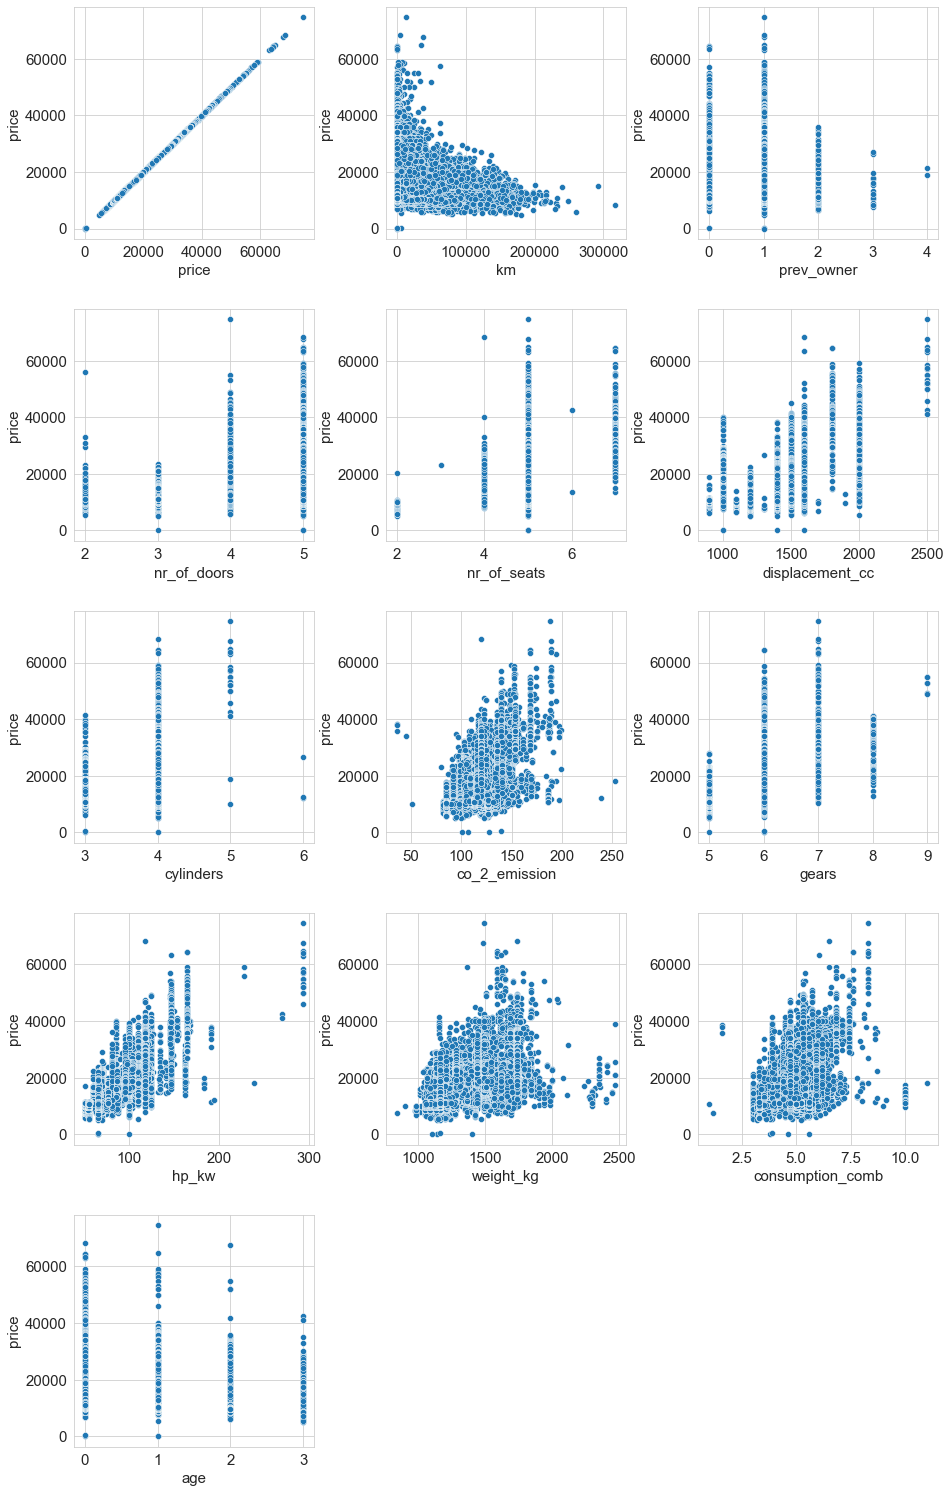

In [104]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

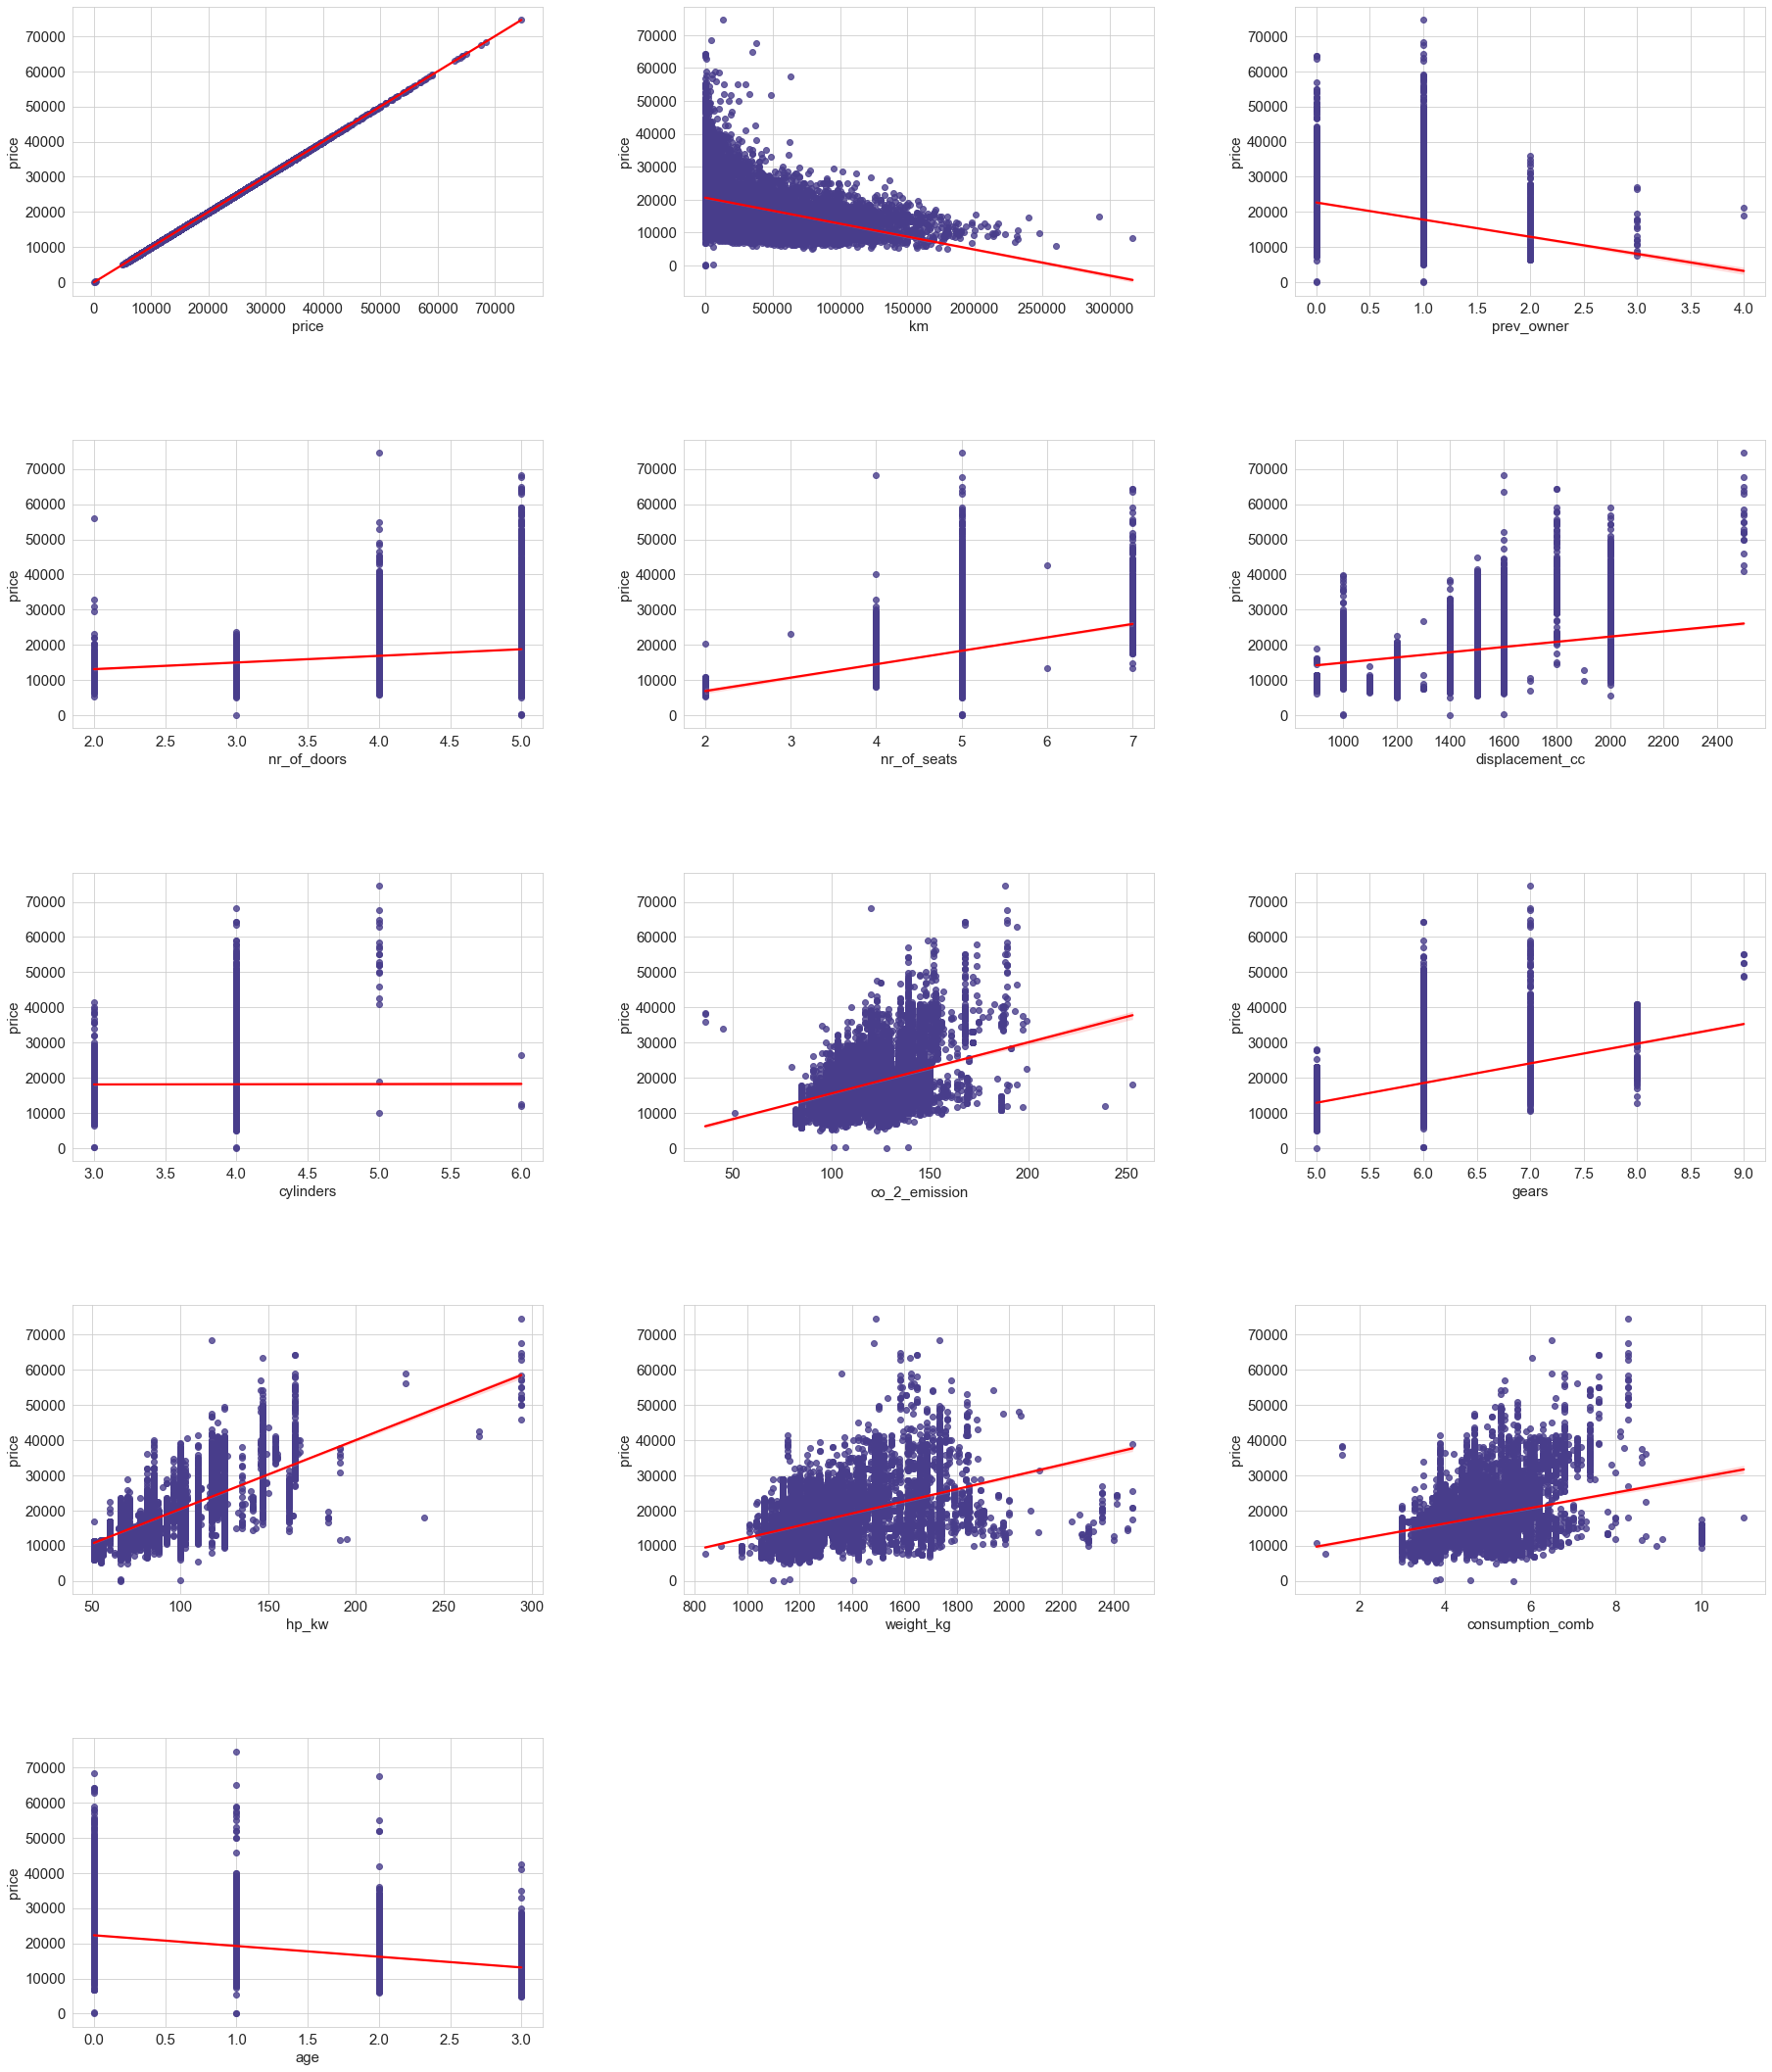

In [105]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

### Correlation between numerical features

In [106]:
df_numeric.corr()

price        km  prev_owner  nr_of_doors  nr_of_seats  \
price             1.000000 -0.391736   -0.253335     0.162998     0.237902   
km               -0.391736  1.000000    0.260849    -0.002474    -0.013378   
prev_owner       -0.253335  0.260849    1.000000    -0.125826    -0.025438   
nr_of_doors       0.162998 -0.002474   -0.125826     1.000000     0.104432   
nr_of_seats       0.237902 -0.013378   -0.025438     0.104432     1.000000   
displacement_cc   0.287681  0.314339    0.085973     0.093766     0.188572   
cylinders         0.002857  0.236430    0.116700     0.036336     0.227097   
co_2_emission     0.357343 -0.243501   -0.112509    -0.029763     0.274989   
gears             0.536257 -0.026632   -0.045767     0.113453     0.085795   
hp_kw             0.702076  0.018536   -0.073968     0.132808     0.280068   
weight_kg         0.463818  0.156547    0.010173     0.170264     0.325023   
consumption_comb  0.275180 -0.336821   -0.130010    -0.073589     0.208219   
age              -0.459185  0.757699    0.430030    -0.079923    -0.086828   

                  displacement_cc  cylinders  co_2_emission     gears  \
price                    0.287681   0.002857       0.357343  0.536257   
km                       0.314339   0.236430      -0.243501 -0.026632   
prev_owner               0.085973   0.116700      -0.112509 -0.045767   
nr_of_doors              0.093766   0.036336      -0.029763  0.113453   
nr_of_seats              0.188572   0.227097       0.274989  0.085795   
displacement_cc          1.000000   0.716544       0.290771  0.351445   
cylinders                0.716544   1.000000       0.330535  0.122703   
co_2_emission            0.290771   0.330535       1.000000  0.107974   
gears                    0.351445   0.122703       0.107974  1.000000   
hp_kw                    0.611571   0.321370       0.515817  0.457414   
weight_kg                0.563380   0.322971       0.295399  0.334613   
consumption_comb         0.025897   0.166429       0.871468  0.022171   
age                      0.221542   0.197282      -0.311984 -0.059764   

                     hp_kw  weight_kg  consumption_comb       age  
price             0.702076   0.463818          0.275180 -0.459185  
km                0.018536   0.156547         -0.336821  0.757699  
prev_owner       -0.073968   0.010173         -0.130010  0.430030  
nr_of_doors       0.132808   0.170264         -0.073589 -0.079923  
nr_of_seats       0.280068   0.325023          0.208219 -0.086828  
displacement_cc   0.611571   0.563380          0.025897  0.221542  
cylinders         0.321370   0.322971          0.166429  0.197282  
co_2_emission     0.515817   0.295399          0.871468 -0.311984  
gears             0.457414   0.334613          0.022171 -0.059764  
hp_kw             1.000000   0.645643          0.374418 -0.072316  
weight_kg         0.645643   1.000000          0.081479  0.077653  
consumption_comb  0.374418   0.081479          1.000000 -0.373666  
age              -0.072316   0.077653         -0.373666  1.000000

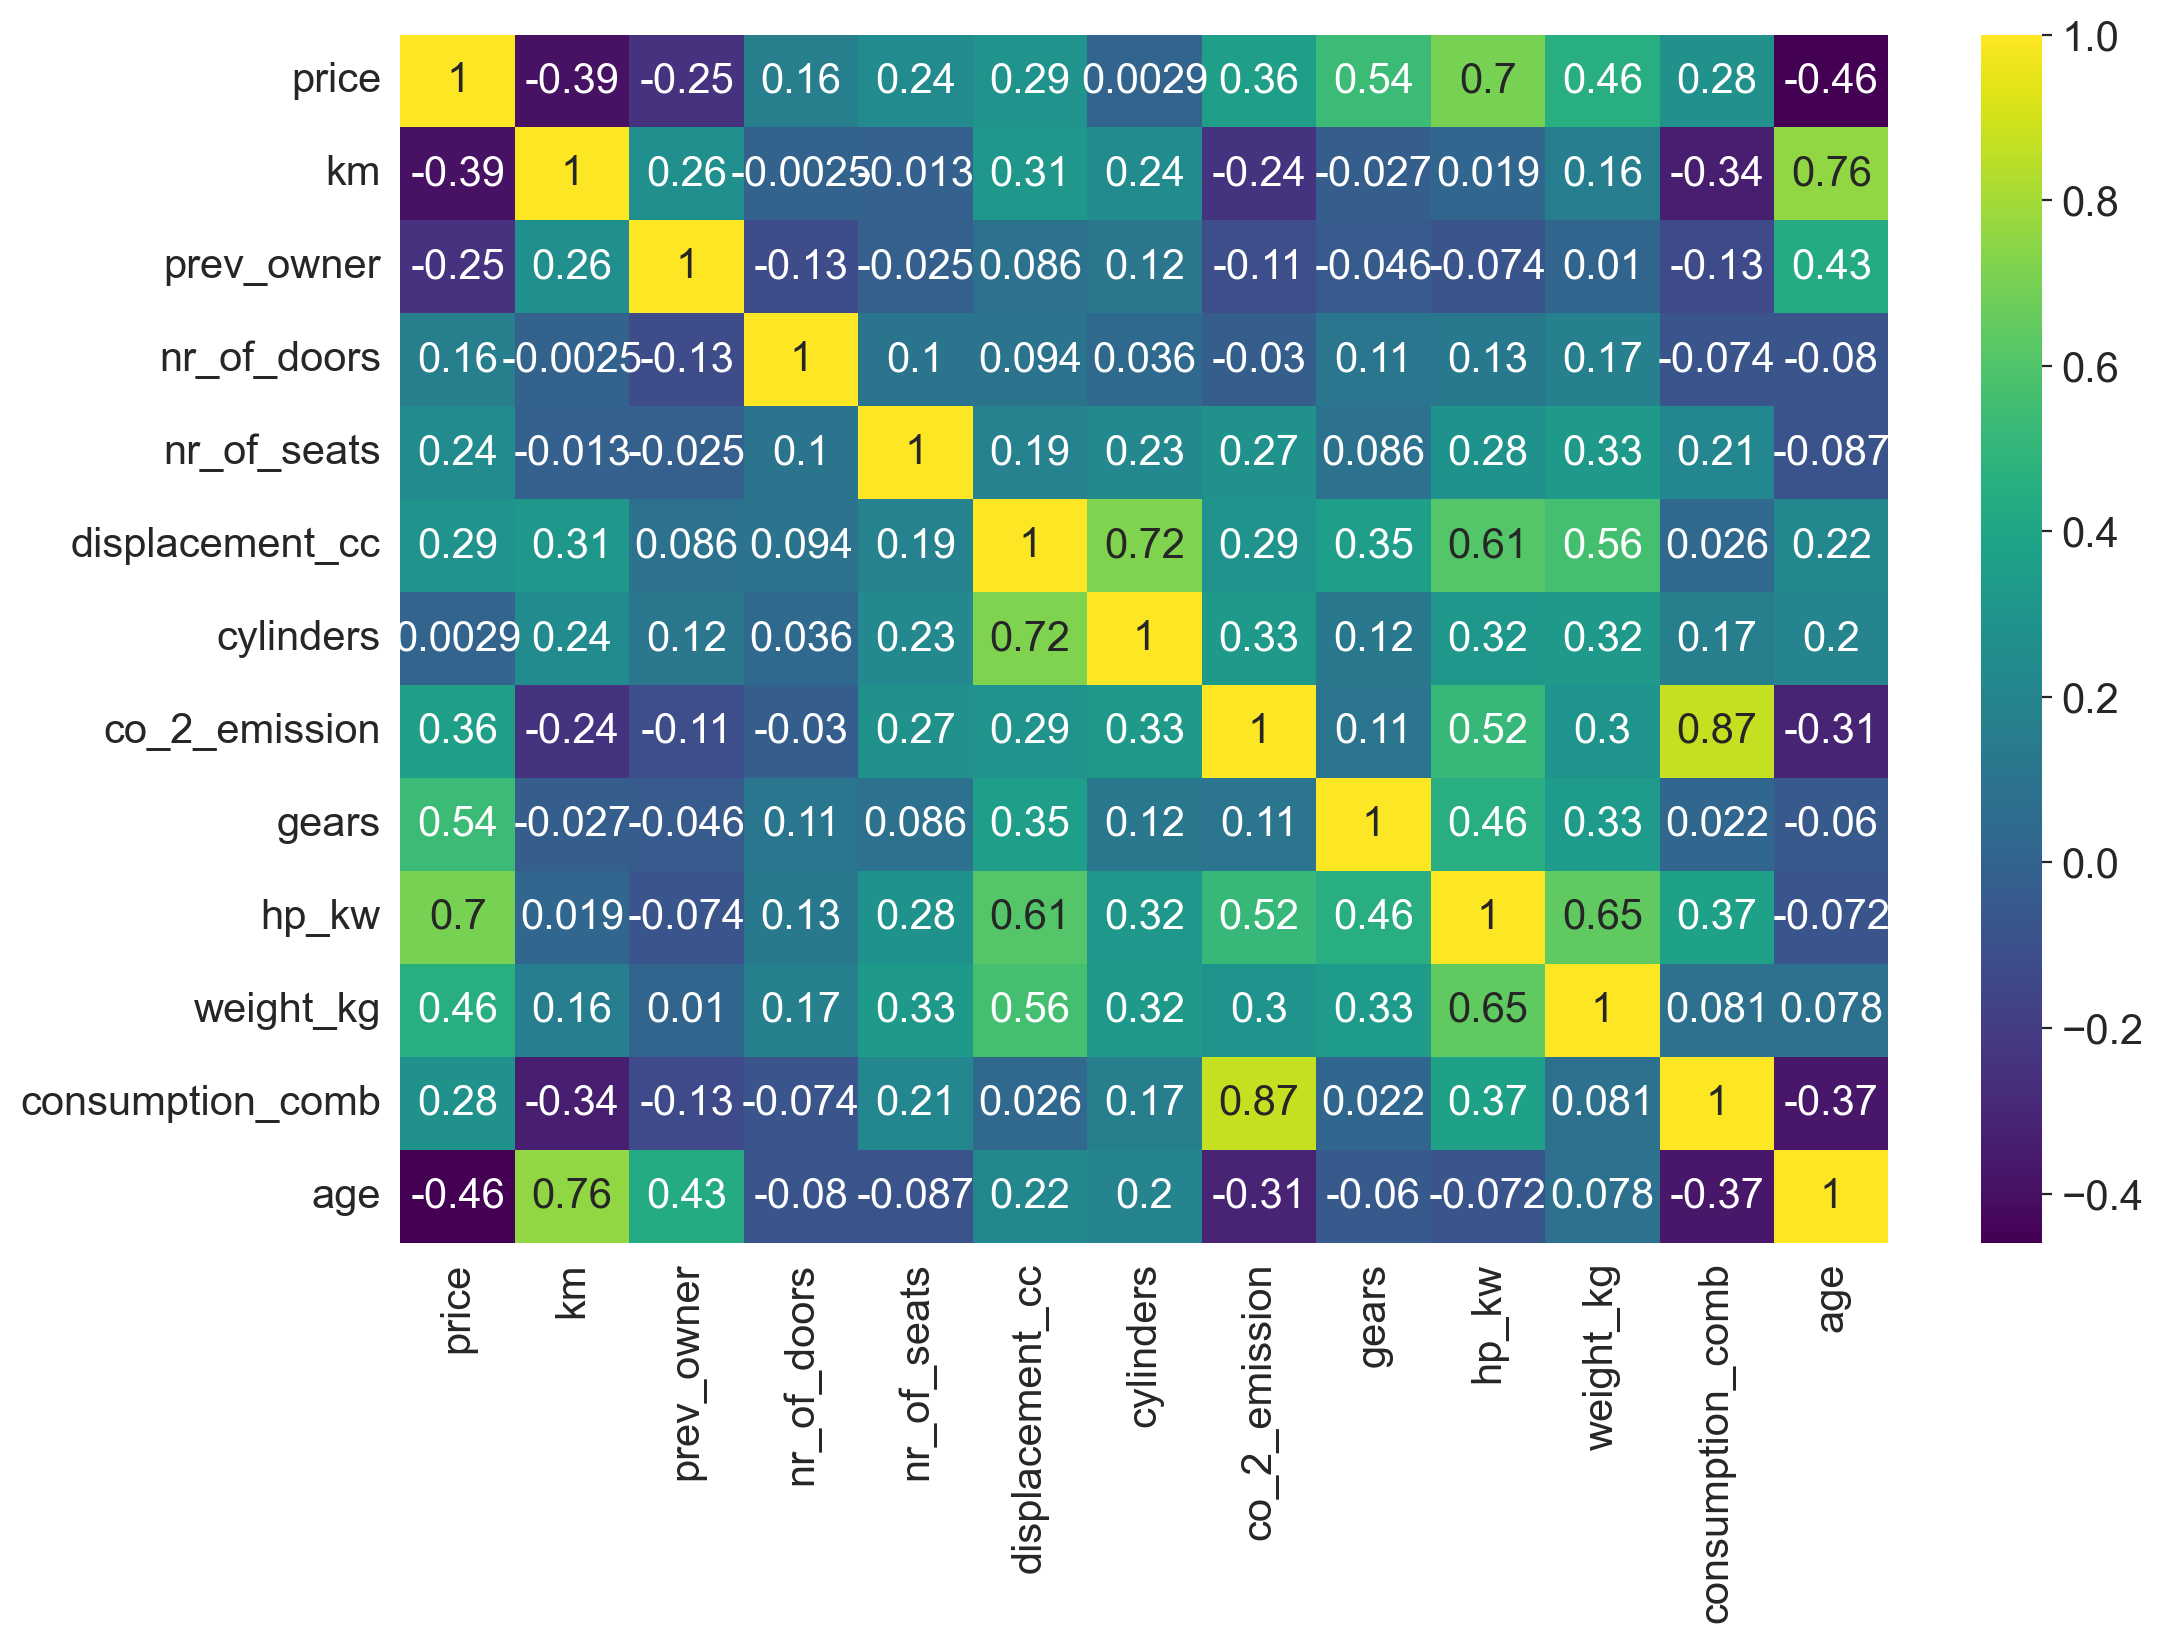

In [107]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(df_numeric.corr(), cmap="viridis", annot=True);

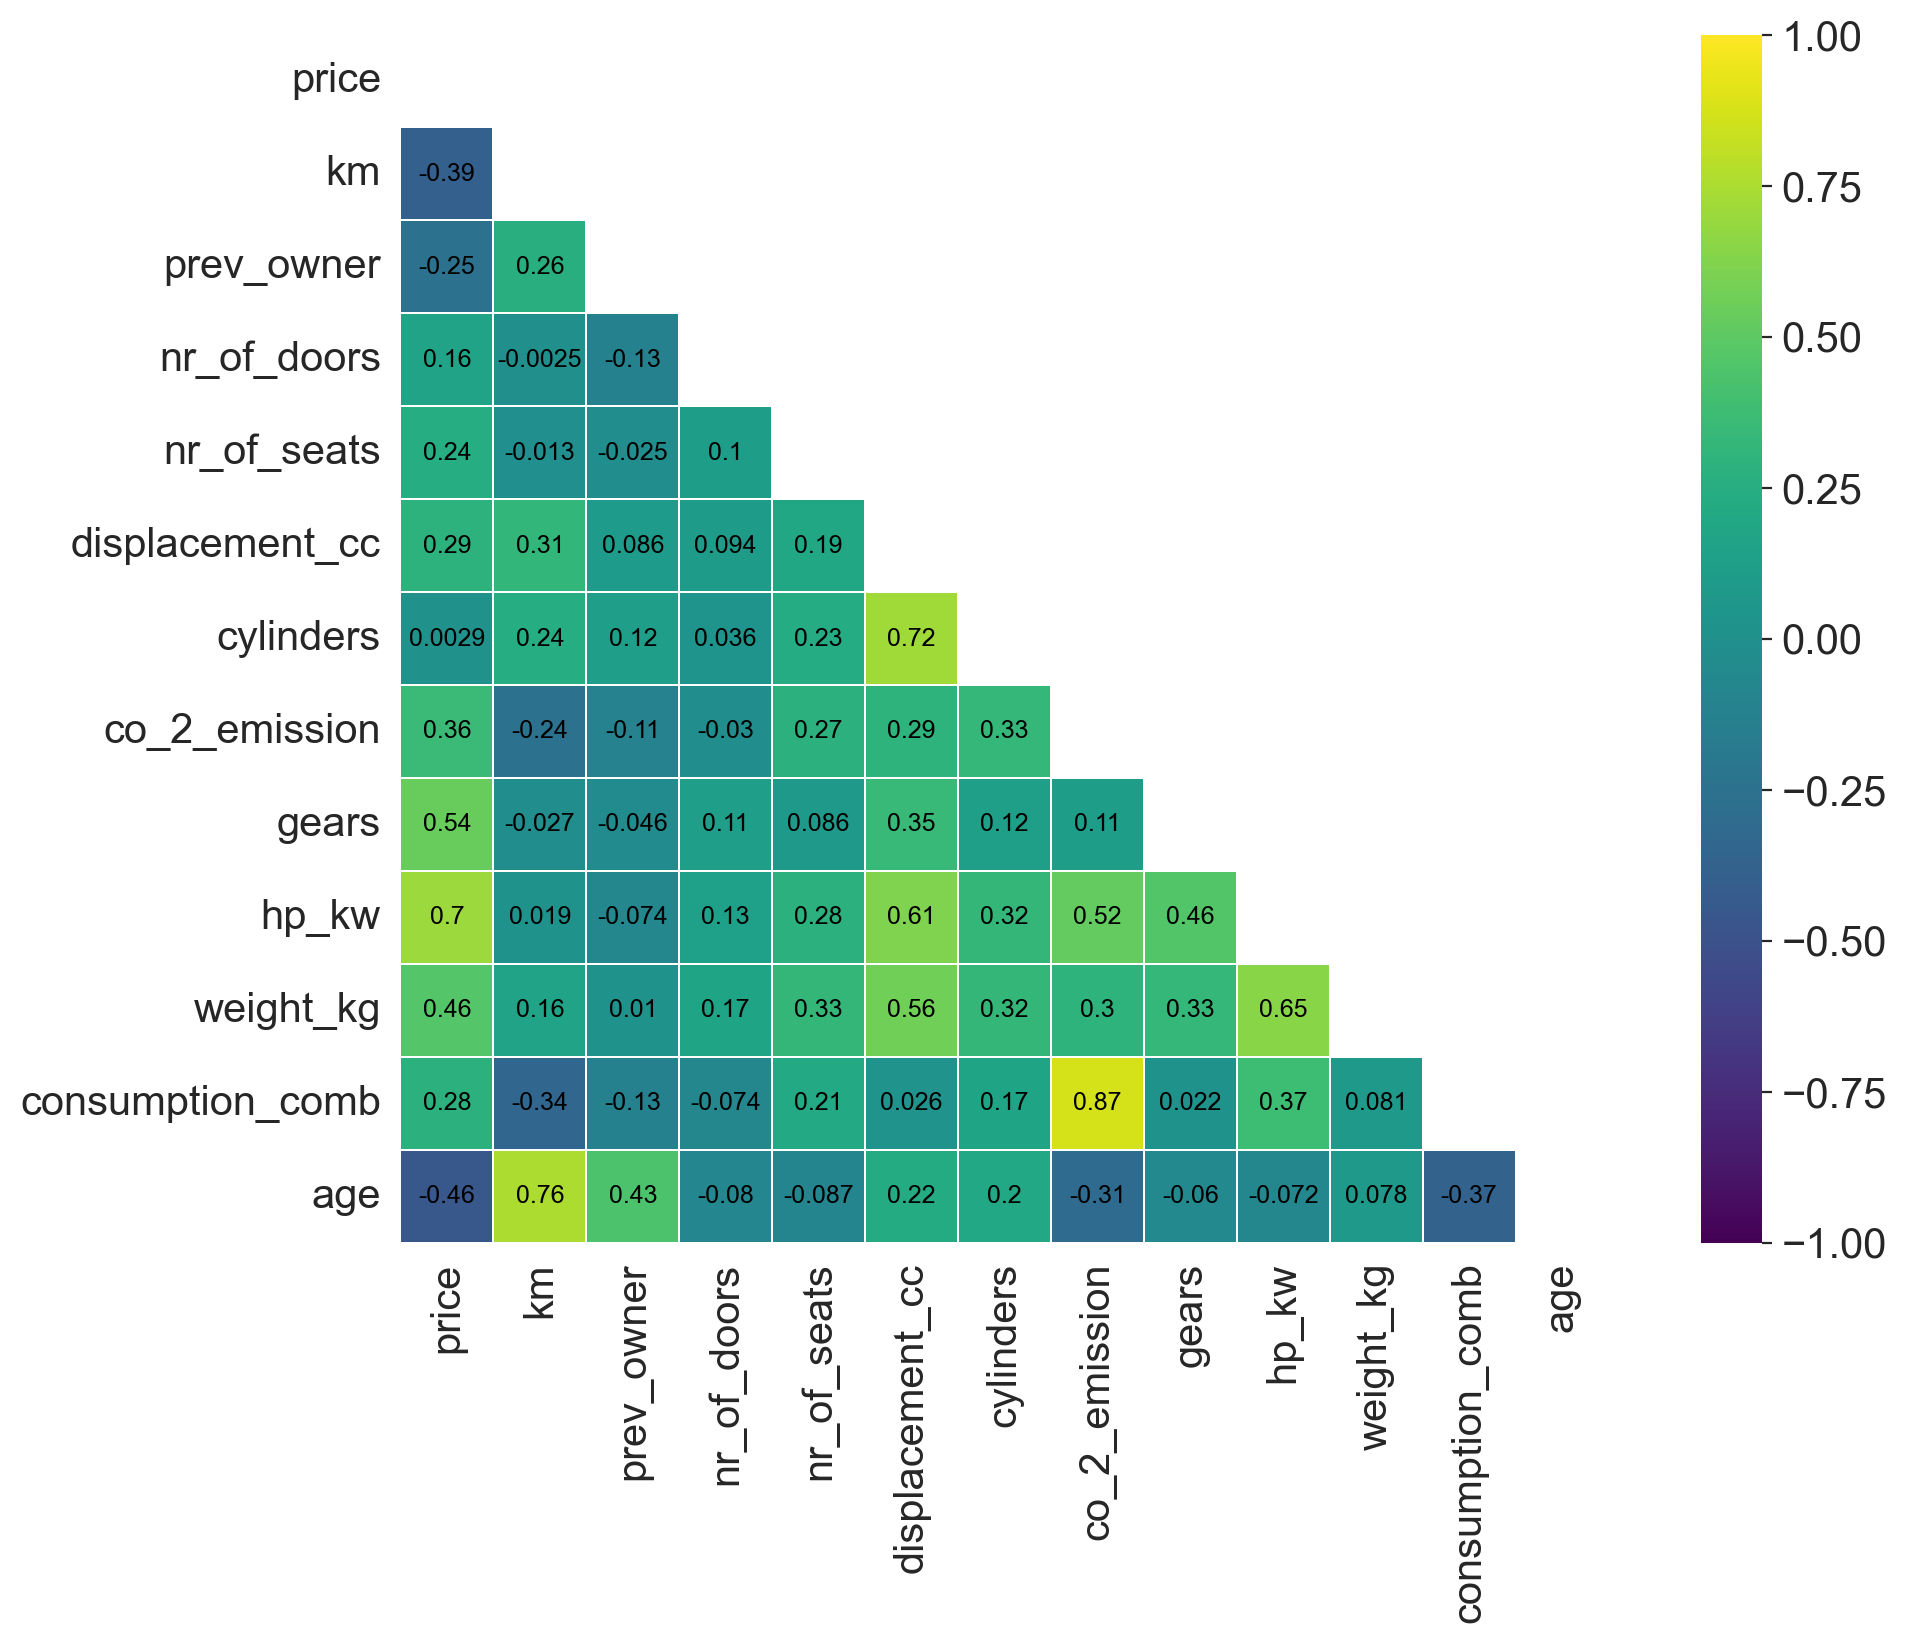

In [108]:
# Heatmap for all the remaining numerical data including the target 'price'

plt.figure(figsize=(12,8), dpi=200)

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df.corr(method = 'pearson')

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
sns.heatmap(corr_matrix,  mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True);

In [109]:
# we will drop cylinders, nr_of_doors columns, because the correlation<0.25
df.drop(columns = ["cylinders", "nr_of_doors"], inplace = True)

In [110]:
df.shape

(15042, 26)

## Handling with outliers for categoric columns

In [111]:
df_categoric= df.select_dtypes(include=["object"])

In [112]:
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   make_model           15042 non-null  object
 1   body_type            15042 non-null  object
 2   type                 15042 non-null  object
 3   body_color           15042 non-null  object
 4   paint_type           15042 non-null  object
 5   gearing_type         15042 non-null  object
 6   drive_chain          15042 non-null  object
 7   fuel                 15042 non-null  object
 8   emission_class       15042 non-null  object
 9   comfort_convenience  15042 non-null  object
 10  entertainment_media  15042 non-null  object
 11  extras               15042 non-null  object
 12  safety_security      15042 non-null  object
 13  upholstery_type      15042 non-null  object
 14  upholstery_color     15042 non-null  object
dtypes: object(15)
memory usage: 1.7+ MB


In [113]:
df_categoric.nunique()

make_model                9
body_type                 9
type                      5
body_color               14
paint_type                3
gearing_type              3
drive_chain               3
fuel                      4
emission_class            6
comfort_convenience    6198
entertainment_media     346
extras                  659
safety_security        4443
upholstery_type           6
upholstery_color         16
dtype: int64

In [114]:
# taking columns having less then 17 nunique and appending price column for further analysis

categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 17]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15042 entries, 0 to 15041
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make_model        15042 non-null  object 
 1   body_type         15042 non-null  object 
 2   type              15042 non-null  object 
 3   body_color        15042 non-null  object 
 4   paint_type        15042 non-null  object 
 5   gearing_type      15042 non-null  object 
 6   drive_chain       15042 non-null  object 
 7   fuel              15042 non-null  object 
 8   emission_class    15042 non-null  object 
 9   upholstery_type   15042 non-null  object 
 10  upholstery_color  15042 non-null  object 
 11  price             15042 non-null  float64
dtypes: float64(1), object(11)
memory usage: 1.4+ MB


### Countplot for categorical columns

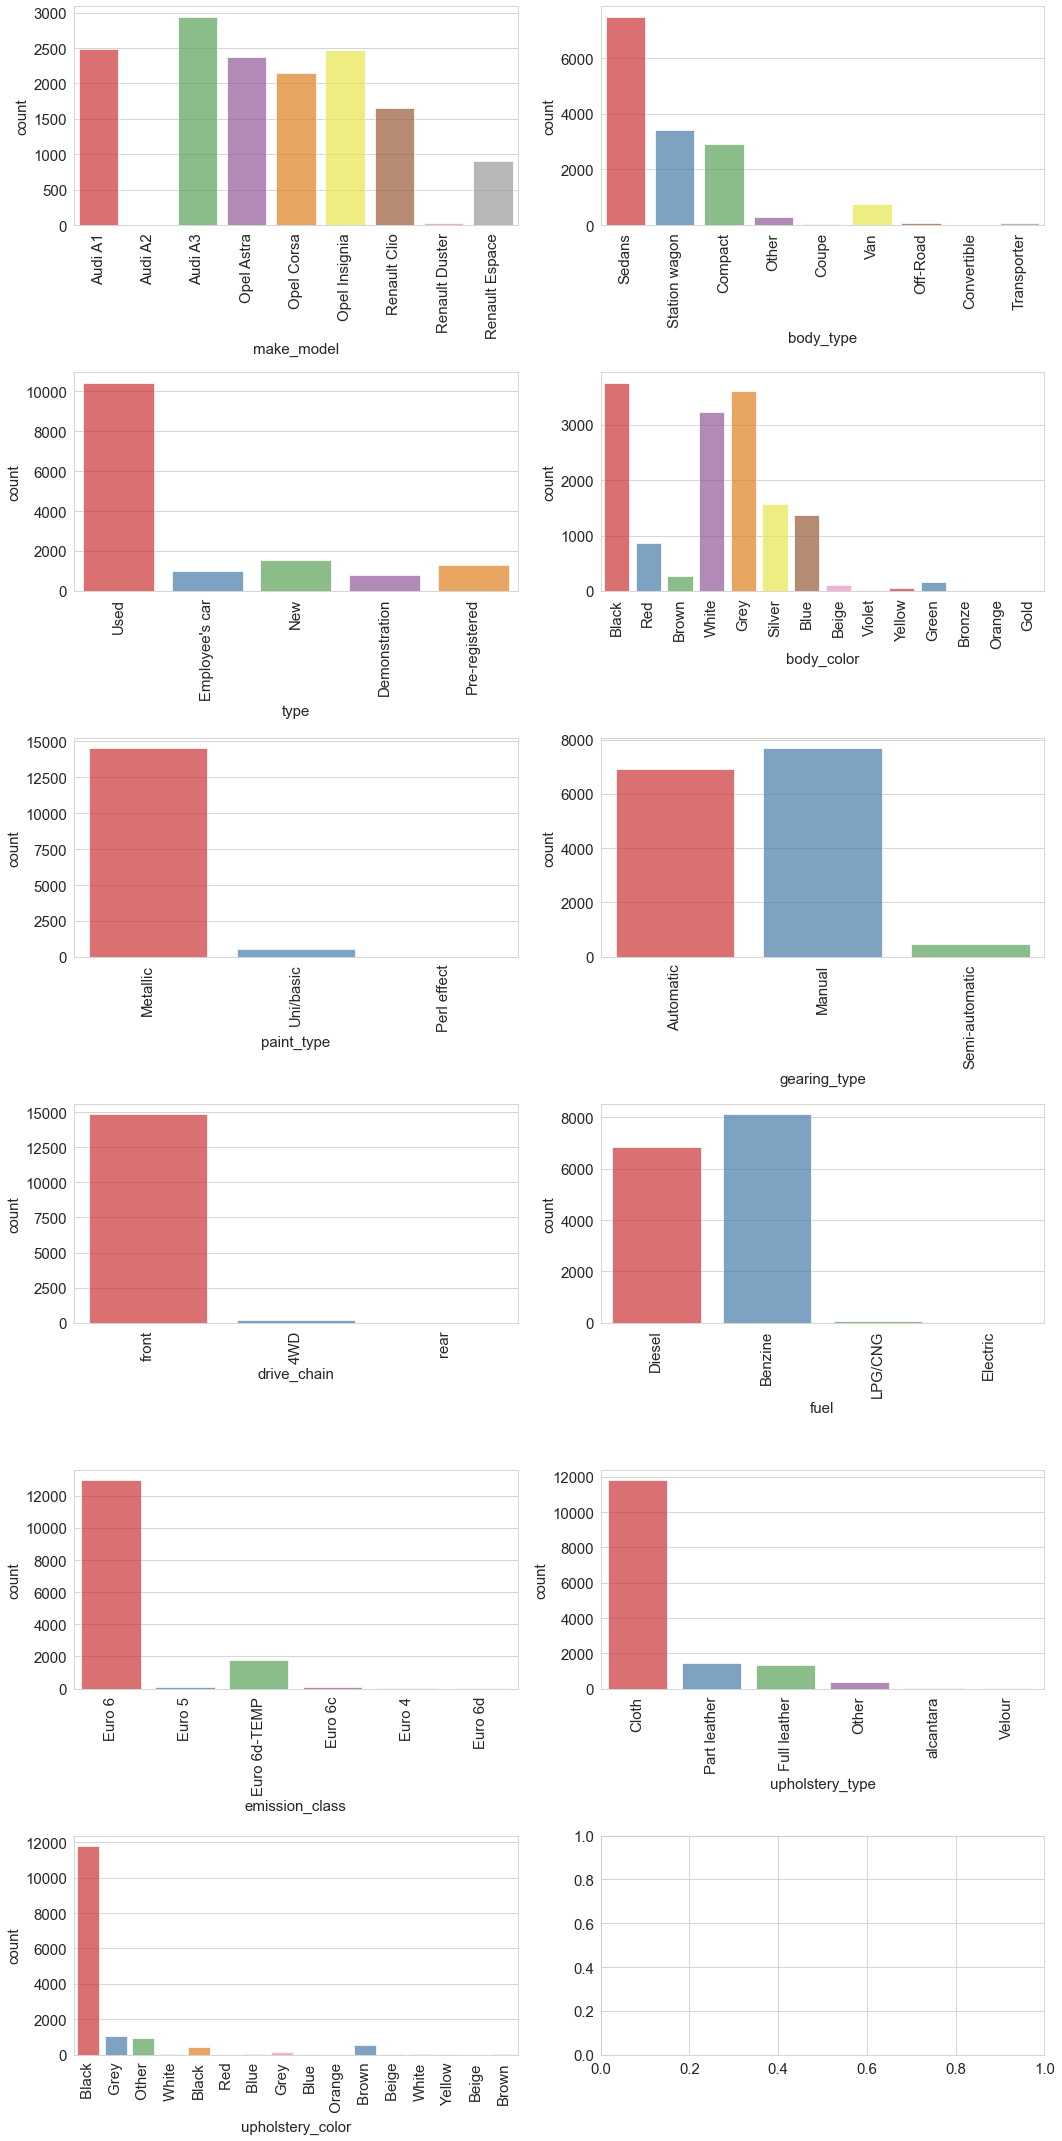

In [115]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(15, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")

fig.tight_layout()

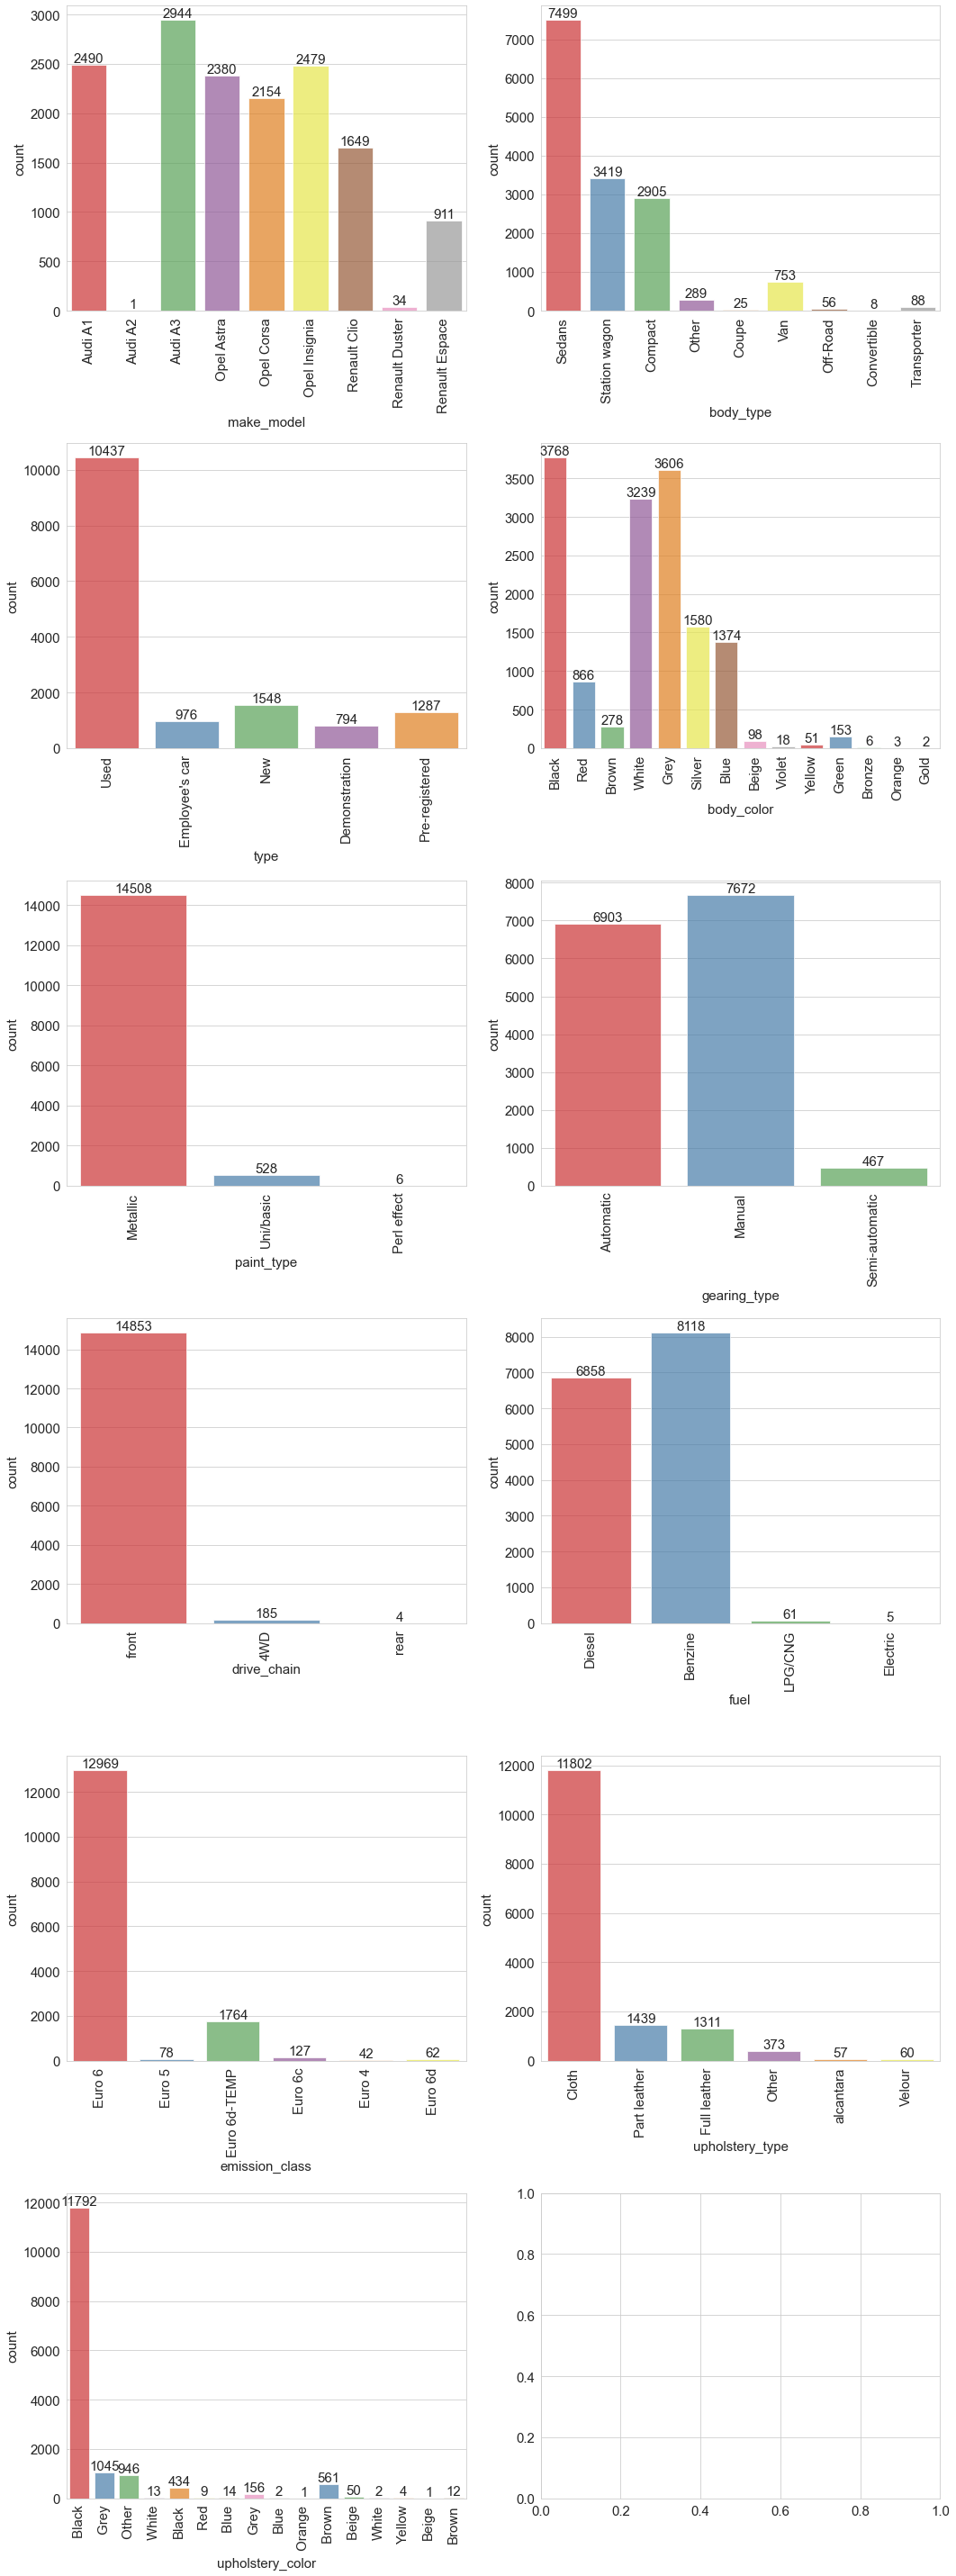

In [116]:
fig, axes = plt.subplots(round(len(df_categoric.columns) / 2), 2, figsize=(15, 40))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        g = sns.countplot(x=df_categoric.columns[i], alpha=0.7, data=df_categoric, ax=ax, palette = "Set1")
        g.bar_label(g.containers[0])
fig.tight_layout()

### Boxplots for categorical columns

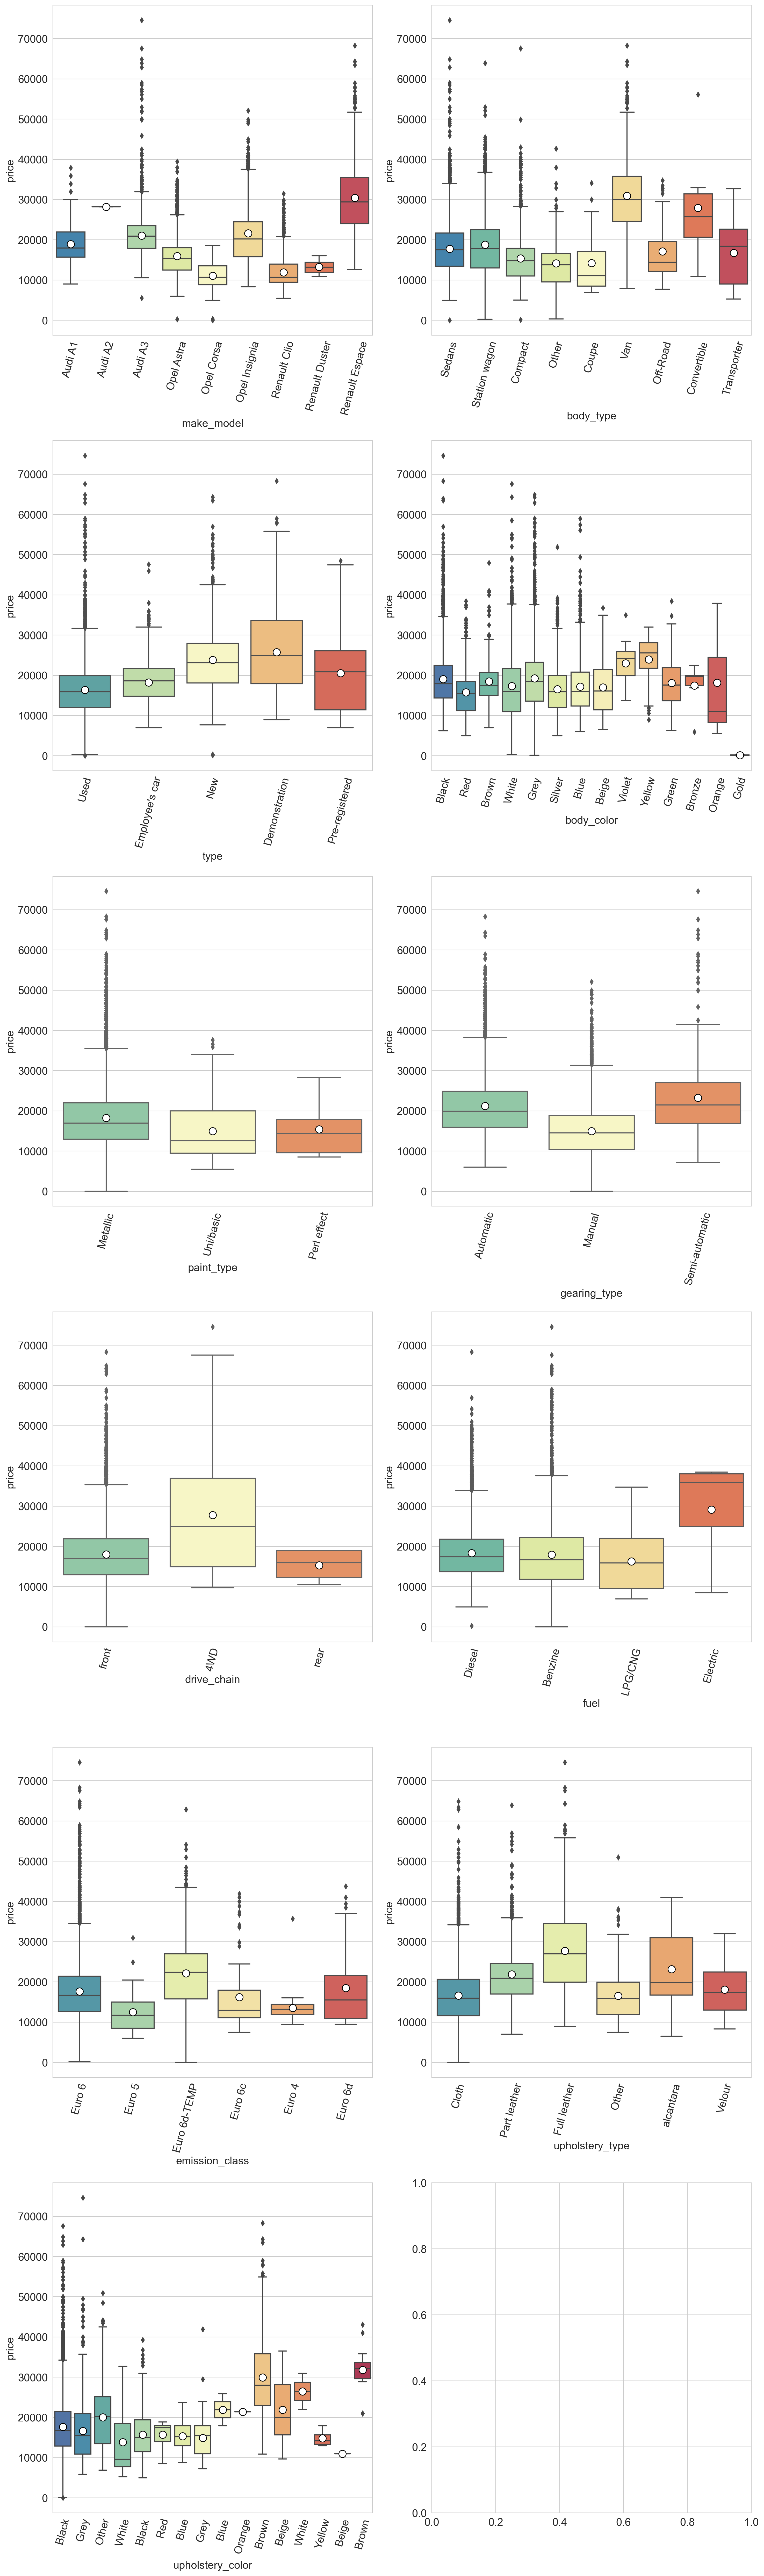

In [117]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 50), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [118]:
df['emission_class'].value_counts(dropna=False).sort_index().astype('category').cat.codes

Euro 4          0
Euro 5          2
Euro 6          5
Euro 6c         3
Euro 6d         1
Euro 6d-TEMP    4
dtype: int8

In [119]:
# because of counts of columns and charts we decided to drop these columns:

cols_to_drop = [ "body_color", "emission_class", "upholstery_color"]

df_categoric.drop(cols_to_drop, axis=1, inplace=True)

In [120]:
# drop cols_to_drop from df

df.drop(columns=cols_to_drop, axis=1, inplace=True)

In [121]:
df.shape

(15042, 23)

In [122]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'paint_type', 'nr_of_seats', 'gearing_type', 'displacement_cc',
       'drive_chain', 'fuel', 'co_2_emission', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'weight_kg', 'consumption_comb', 'age'],
      dtype='object')

In [123]:
iqr_lower_upper("price")

lower limit : -675.0,
upper limit: 35525.0,
number of extreme values : 465


(-675.0, 35525.0)

In [124]:
df.price.describe()

count   15,042.00
mean    18,113.02
std      7,421.46
min         13.00
25%     12,900.00
50%     16,950.00
75%     21,950.00
max     74,600.00
Name: price, dtype: float64

In [125]:
df.price.sort_values().head(50)

8166       13.00
8397      120.00
5768      255.00
8398      331.00
8396    4,950.00
8394    4,990.00
8395    5,250.00
8393    5,300.00
13045   5,445.00
8392    5,450.00
8391    5,490.00
8389    5,499.00
3077    5,555.00
8390    5,600.00
13038   5,700.00
13037   5,800.00
13035   5,850.00
13034   5,890.00
8387    5,890.00
13036   5,900.00
13033   5,900.00
13032   5,900.00
13031   5,938.00
8388    5,950.00
8174    5,970.00
8173    5,970.00
8172    5,970.00
8169    5,990.00
13030   6,000.00
13029   6,000.00
5435    6,000.00
8171    6,100.00
13027   6,200.00
13028   6,200.00
8170    6,200.00
8168    6,200.00
8385    6,250.00
13026   6,250.00
8376    6,290.00
13024   6,290.00
8375    6,299.00
8374    6,300.00
8372    6,380.00
8371    6,390.00
13025   6,400.00
8370    6,400.00
8368    6,450.00
8373    6,450.00
8369    6,479.00
8366    6,480.00
Name: price, dtype: float64

In [126]:
df.price.value_counts().sort_index().head(50)

13.00       1
120.00      1
255.00      1
331.00      1
4,950.00    1
4,990.00    1
5,250.00    1
5,300.00    1
5,445.00    1
5,450.00    1
5,490.00    1
5,499.00    1
5,555.00    1
5,600.00    1
5,700.00    1
5,800.00    1
5,850.00    1
5,890.00    2
5,900.00    3
5,938.00    1
5,950.00    1
5,970.00    3
5,990.00    1
6,000.00    3
6,100.00    1
6,200.00    4
6,250.00    2
6,290.00    2
6,299.00    1
6,300.00    1
6,380.00    1
6,390.00    1
6,400.00    2
6,450.00    2
6,479.00    1
6,480.00    4
6,489.00    1
6,490.00    4
6,499.00    2
6,500.00    6
6,580.00    1
6,590.00    1
6,600.00    2
6,660.00    1
6,690.00    2
6,700.00    1
6,780.00    3
6,790.00    2
6,800.00    1
6,850.00    3
Name: price, dtype: int64

In [127]:
df[df.price < 4000]

make_model      body_type  price       km  prev_owner  type paint_type  \
5768  Opel Astra  Station wagon 255.00 5,563.00        1.00  Used   Metallic   
8166  Opel Corsa         Sedans  13.00   123.00        1.00  Used   Metallic   
8397  Opel Corsa        Compact 120.00    12.00        0.00   New   Metallic   
8398  Opel Corsa          Other 331.00    10.00        0.00   New   Metallic   

      nr_of_seats gearing_type  displacement_cc drive_chain     fuel  \
5768         5.00       Manual         1,600.00       front   Diesel   
8166         5.00       Manual         1,400.00       front  Benzine   
8397         5.00       Manual         1,000.00       front  Benzine   
8398         5.00       Manual         1,000.00       front  Benzine   

      co_2_emission                                comfort_convenience  \
5768         101.00  Air conditioning,Cruise control,Electrical sid...   
8166         128.00  Air conditioning,Cruise control,Electrical sid...   
8397         107.00  Air conditioning,Automatic climate control,Cru...   
8398         139.00  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media  \
5768  Bluetooth,Hands-free equipment,On-board comput...   
8166  Bluetooth,CD player,Hands-free equipment,MP3,O...   
8397              Digital radio,On-board computer,Radio   
8398       Hands-free equipment,On-board computer,Radio   

                             extras  \
5768                      Roof rack   
8166                   Alloy wheels   
8397  Alloy wheels,Sport suspension   
8398     Alloy wheels,Sport package   

                                        safety_security  gears  hp_kw  \
5768  ABS,Central door lock with remote control,Dayt...   6.00 100.00   
8166  ABS,Adaptive headlights,Central door lock with...   5.00  66.00   
8397  Central door lock,Daytime running lights,Drive...   6.00  66.00   
8398  ABS,Central door lock,Driver-side airbag,Elect...   6.00  66.00   

     upholstery_type  weight_kg  consumption_comb  age  
5768           Cloth   1,403.00              3.80 1.00  
8166           Cloth   1,141.00              5.60 1.00  
8397           Cloth   1,099.00              4.60 0.00  
8398           Cloth   1,163.00              3.90 0.00

In [128]:
# drop outliers in price
df.drop(index=df[df.price < 4000].index, inplace=True)

In [129]:
df.shape

(15038, 23)

In [130]:
df_categoric=df.select_dtypes(include="O")
df_categoric.shape

(15038, 12)

In [131]:
### price outlier ları düşüldükten sonra categorical feature'lar için boxplot
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15038 non-null  object 
 1   body_type        15038 non-null  object 
 2   type             15038 non-null  object 
 3   paint_type       15038 non-null  object 
 4   gearing_type     15038 non-null  object 
 5   drive_chain      15038 non-null  object 
 6   fuel             15038 non-null  object 
 7   upholstery_type  15038 non-null  object 
 8   price            15038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


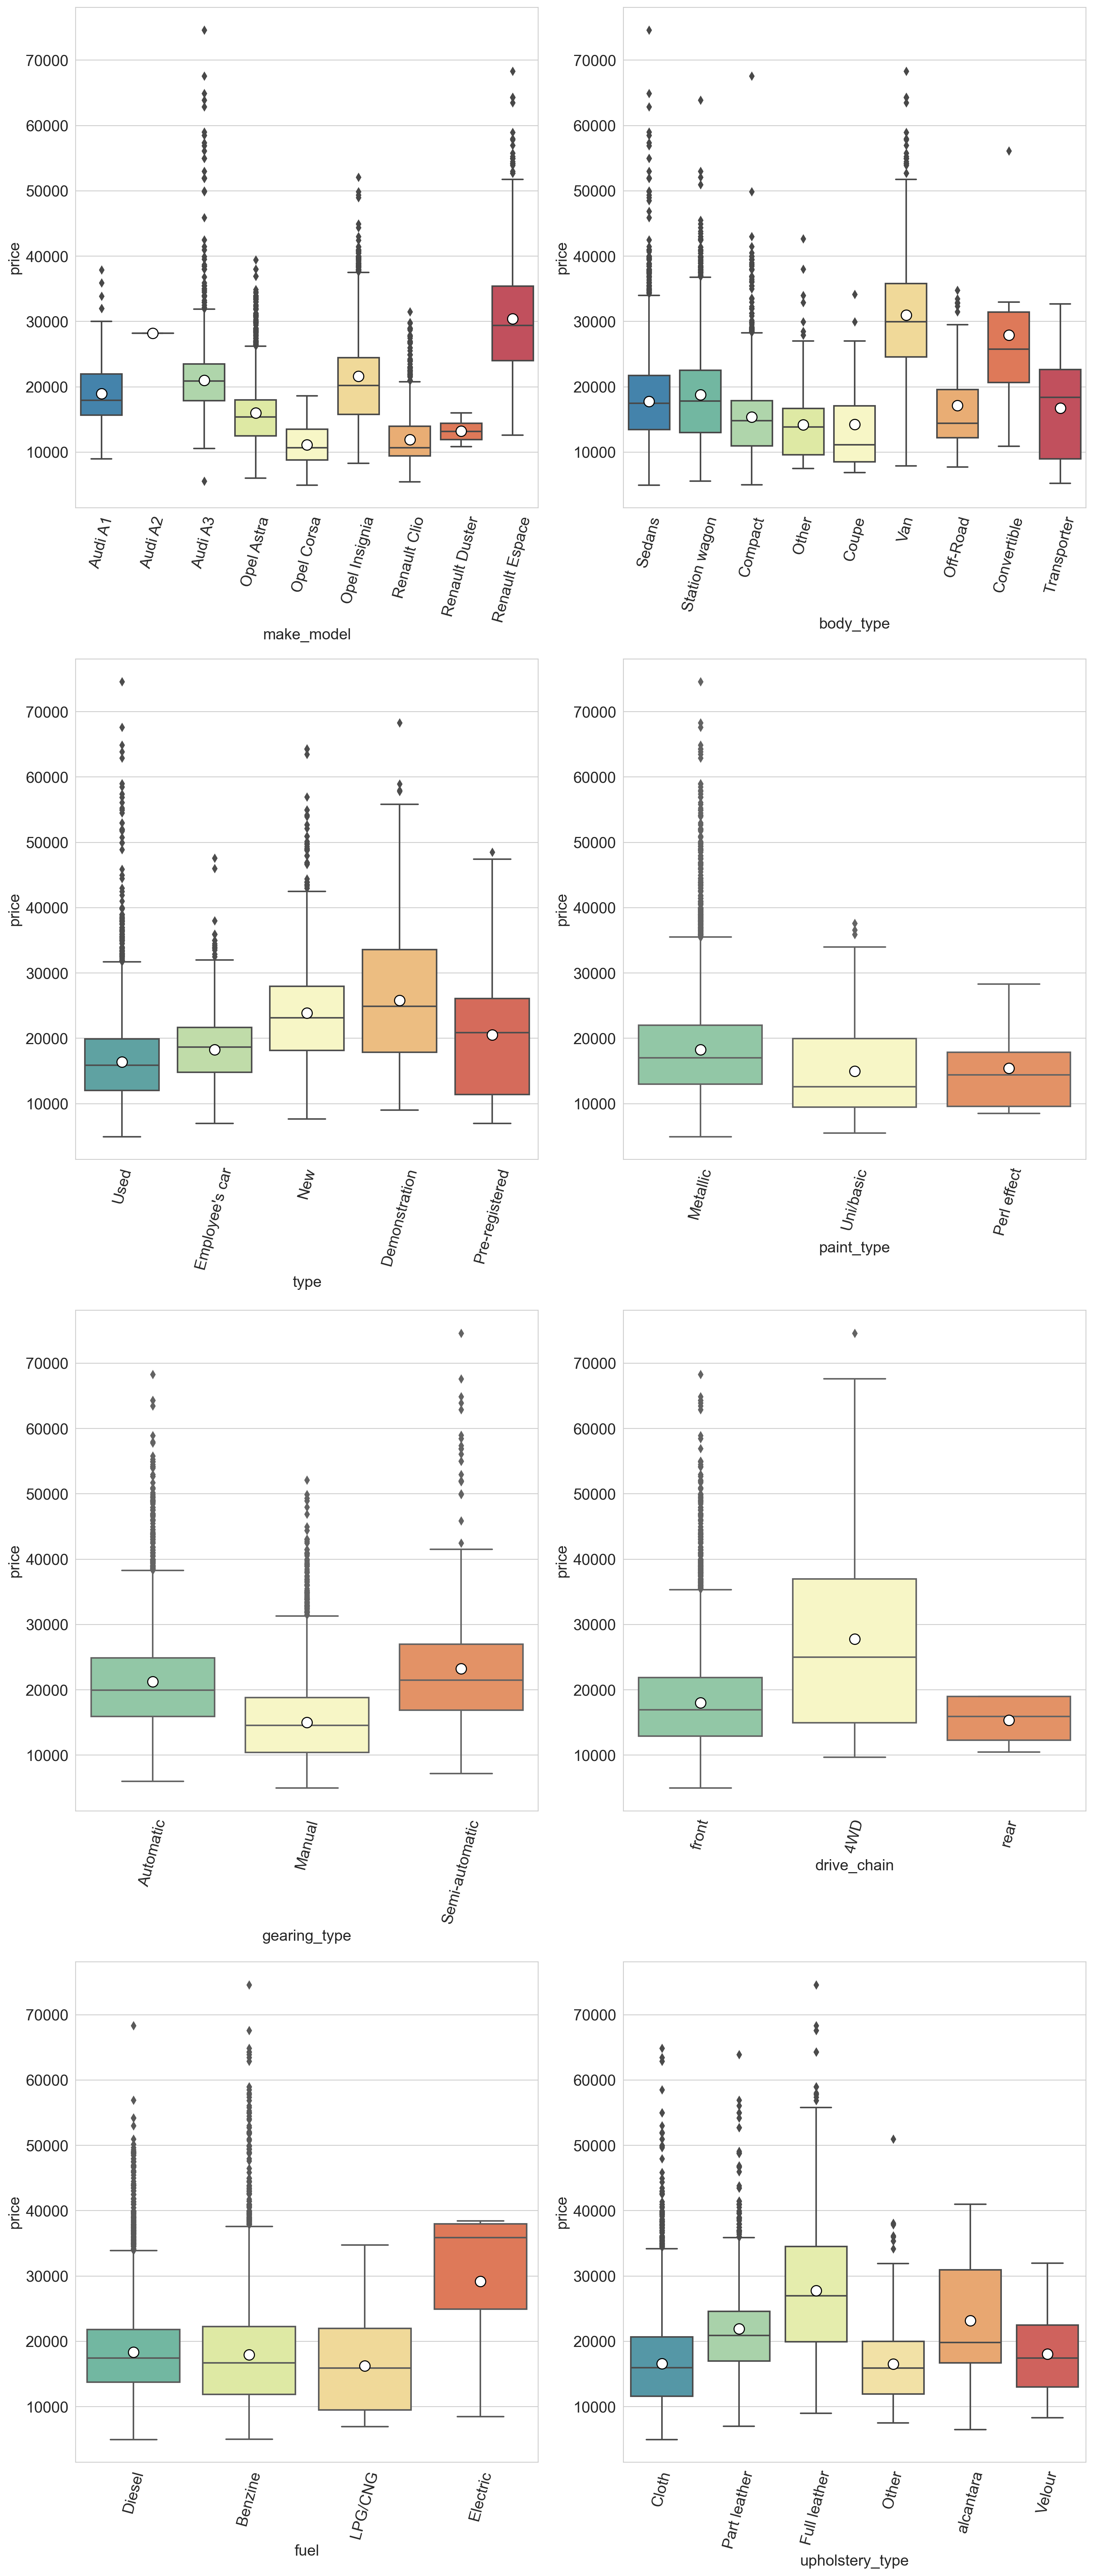

In [132]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

In [133]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'prev_owner', 'type',
       'paint_type', 'nr_of_seats', 'gearing_type', 'displacement_cc',
       'drive_chain', 'fuel', 'co_2_emission', 'comfort_convenience',
       'entertainment_media', 'extras', 'safety_security', 'gears', 'hp_kw',
       'upholstery_type', 'weight_kg', 'consumption_comb', 'age'],
      dtype='object')

In [134]:
df.shape

(15038, 23)

# Final Step (Checking final situation of data via graphs)

## Scatter plot for final df numerical features

In [135]:
df_numeric= df.select_dtypes(exclude=["object"])

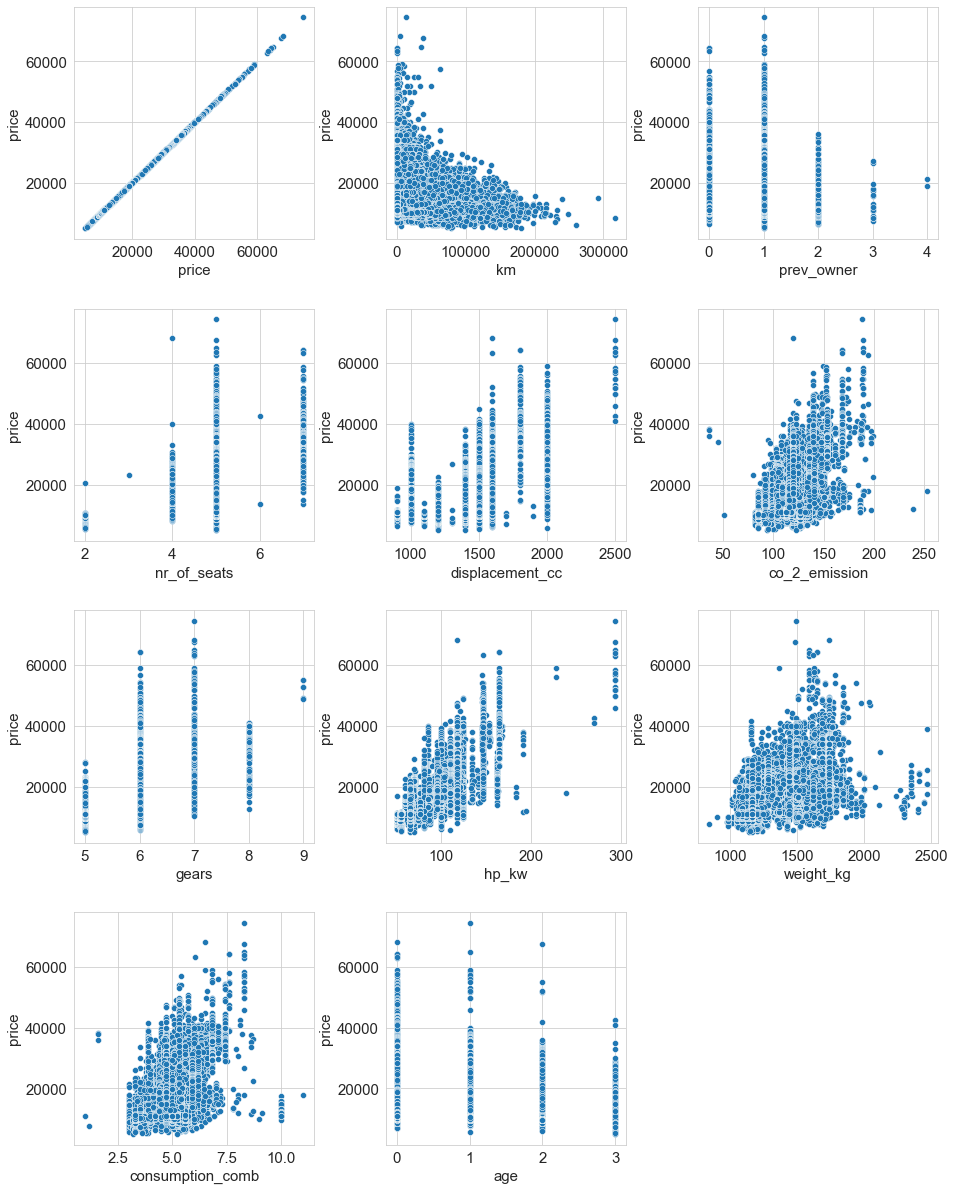

In [136]:
fig = plt.figure(figsize=(15,20))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.1,
                    wspace=0.3,
                    hspace=0.3)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(5,3,i+1)
        sns.scatterplot(y= "price", x=col, data=df_numeric)

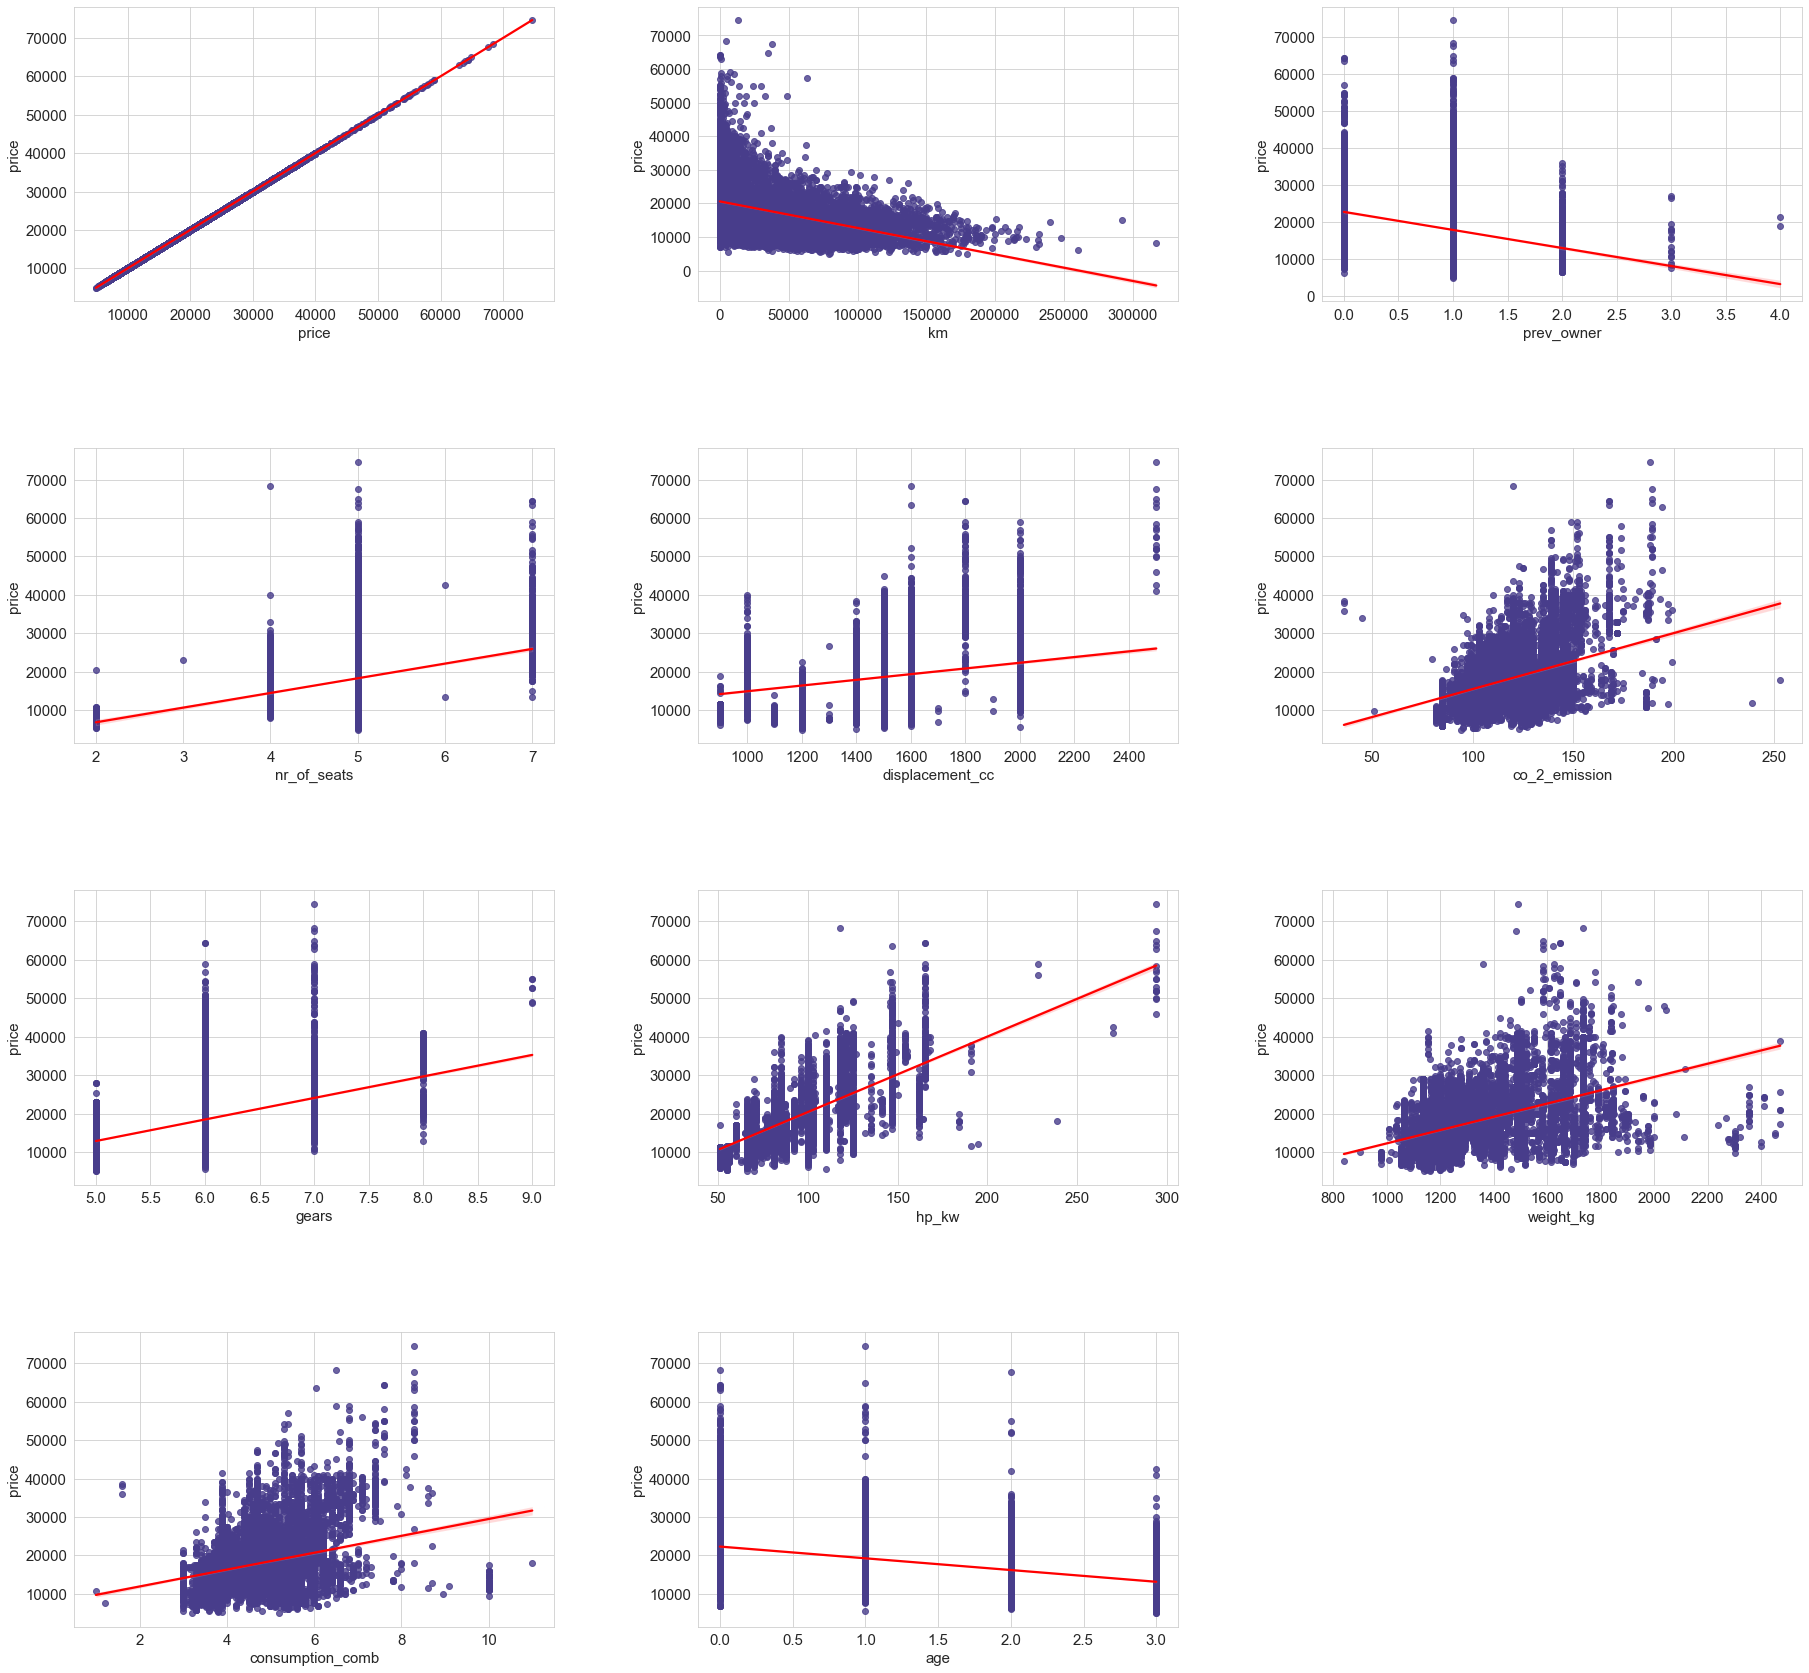

In [137]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_numeric.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "price", data=df_numeric, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

## Boxplots for final df categorical features

In [138]:
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
categorical_features.append("price")
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   make_model       15038 non-null  object 
 1   body_type        15038 non-null  object 
 2   type             15038 non-null  object 
 3   paint_type       15038 non-null  object 
 4   gearing_type     15038 non-null  object 
 5   drive_chain      15038 non-null  object 
 6   fuel             15038 non-null  object 
 7   upholstery_type  15038 non-null  object 
 8   price            15038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.7+ MB


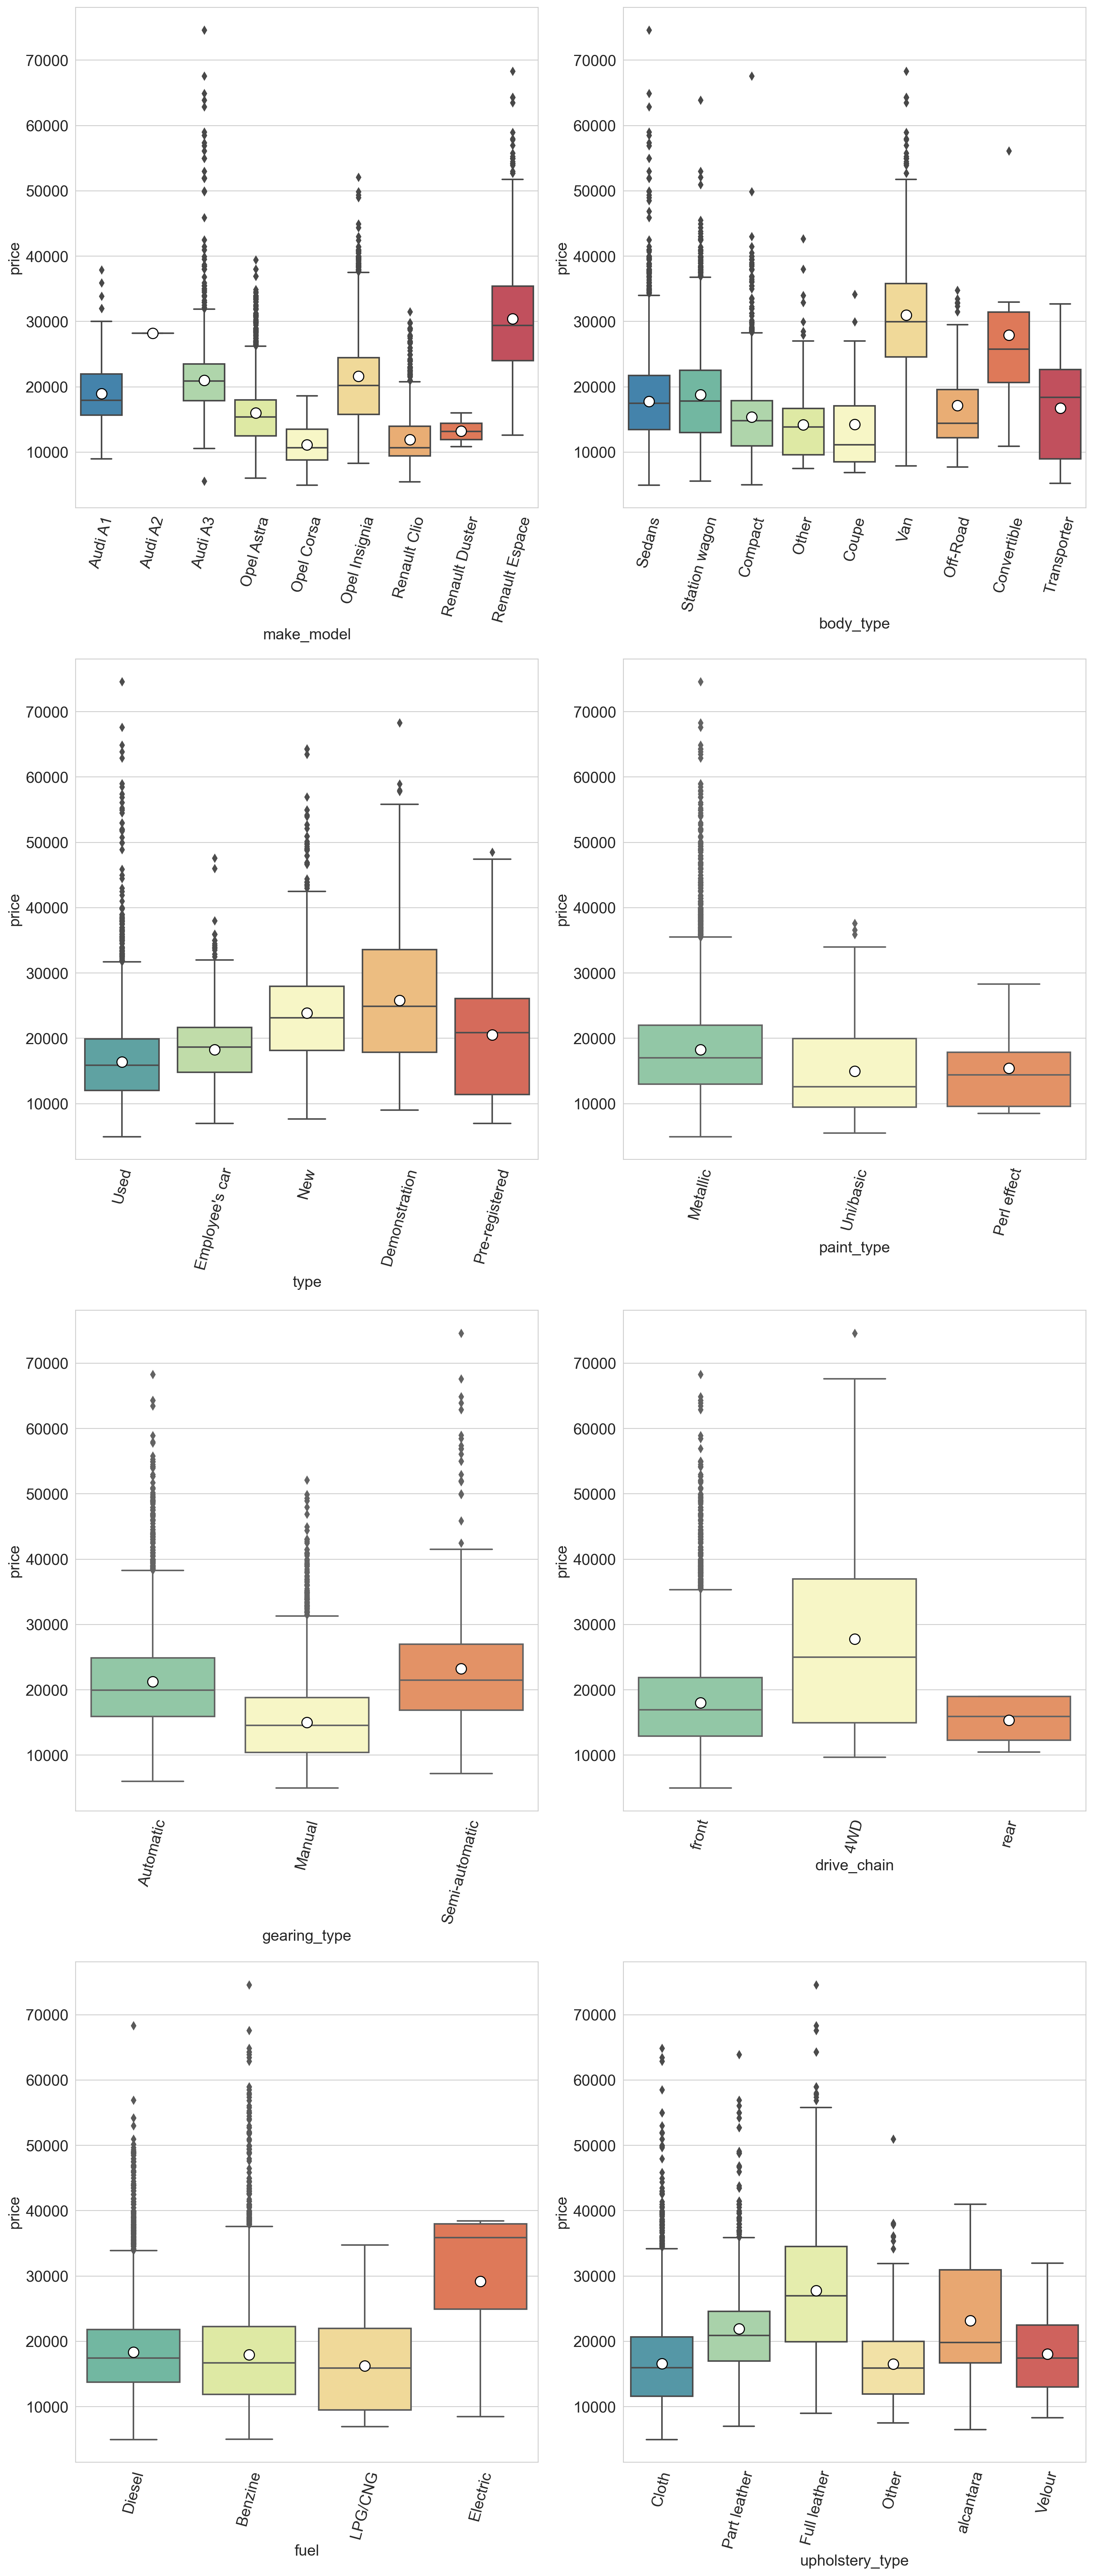

In [139]:
fig, axes = plt.subplots(
    round(len(df_categoric.columns)/2), 2, figsize=(15, 35), dpi=200)

for i, ax in enumerate(fig.axes):
    # plot the variation of price in each feature
    if i < len(df_categoric.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_categoric.columns[i], y="price", data=df_categoric, ax=ax, palette="Spectral_r")

fig.tight_layout()

## Export dataframe to csv file (without dummy)

In [140]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15038 non-null  object 
 1   body_type            15038 non-null  object 
 2   price                15038 non-null  float64
 3   km                   15038 non-null  float64
 4   prev_owner           15038 non-null  float64
 5   type                 15038 non-null  object 
 6   paint_type           15038 non-null  object 
 7   nr_of_seats          15038 non-null  float64
 8   gearing_type         15038 non-null  object 
 9   displacement_cc      15038 non-null  float64
 10  drive_chain          15038 non-null  object 
 11  fuel                 15038 non-null  object 
 12  co_2_emission        15038 non-null  float64
 13  comfort_convenience  15038 non-null  object 
 14  entertainment_media  15038 non-null  object 
 15  extras               15038 non-null 

In [142]:
df_categoric=df.select_dtypes(include="O")
categorical_features = [i for i in df_categoric.columns if df_categoric[i].nunique() < 15]
df_categoric = df[categorical_features]
df_categoric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   make_model       15038 non-null  object
 1   body_type        15038 non-null  object
 2   type             15038 non-null  object
 3   paint_type       15038 non-null  object
 4   gearing_type     15038 non-null  object
 5   drive_chain      15038 non-null  object
 6   fuel             15038 non-null  object
 7   upholstery_type  15038 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [143]:
df_dummied = pd.get_dummies(columns=list(df_categoric.columns), data=df, drop_first = True)

In [144]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         15038 non-null  float64
 1   km                            15038 non-null  float64
 2   prev_owner                    15038 non-null  float64
 3   nr_of_seats                   15038 non-null  float64
 4   displacement_cc               15038 non-null  float64
 5   co_2_emission                 15038 non-null  float64
 6   comfort_convenience           15038 non-null  object 
 7   entertainment_media           15038 non-null  object 
 8   extras                        15038 non-null  object 
 9   safety_security               15038 non-null  object 
 10  gears                         15038 non-null  float64
 11  hp_kw                         15038 non-null  float64
 12  weight_kg                     15038 non-null  float64
 13  c

In [145]:
df_dummied = df_dummied.join(df_dummied['comfort_convenience'].str.get_dummies(sep=',').add_prefix('CC_'))
df_dummied = df_dummied.join(df_dummied['entertainment_media'].str.get_dummies(sep=',').add_prefix('EM_'))
df_dummied = df_dummied.join(df_dummied['extras'].str.get_dummies(sep=',').add_prefix('E_'))
df_dummied = df_dummied.join(df_dummied['safety_security'].str.get_dummies(sep=',').add_prefix('SS_'))

In [146]:
df_dummied.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15038 entries, 0 to 15041
Columns: 143 entries, price to SS_Xenon headlights
dtypes: float64(11), int64(94), object(4), uint8(34)
memory usage: 13.6+ MB


In [147]:
df_dummied.drop(columns=["comfort_convenience", "entertainment_media", "extras", "safety_security"], inplace=True)

In [148]:
df_dummied

price        km  prev_owner  nr_of_seats  displacement_cc  \
0     15,770.00 56,013.00        2.00         5.00         1,400.00   
1     14,500.00 80,000.00        1.00         4.00         1,800.00   
2     14,640.00 83,450.00        1.00         4.00         1,600.00   
3     14,500.00 73,000.00        1.00         4.00         1,400.00   
4     16,790.00 16,200.00        1.00         5.00         1,400.00   
...         ...       ...         ...          ...              ...   
15037 39,950.00     10.00        0.00         5.00         2,000.00   
15038 39,885.00  9,900.00        1.00         5.00         1,800.00   
15039 39,875.00     15.00        1.00         7.00         2,000.00   
15040 39,700.00     10.00        1.00         7.00         2,000.00   
15041 40,999.00  2,900.00        1.00         5.00         1,800.00   

       co_2_emission  gears  hp_kw  weight_kg  consumption_comb  age  \
0              99.00   7.00  66.00   1,220.00              3.80 3.00   
1             129.00   7.00 141.00   1,255.00              5.60 2.00   
2              99.00   7.00  85.00   1,135.00              3.80 3.00   
3              99.00   6.00  66.00   1,195.00              3.80 3.00   
4             109.00   7.00  66.00   1,135.00              4.10 3.00   
...              ...    ...    ...        ...               ...  ...   
15037         139.00   6.00 147.00   1,758.00              5.30 0.00   
15038         168.00   7.00 165.00   1,708.00              7.40 0.00   
15039         139.00   6.00 146.00   1,734.00              5.30 0.00   
15040         139.00   6.00 147.00   1,758.00              5.30 0.00   
15041         153.00   6.00 165.00   1,685.00              6.80 0.00   

       make_model_Audi A2  make_model_Audi A3  make_model_Opel Astra  \
0                       0                   0                      0   
1                       0                   0                      0   
2                       0                   0                      0   
3                       0                   0                      0   
4                       0                   0                      0   
...                   ...                 ...                    ...   
15037                   0                   0                      0   
15038                   0                   0                      0   
15039                   0                   0                      0   
15040                   0                   0                      0   
15041                   0                   0                      0   

       make_model_Opel Corsa  make_model_Opel Insignia  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
...                      ...                       ...   
15037                      0                         0   
15038                      0                         0   
15039                      0                         0   
15040                      0                         0   
15041                      0                         0   

       make_model_Renault Clio  make_model_Renault Duster  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
15037                        0                          0   
15038                        0                          0   
15039                        0                          0   
15040                        0                          0   
15041                        0                          0  

## Export dataframe to csv file (dummy)

In [149]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)

In [150]:
pd.read_csv("final_scout_dummy.csv")

price        km  prev_owner  nr_of_seats  displacement_cc  \
0     15,770.00 56,013.00        2.00         5.00         1,400.00   
1     14,500.00 80,000.00        1.00         4.00         1,800.00   
2     14,640.00 83,450.00        1.00         4.00         1,600.00   
3     14,500.00 73,000.00        1.00         4.00         1,400.00   
4     16,790.00 16,200.00        1.00         5.00         1,400.00   
...         ...       ...         ...          ...              ...   
15033 39,950.00     10.00        0.00         5.00         2,000.00   
15034 39,885.00  9,900.00        1.00         5.00         1,800.00   
15035 39,875.00     15.00        1.00         7.00         2,000.00   
15036 39,700.00     10.00        1.00         7.00         2,000.00   
15037 40,999.00  2,900.00        1.00         5.00         1,800.00   

       co_2_emission  gears  hp_kw  weight_kg  consumption_comb  age  \
0              99.00   7.00  66.00   1,220.00              3.80 3.00   
1             129.00   7.00 141.00   1,255.00              5.60 2.00   
2              99.00   7.00  85.00   1,135.00              3.80 3.00   
3              99.00   6.00  66.00   1,195.00              3.80 3.00   
4             109.00   7.00  66.00   1,135.00              4.10 3.00   
...              ...    ...    ...        ...               ...  ...   
15033         139.00   6.00 147.00   1,758.00              5.30 0.00   
15034         168.00   7.00 165.00   1,708.00              7.40 0.00   
15035         139.00   6.00 146.00   1,734.00              5.30 0.00   
15036         139.00   6.00 147.00   1,758.00              5.30 0.00   
15037         153.00   6.00 165.00   1,685.00              6.80 0.00   

       make_model_Audi A2  make_model_Audi A3  make_model_Opel Astra  \
0                       0                   0                      0   
1                       0                   0                      0   
2                       0                   0                      0   
3                       0                   0                      0   
4                       0                   0                      0   
...                   ...                 ...                    ...   
15033                   0                   0                      0   
15034                   0                   0                      0   
15035                   0                   0                      0   
15036                   0                   0                      0   
15037                   0                   0                      0   

       make_model_Opel Corsa  make_model_Opel Insignia  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
...                      ...                       ...   
15033                      0                         0   
15034                      0                         0   
15035                      0                         0   
15036                      0                         0   
15037                      0                         0   

       make_model_Renault Clio  make_model_Renault Duster  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
...                        ...                        ...   
15033                        0                          0   
15034                        0                          0   
15035                        0                          0   
15036                        0                          0   
15037                        0                          0  